### 1. Librerias

In [1]:
import pandas as pd
import numpy as np

In [2]:
#pip install optbinning
#pip install mlxtend

### 2. Carga de datos

In [3]:
ruta = 'C:/Users/Daniel/Documents/proyectos/riesgos/one year pd/chap2oneypd.csv'

In [4]:
df = pd.read_csv(ruta)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25906 entries, 0 to 25905
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             25906 non-null  int64  
 1   vintage_year                   25906 non-null  int64  
 2   monthly_installment            25906 non-null  float64
 3   loan_balance                   25906 non-null  float64
 4   bureau_score                   25473 non-null  float64
 5   num_bankrupt_iva               25473 non-null  float64
 6   time_since_bankrupt            25473 non-null  float64
 7   num_ccj                        25473 non-null  float64
 8   time_since_ccj                 25473 non-null  float64
 9   ccj_amount                     25473 non-null  float64
 10  num_bankrupt                   25473 non-null  float64
 11  num_iva                        25473 non-null  float64
 12  min_months_since_bankrupt      25473 non-null 

### 3. Limpieza y tratamiento de datos

In [6]:
df['max_arrears_12m'] = df['max_arrears_12m'].round(4)
df['arrears_months'] = df['arrears_months'].round(4)

In [7]:
# armar una función con lambda para que haga el cambio en todas las columnas que tengan 'date' en su nombre
from datetime import datetime
df['origination_date2'] = pd.to_datetime(df['origination_date'])
df['origination_date2'] = df['origination_date2'].dt.strftime('%Y-%m-%d')

df['maturity_date2'] = pd.to_datetime(df['maturity_date'])
df['maturity_date2'] = df['maturity_date2'].dt.strftime('%Y-%m-%d')

df['recent_arrears_date2'] = pd.to_datetime(df['recent_arrears_date'])
df['recent_arrears_date2'] = df['recent_arrears_date2'].dt.strftime('%Y-%m-%d')

C:\Users\Daniel\AppData\Local\Temp\ipykernel_10408\2291711405.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['origination_date2'] = pd.to_datetime(df['origination_date'])
C:\Users\Daniel\AppData\Local\Temp\ipykernel_10408\2291711405.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['maturity_date2'] = pd.to_datetime(df['maturity_date'])
C:\Users\Daniel\AppData\Local\Temp\ipykernel_10408\2291711405.py:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['recent_arrears_date2'] = pd.to_datetime(df['recent_arrears_date'])


#### 3.1 Identificación de 'NaN'

In [8]:
# recent_arrears_date, months_since_2mia tienen un alto porcentaje de 'nan' por lo tanto no se consideran 
# eliminación de los registros con nan de la variables bureau_score,num_bankrupt_iva,time_since_bankrupt,num_ccj,time_since_ccj,ccj_amount,num_bankrupt
# num_iva,min_months_since_bankrupt

df.isna().sum().to_frame()


0
id                                 0
vintage_year                       0
monthly_installment                0
loan_balance                       0
bureau_score                     433
num_bankrupt_iva                 433
time_since_bankrupt              433
num_ccj                          433
time_since_ccj                   433
ccj_amount                       433
num_bankrupt                     433
num_iva                          433
min_months_since_bankrupt        433
pl_flag                            0
region                             1
ltv                                0
arrears_months                     0
origination_date                   0
maturity_date                      0
repayment_type                     0
arrears_status                     0
arrears_segment                    0
mob                                0
remaining_mat                      0
loan_term                          0
live_status                        0
repaid_status                      0
month                              0
arrears_event                      0
bankrupt_event                     0
term_expiry_event                  0
worst_arrears_status               0
max_arrears_12m                    0
recent_arrears_date            25092
months_since_2mia              25092
avg_mia_6m                         4
max_arrears_bal_6m                 4
max_mia_6m                         4
avg_bal_6m                         4
avg_bureau_score_6m              391
cc_util                            0
annual_income                      0
emp_length                         0
months_since_recent_cc_delinq      0
origination_date2                  0
maturity_date2                     0
recent_arrears_date2           25092

In [9]:
# recent_arrears_date, months_since_2mia tienen un alto porcentaje de 'nan' por lo tanto no se consideran dentro del análisis
df2 = df.drop(['recent_arrears_date','months_since_2mia','recent_arrears_date2'],axis=1)

In [10]:
# eliminación los registros con 'nan' de la variables bureau_score,num_bankrupt_iva,time_since_bankrupt,num_ccj,time_since_ccj,ccj_amount,num_bankrupt
# num_iva,min_months_since_bankrupt
df2 = df2[(df2.bureau_score.notna())].reset_index(drop=True)

In [11]:
# eliminación los registros con 'nan' de la variable avg_mia_6m,max_arrears_bal_6m,max_mia_6m,avg_bal_6m,avg_bureau_score_6m 
df2 = df2[(df2.avg_bureau_score_6m.notna())].reset_index(drop=True)

In [12]:
# eliminación los registros con 'nan' de la variable region
df2 = df2[(df2.region.notna())].reset_index(drop=True)

In [13]:
# validación de la no exitencia de atributos 'NaN' dentro del dataframe
df2.isna().sum().to_frame()

0
id                             0
vintage_year                   0
monthly_installment            0
loan_balance                   0
bureau_score                   0
num_bankrupt_iva               0
time_since_bankrupt            0
num_ccj                        0
time_since_ccj                 0
ccj_amount                     0
num_bankrupt                   0
num_iva                        0
min_months_since_bankrupt      0
pl_flag                        0
region                         0
ltv                            0
arrears_months                 0
origination_date               0
maturity_date                  0
repayment_type                 0
arrears_status                 0
arrears_segment                0
mob                            0
remaining_mat                  0
loan_term                      0
live_status                    0
repaid_status                  0
month                          0
arrears_event                  0
bankrupt_event                 0
term_expiry_event              0
worst_arrears_status           0
max_arrears_12m                0
avg_mia_6m                     0
max_arrears_bal_6m             0
max_mia_6m                     0
avg_bal_6m                     0
avg_bureau_score_6m            0
cc_util                        0
annual_income                  0
emp_length                     0
months_since_recent_cc_delinq  0
origination_date2              0
maturity_date2                 0

#### 3.1 Contrucción de marca de default (tgt) 

In [14]:
df2['default_event'] = np.where((df2.arrears_event == 1) | (df2.bankrupt_event == 1) | (df2.term_expiry_event == 1),1,0)

In [15]:
df2.default_event.value_counts(normalize = True)*100
# con dataframe df quitando registros con 'nan'
# %no evento 0 = 94.742531 
# %evento 1 = 5.257469
# nos damos cuenta que el dataframe se sncuentr desbalanceda en la variable objetivo (evento y no evento)

default_event
0    94.753583
1     5.246417
Name: proportion, dtype: float64

In [16]:
# unidad muestral
um   = ['id']
# target, marca de incumplimiento
tgt = ['default_event']

# varibles continuas
var_con= ['monthly_installment','loan_balance','bureau_score','time_since_bankrupt','time_since_ccj',
        'ccj_amount','min_months_since_bankrupt','ltv','arrears_months'
        ,'mob','remaining_mat','loan_term','max_arrears_12m','max_arrears_bal_6m','avg_bal_6m','avg_bureau_score_6m',
        'cc_util','annual_income','months_since_recent_cc_delinq'
        ]

# variables categoricas
var_cat = ['num_bankrupt_iva','num_ccj','num_bankrupt','num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
           'max_mia_6m','emp_length']

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

porcentaje de tgt:  5.246416650304339
porcentaje de no tgt:  94.75358334969566


Text(0.5, 1.0, 'conteo de casos de fraude')

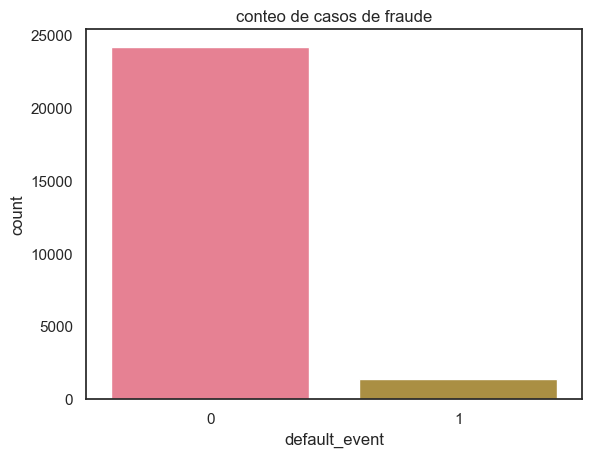

In [177]:
# cases of default and non default
print('porcentaje de tgt: ',df2[tgt].value_counts()[1] /df2.shape[0] * 100)
print('porcentaje de no tgt: ',df2[tgt].value_counts()[0] /df2.shape[0] * 100)
sns.set_theme(style = 'white',palette = 'husl')
ax = sns.countplot(x = 'default_event' , data = df2)
ax.set_title('conteo de casos de fraude')

In [178]:
df2.groupby('default_event')[var_con].mean()

monthly_installment   loan_balance  bureau_score  \
default_event                                                     
0                       556.426677   98517.623325    395.979817   
1                       582.577934  107131.447058    311.309880   

               time_since_bankrupt  time_since_ccj   ccj_amount  \
default_event                                                     
0                         2.280658        3.811555   591.882216   
1                         3.616766        8.184132  1487.586078   

               min_months_since_bankrupt       ltv  arrears_months  \
default_event                                                        
0                               0.325998  0.577804        0.047705   
1                               0.348802  0.613049        0.643405   

                      mob  remaining_mat  loan_term  max_arrears_12m  \
default_event                                                          
0              117.132620     187.998011  25.427908         0.154254   
1              117.053144     166.857784  23.660180         0.970193   

               max_arrears_bal_6m     avg_bal_6m  avg_bureau_score_6m  \
default_event                                                           
0                    -4281.223507   99341.270090           394.645033   
1                    -1544.974551  107791.708084           312.296407   

                cc_util  annual_income  months_since_recent_cc_delinq  
default_event                                                          
0              0.479494   64335.915413                       9.136558  
1              0.740072   53276.030689                       7.102545

Text(0.5, 1.0, 'Cases of default and non default according with num_ccj')

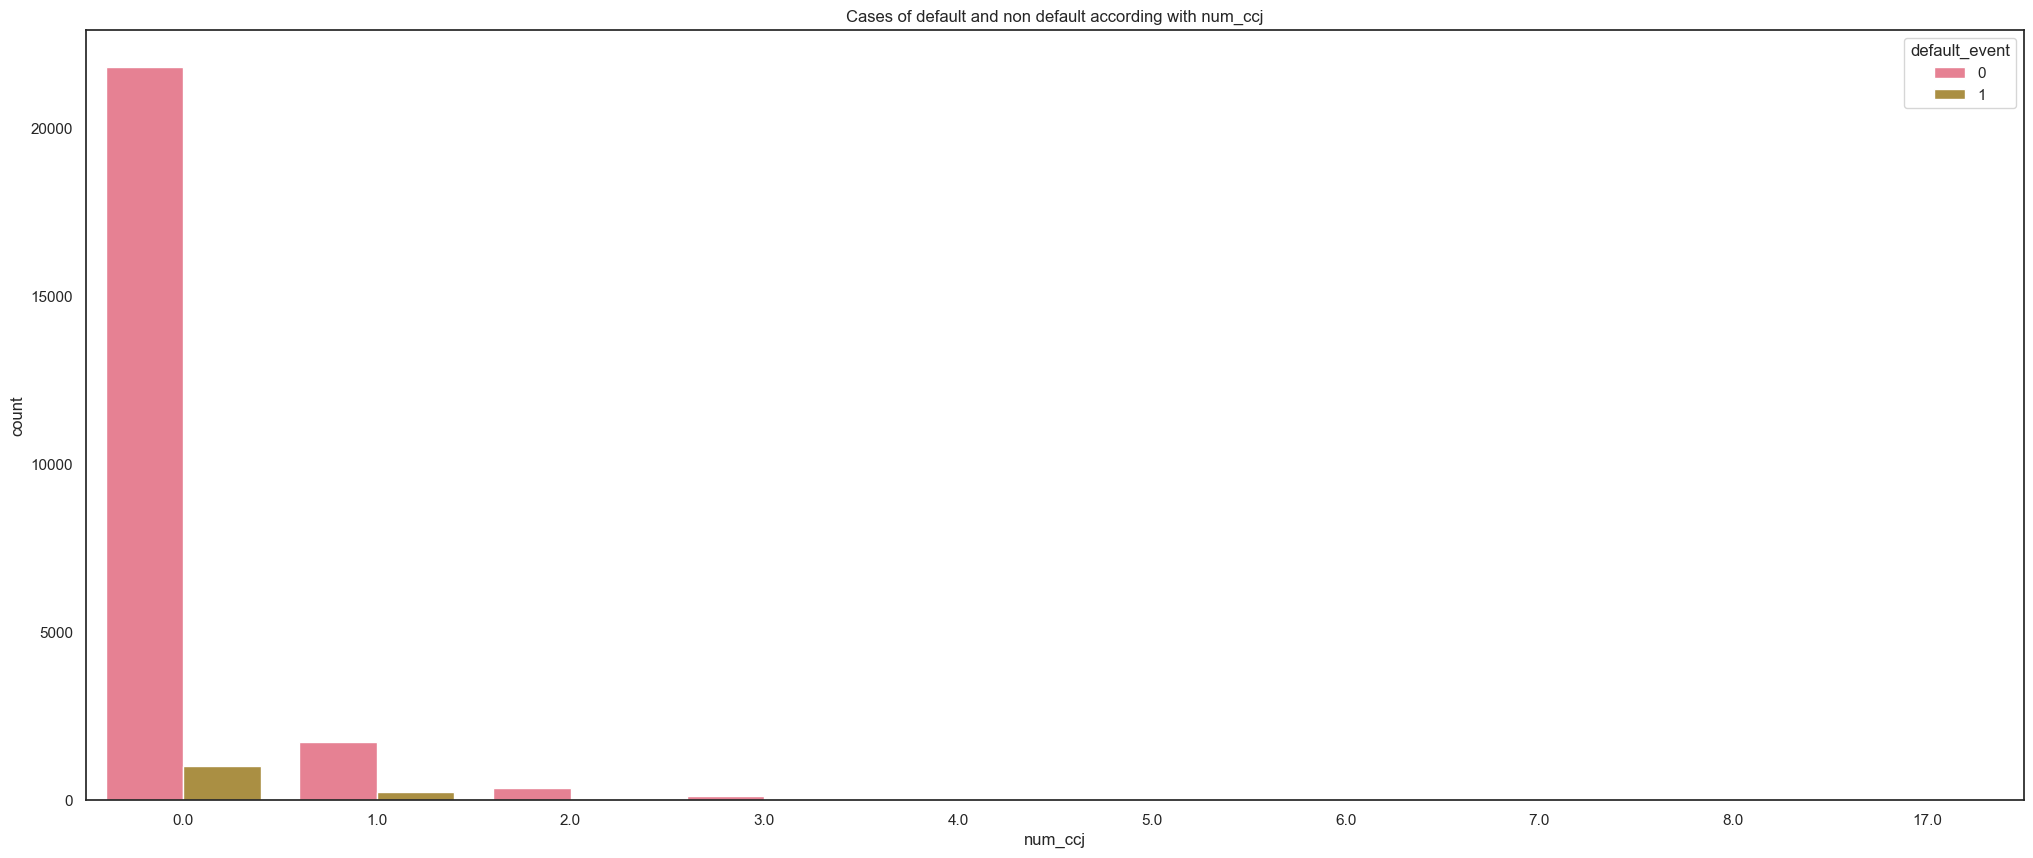

In [19]:
# Cases of default and non default , variable num_ccj
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.num_ccj)
plt.title('Cases of default and non default according with num_ccj')

Text(0, 0.5, 'Proportion of default')

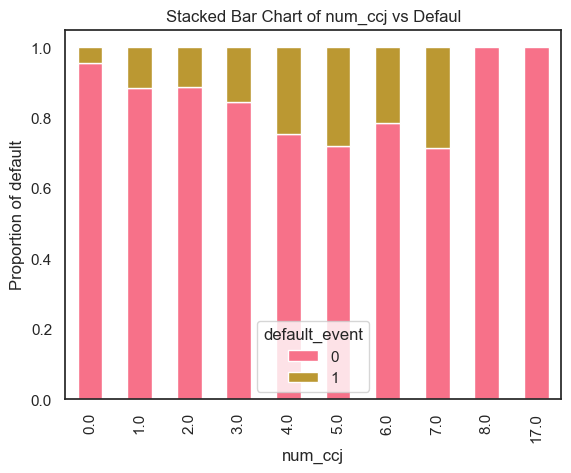

In [182]:
table=pd.crosstab(df2.num_ccj,df2.default_event)
table.div(table.sum(1).astype(float), axis = 0).plot( kind = 'bar',  stacked = True)
plt.title('Stacked Bar Chart of num_ccj vs Defaul')
plt.xlabel('num_ccj')
plt.ylabel('Proportion of default')
#plt.savefig('education_vs_def_stack')

Text(0.5, 1.0, 'Cases of default and non default according with num_bankrupt')

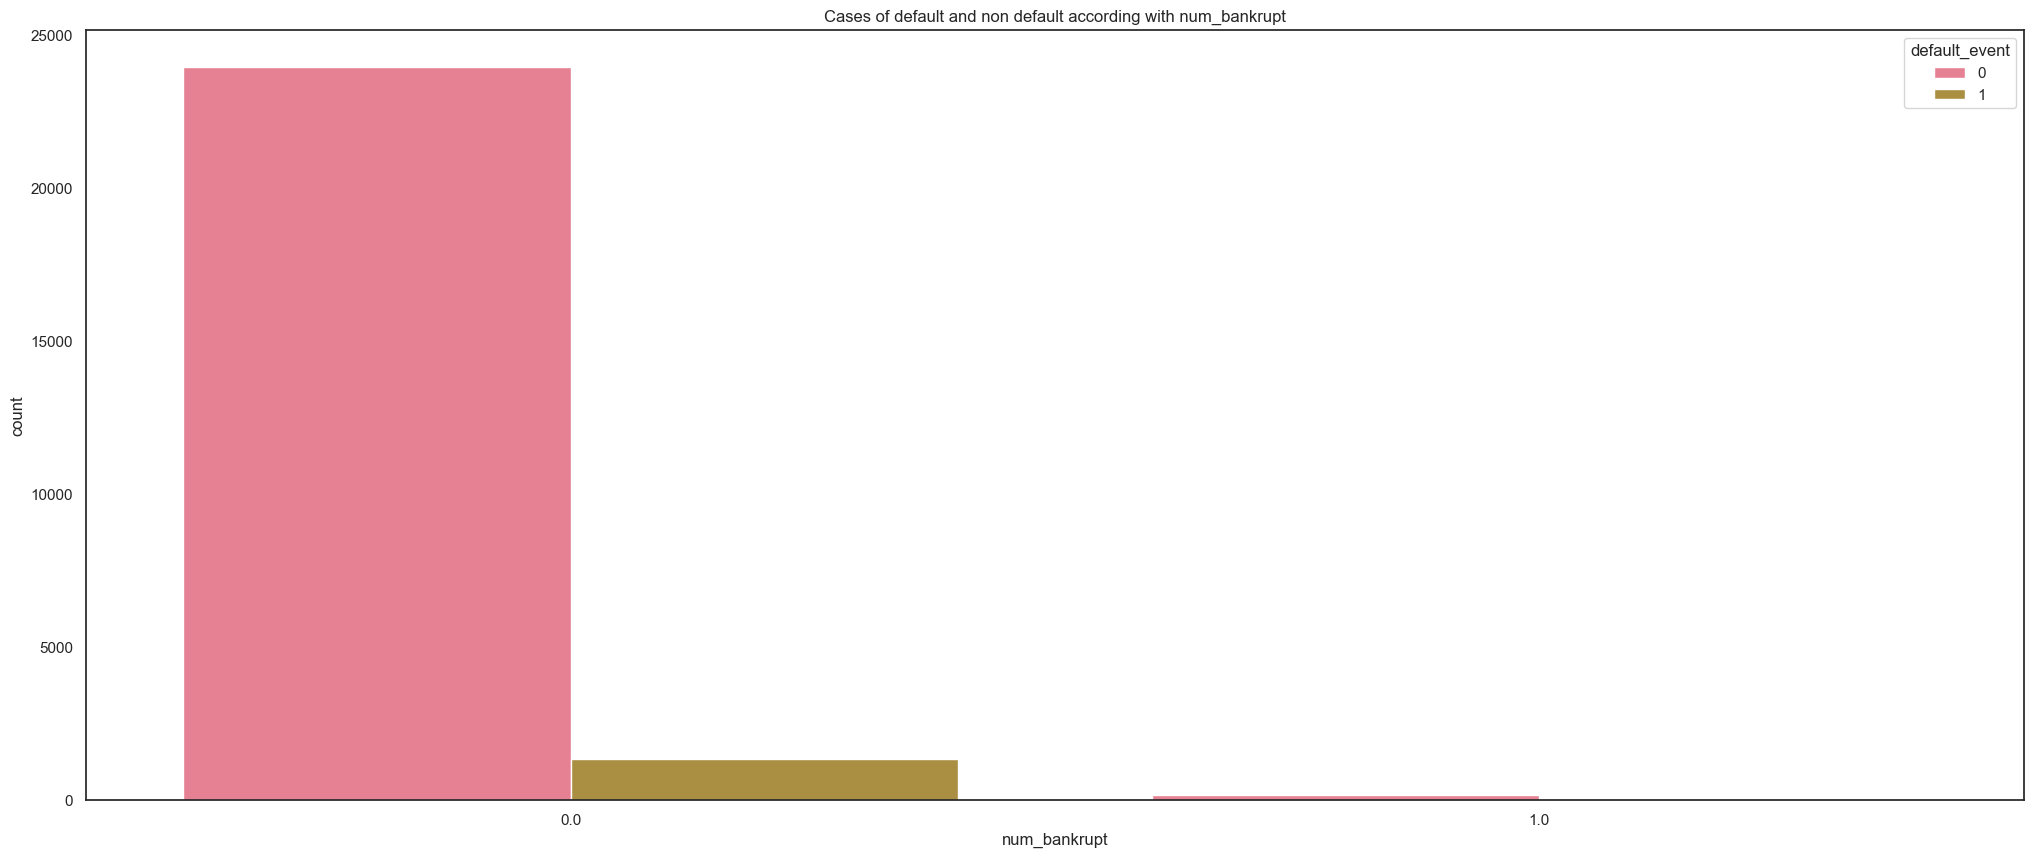

In [20]:
# Cases of default and non default , variable num_bankrupt
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.num_bankrupt)
plt.title('Cases of default and non default according with num_bankrupt')

Text(0.5, 1.0, 'Cases of default and non default according with num_iva')

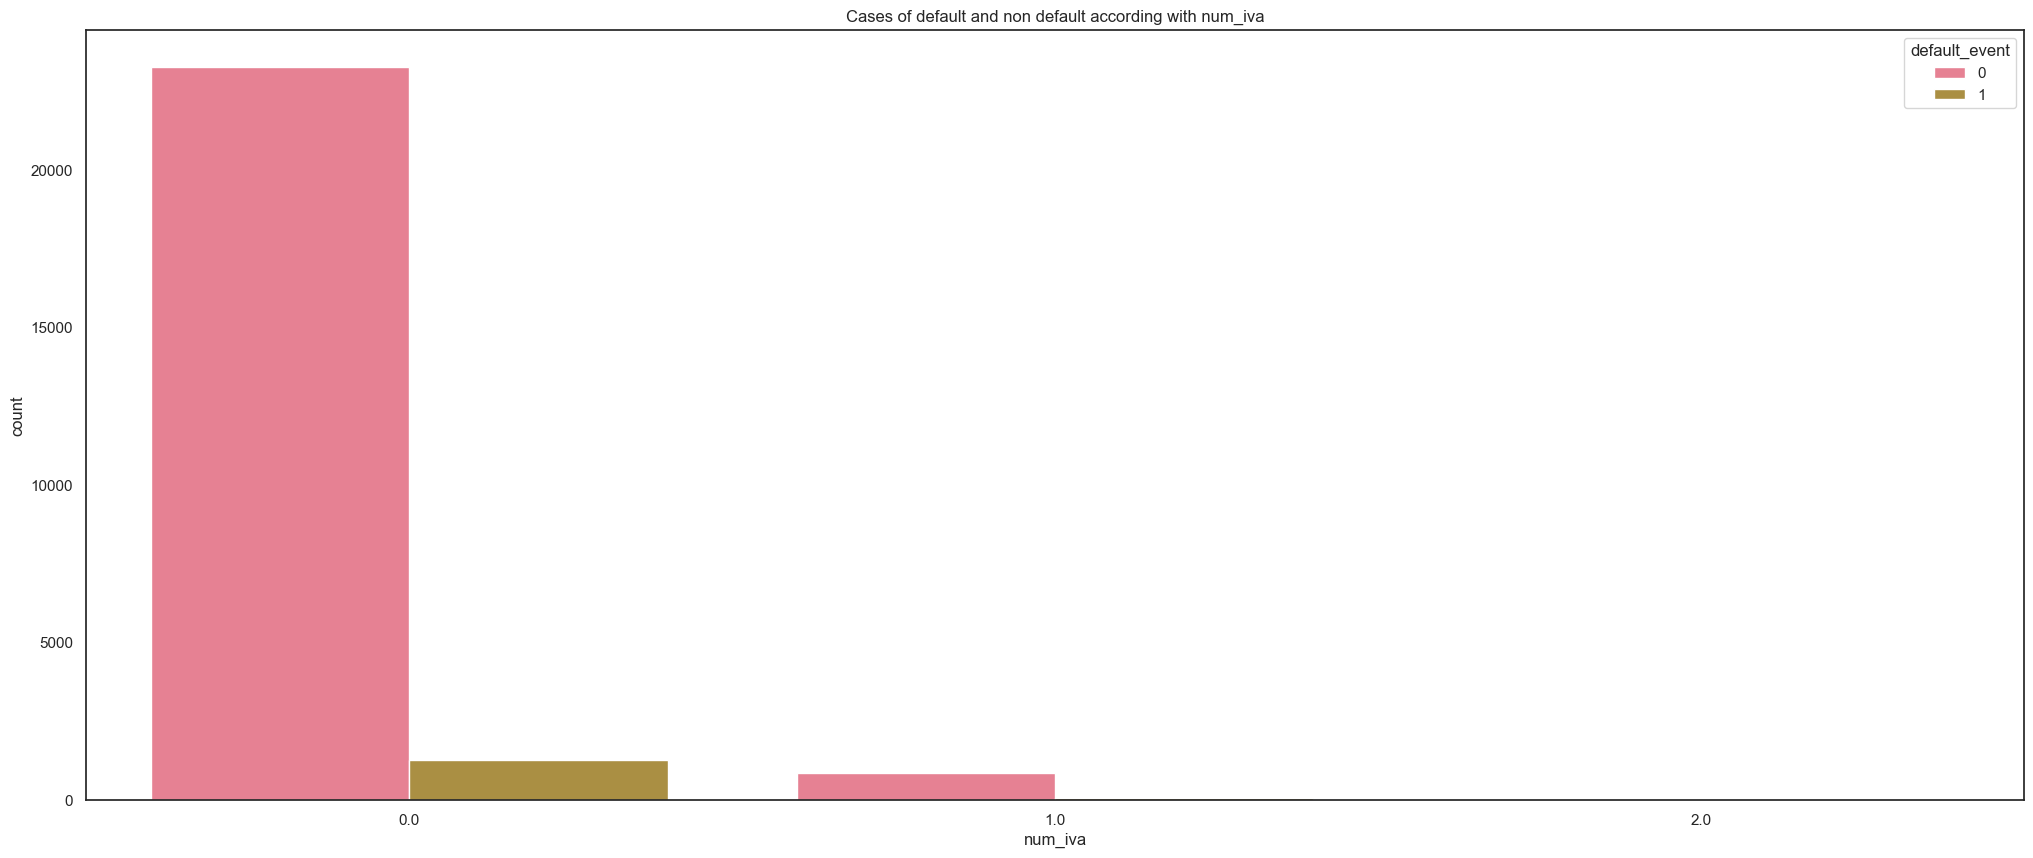

In [21]:
# Cases of default and non default , variable num_iva
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.num_iva)
plt.title('Cases of default and non default according with num_iva')

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with pl_flag')

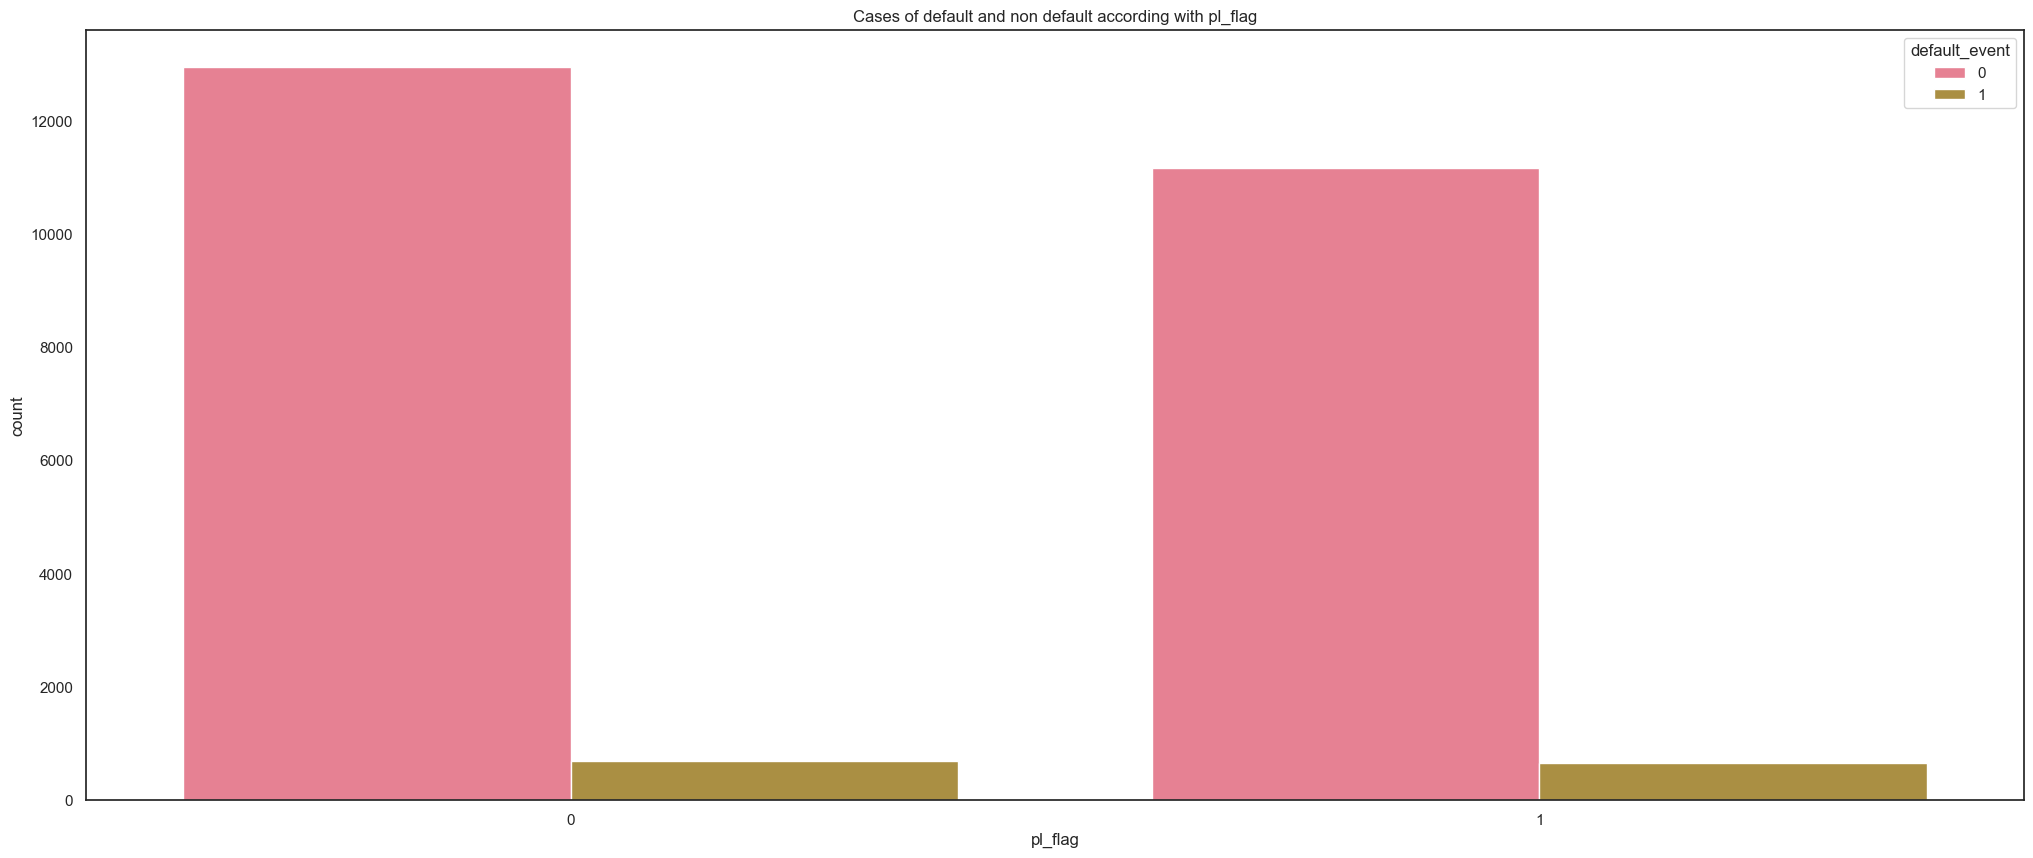

In [22]:
# Cases of default and non default , variable pl_flag
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.pl_flag)
plt.title('Cases of default and non default according with pl_flag')

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with region')

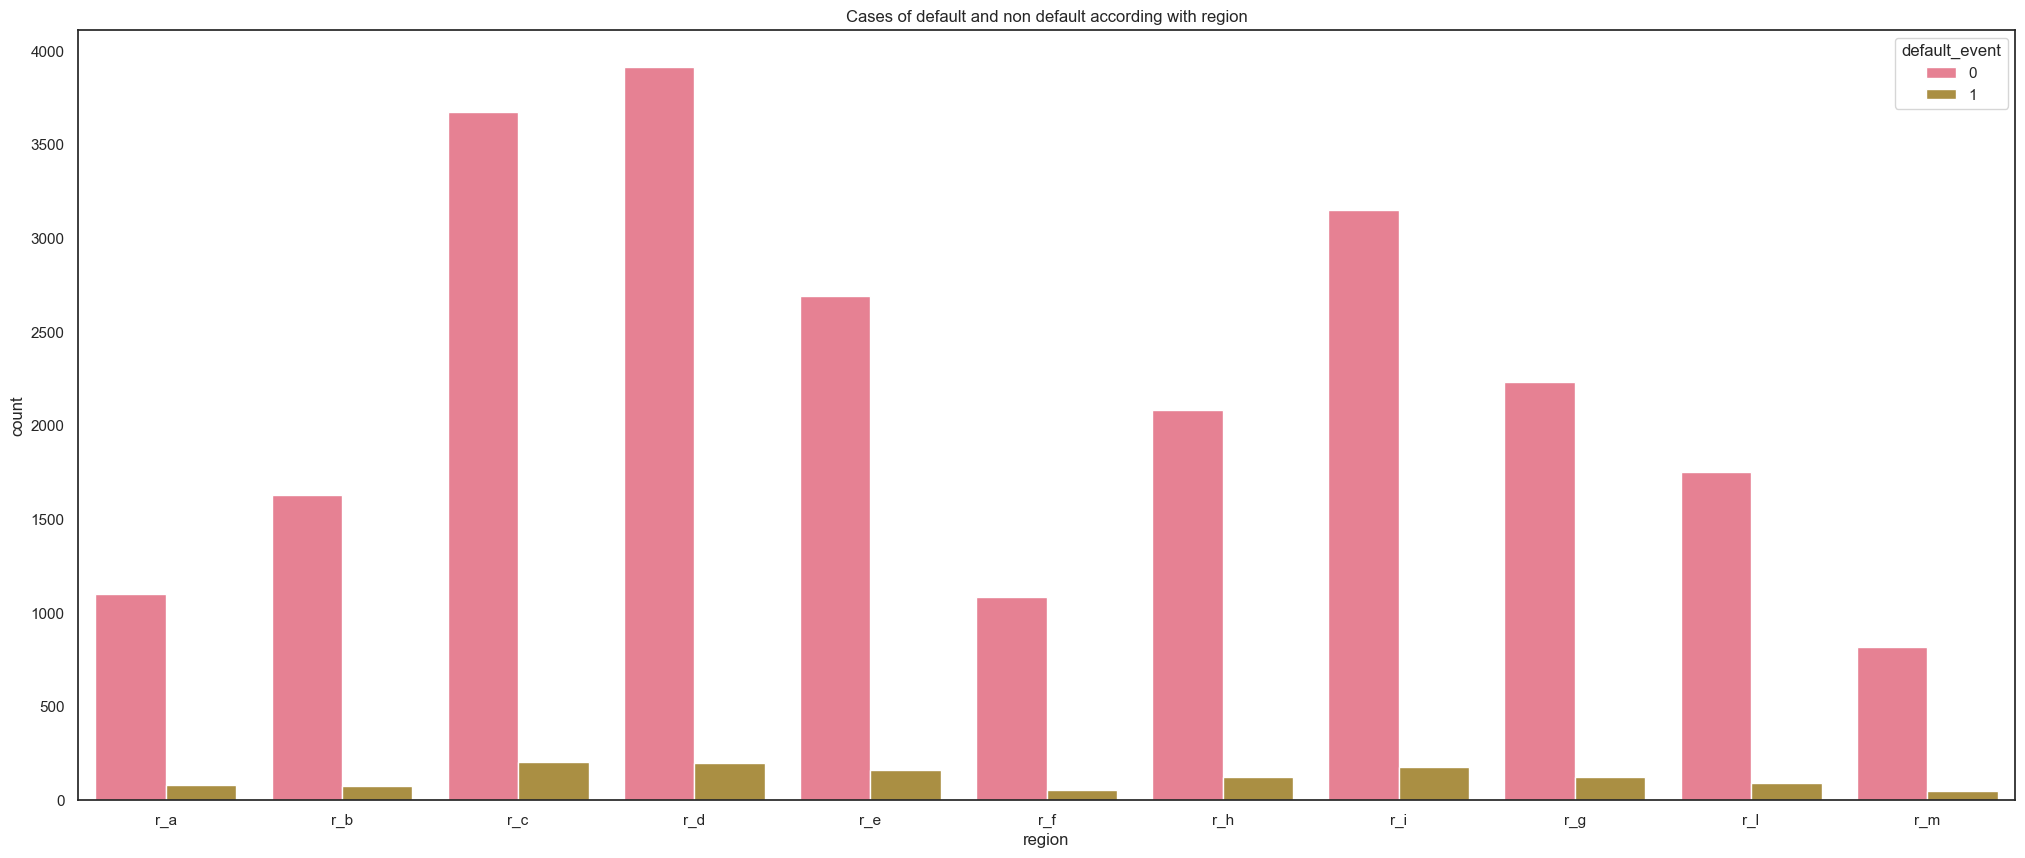

In [23]:
# Cases of default and non default , variable region
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.region)
plt.title('Cases of default and non default according with region')

## ok pl_flag, region

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with repayment_type')

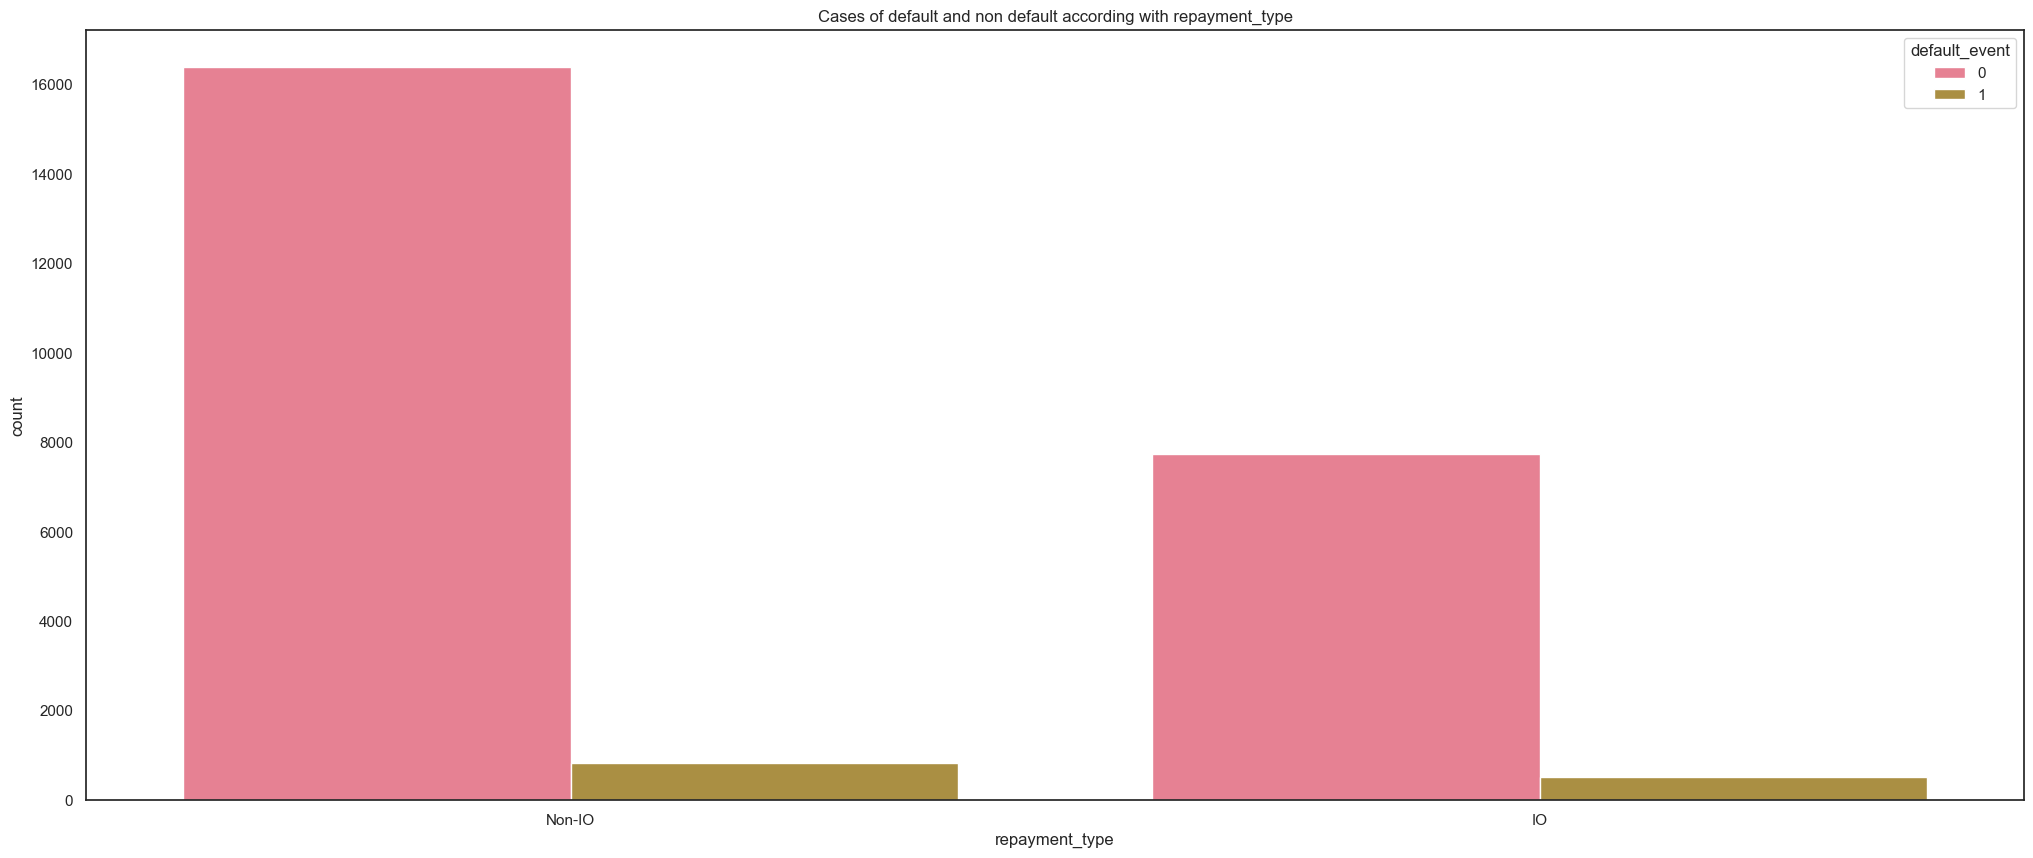

In [24]:
# Cases of default and non default , variable repayment_type
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.repayment_type)
plt.title('Cases of default and non default according with repayment_type')

## ok pl_flag, region, repayment_type

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with arrears_status')

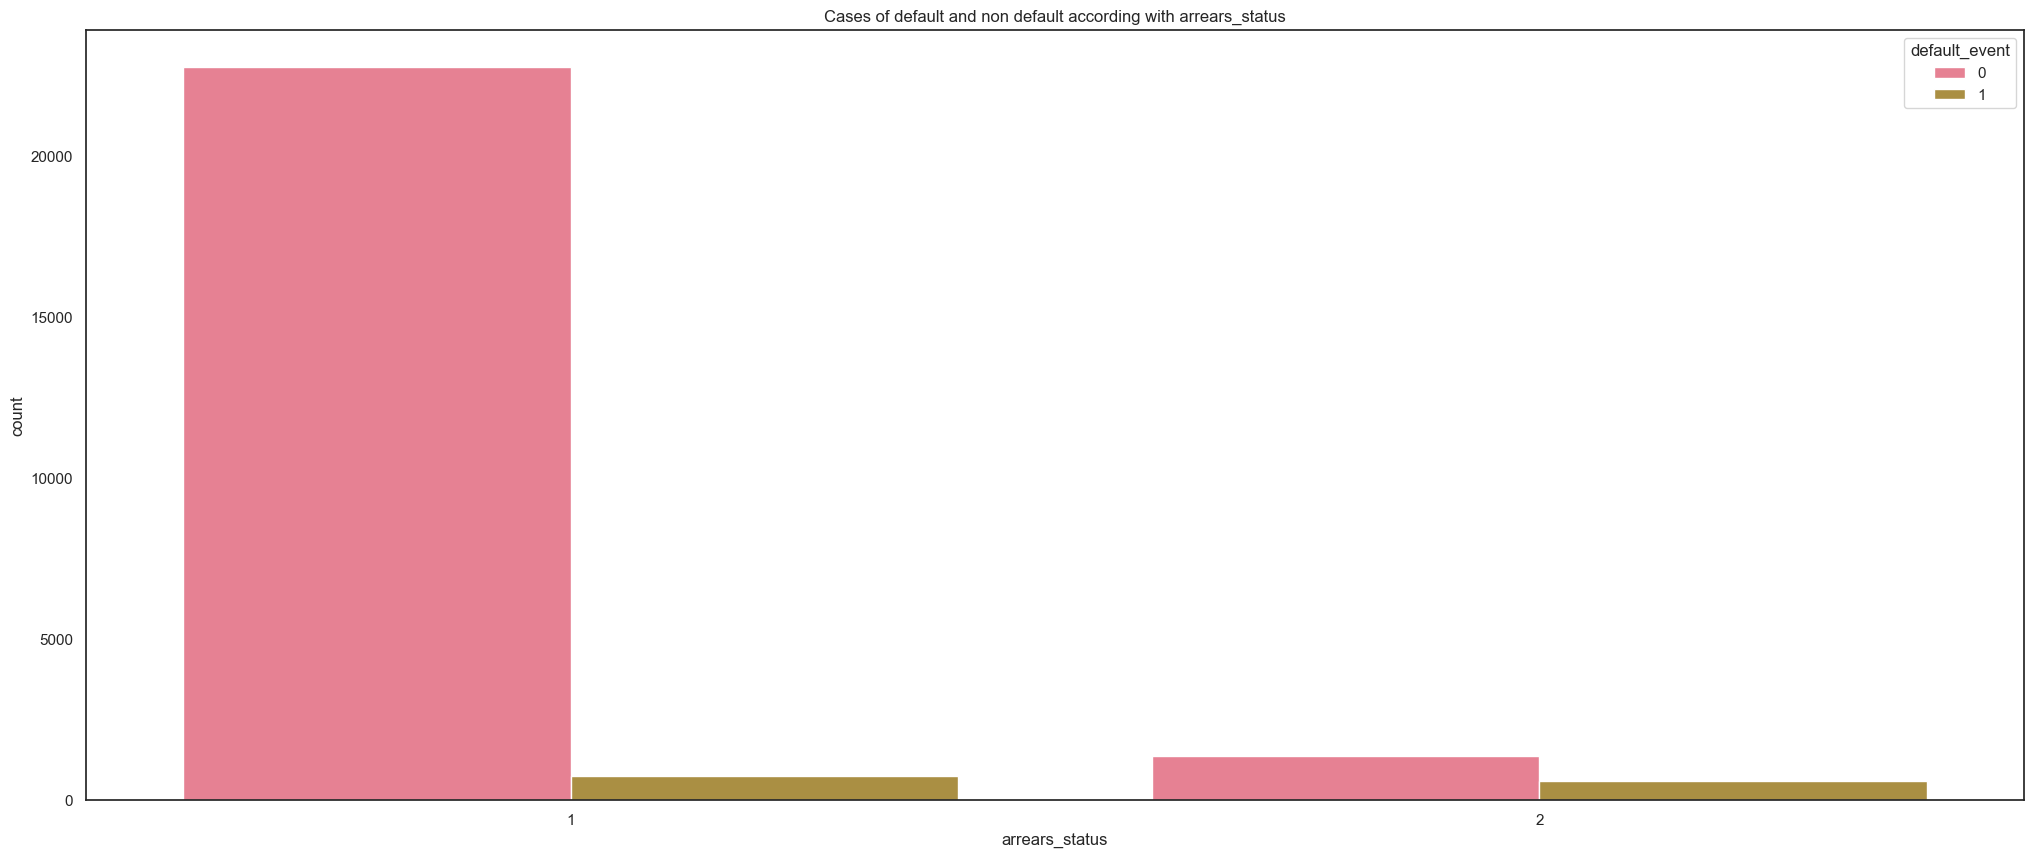

In [25]:
# Cases of default and non default , variable arrears_status
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.arrears_status)
plt.title('Cases of default and non default according with arrears_status')

## ok pl_flag, region, repayment_type

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with arrears_segment')

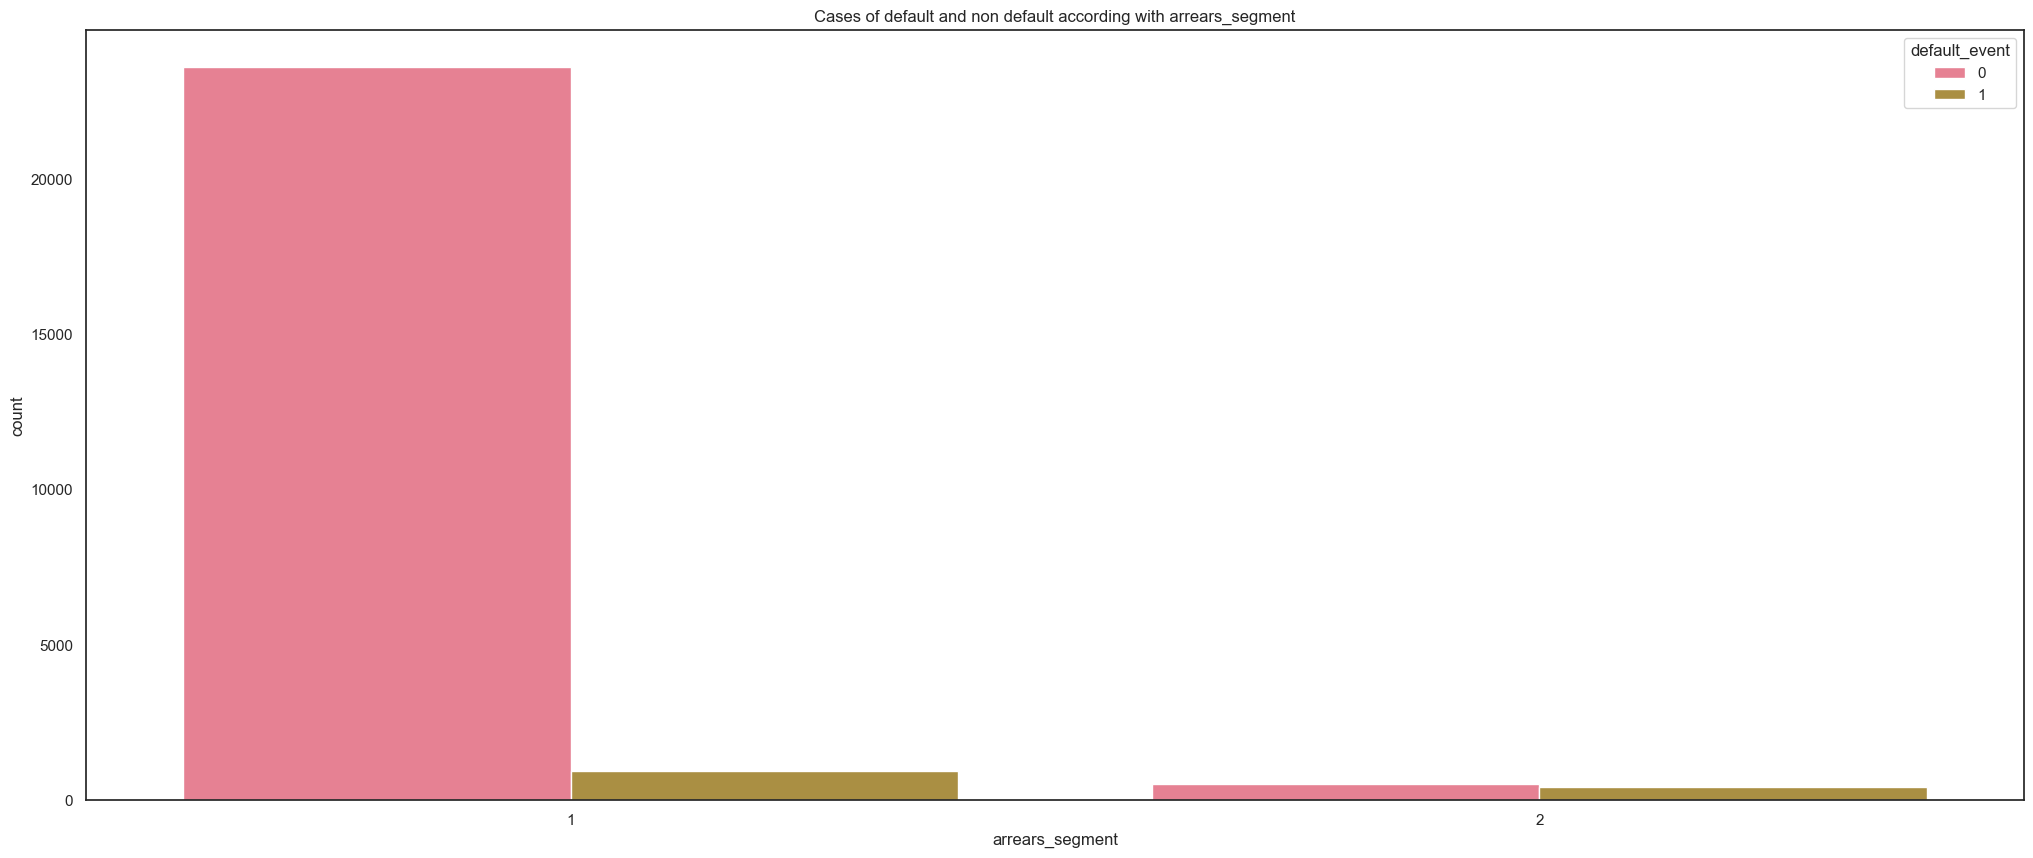

In [26]:
# Cases of default and non default , variable arrears_segment
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.arrears_segment)
plt.title('Cases of default and non default according with arrears_segment')

## ok pl_flag, region, repayment_type

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with live_status')

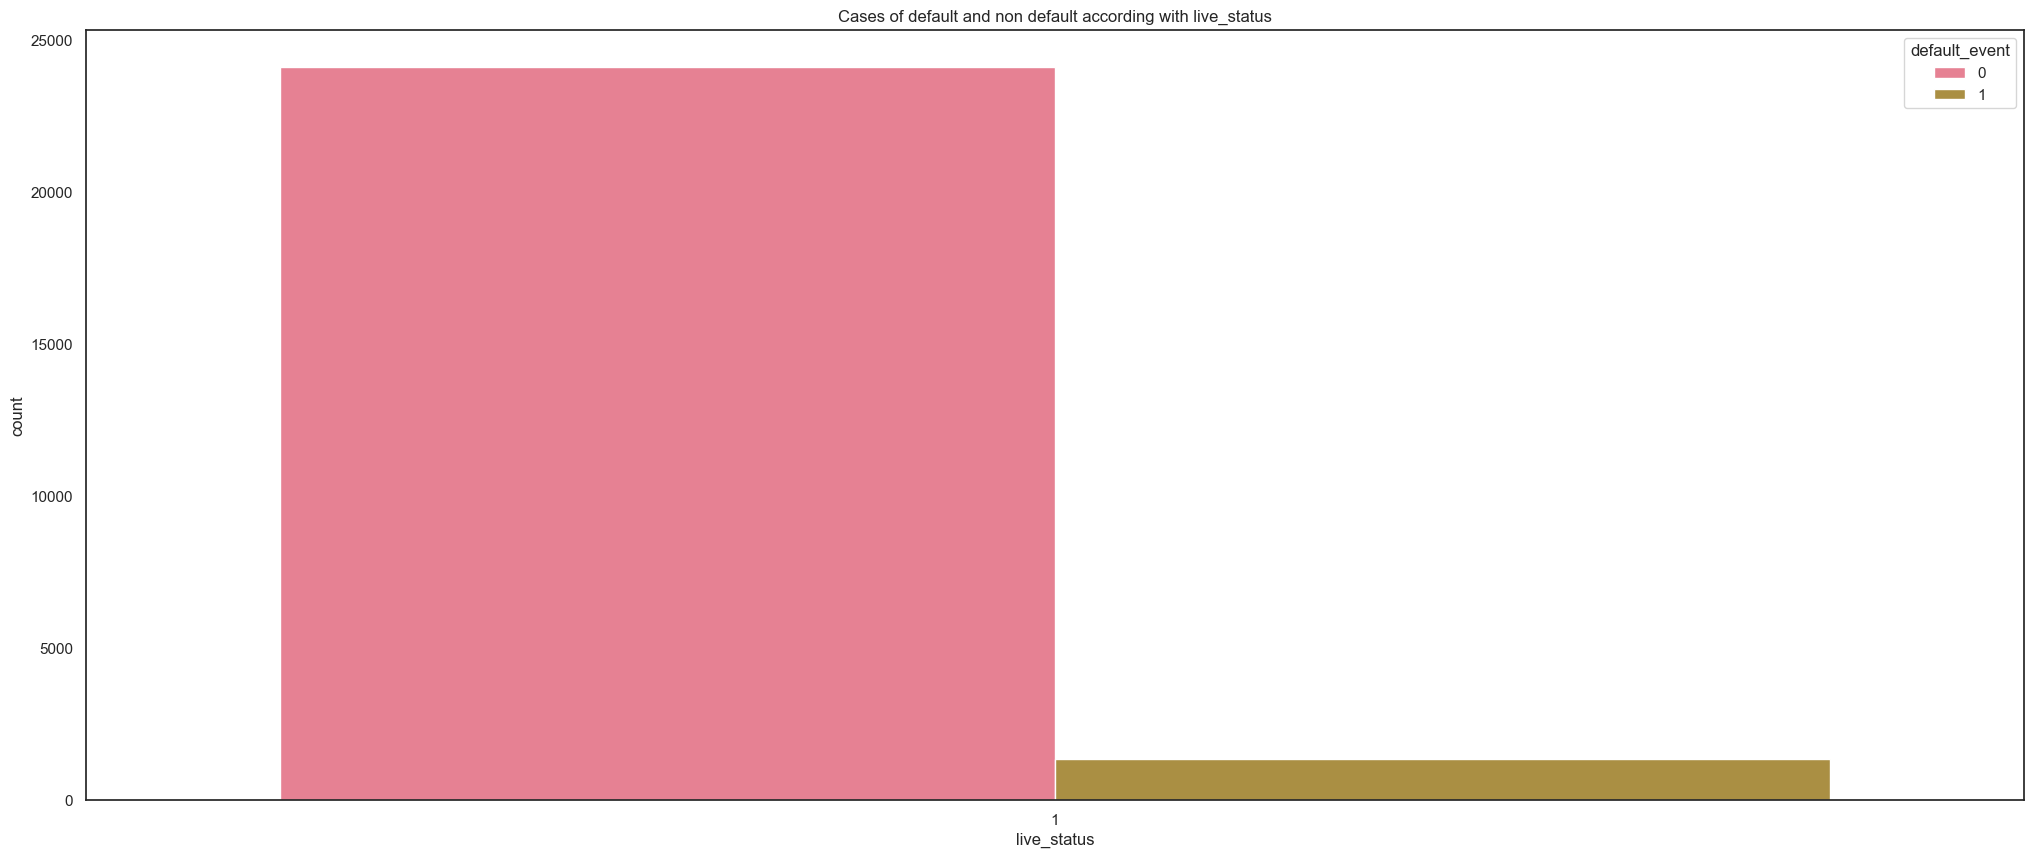

In [27]:
# Cases of default and non default , variable live_status
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.live_status)
plt.title('Cases of default and non default according with live_status')

## ok pl_flag, region, repayment_type

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with repaid_status')

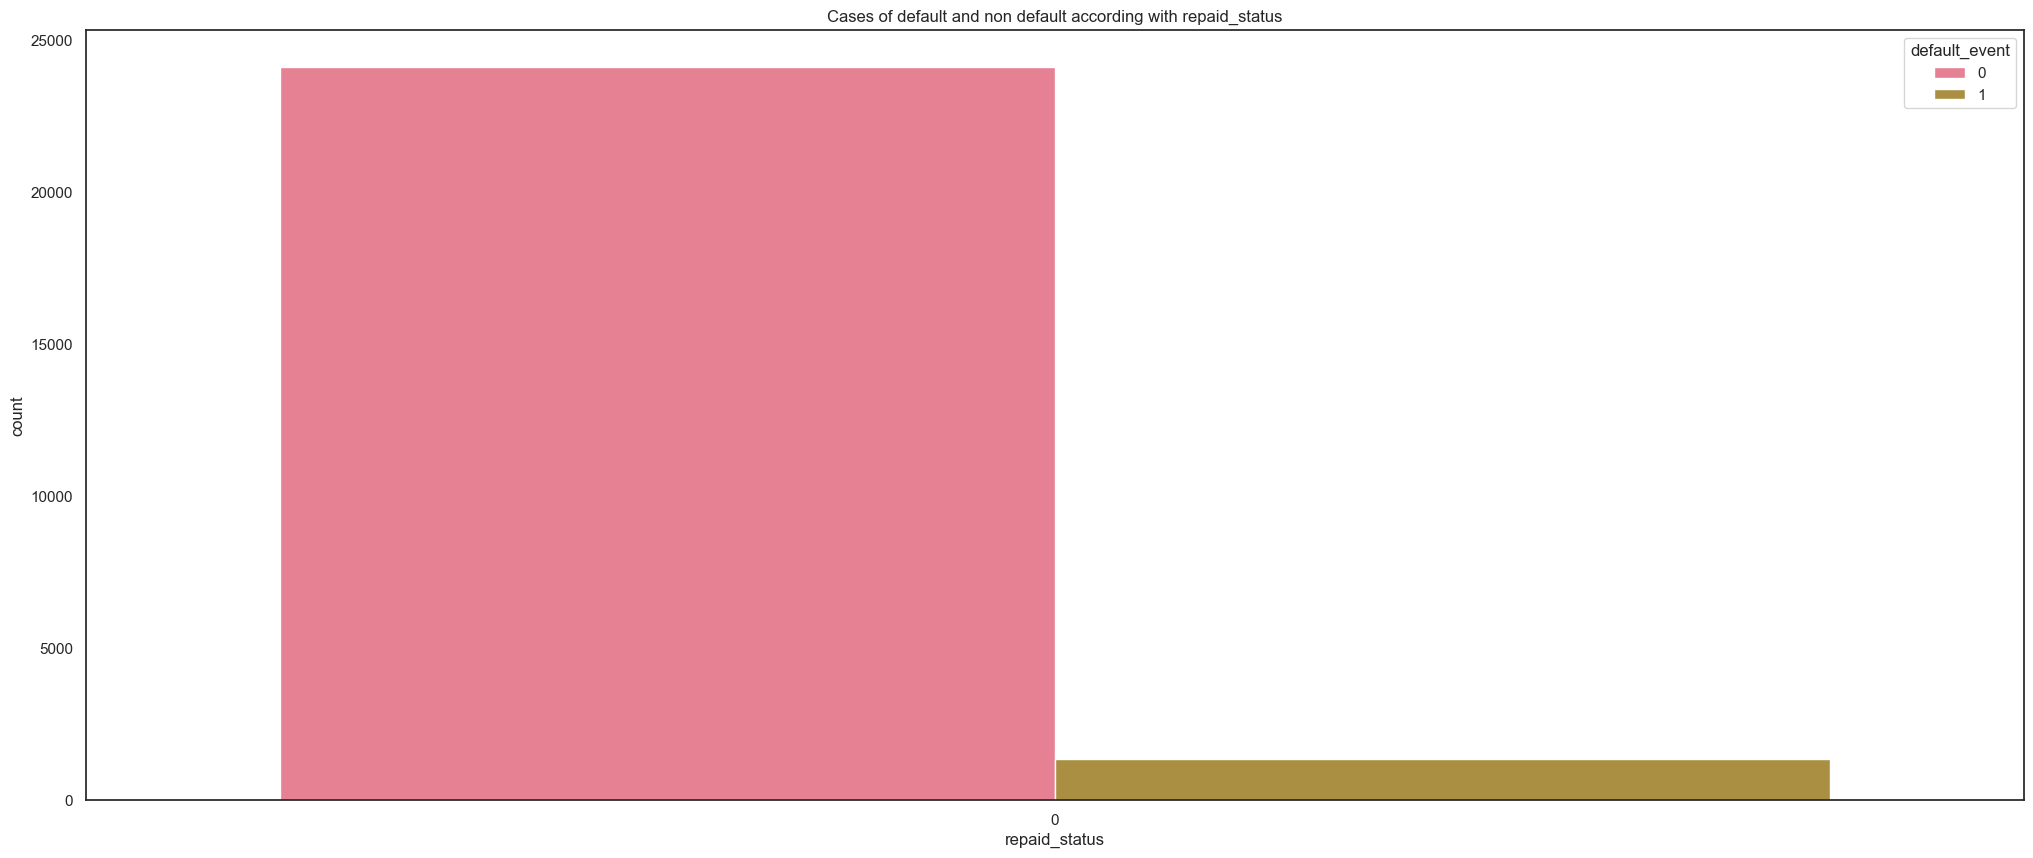

In [28]:
# Cases of default and non default , variable repaid_status
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.repaid_status)
plt.title('Cases of default and non default according with repaid_status')

## ok pl_flag, region, repayment_type

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with month')

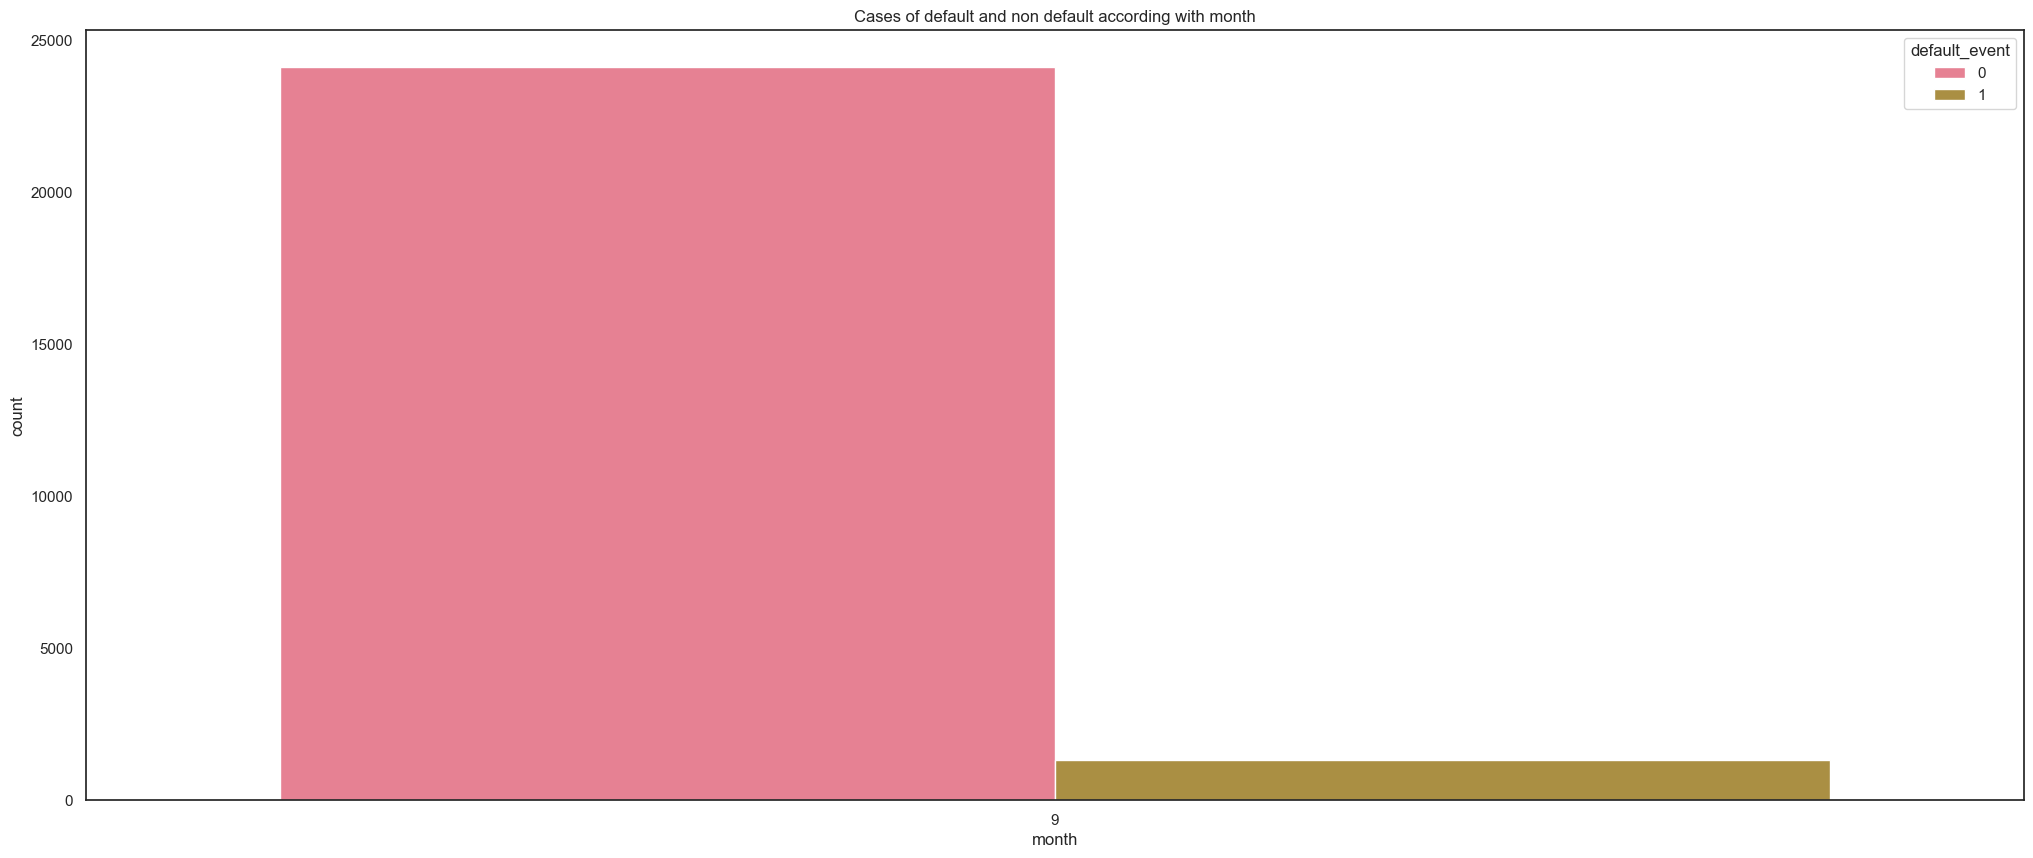

In [29]:
# Cases of default and non default , variable month
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.month)
plt.title('Cases of default and non default according with month')

## ok pl_flag, region, repayment_type

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with arrears_event')

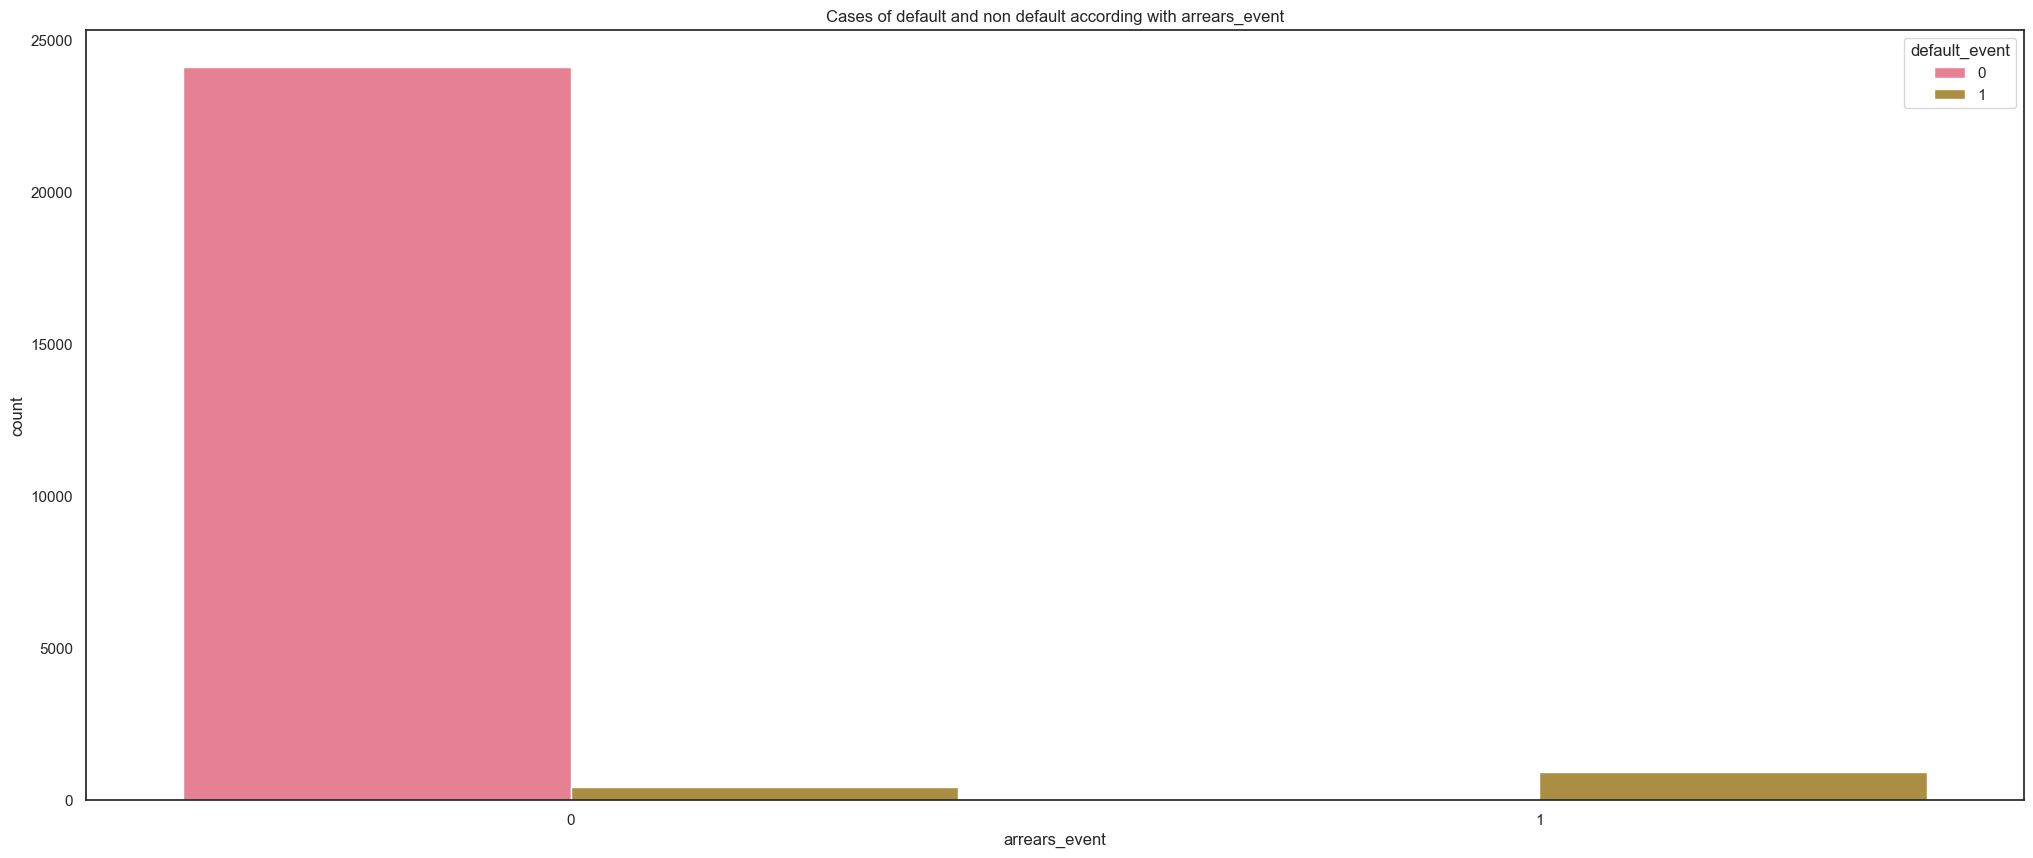

In [30]:
# Cases of default and non default , variable arrears_event
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.arrears_event)
plt.title('Cases of default and non default according with arrears_event')

## ok pl_flag, region, repayment_type

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with bankrupt_event')

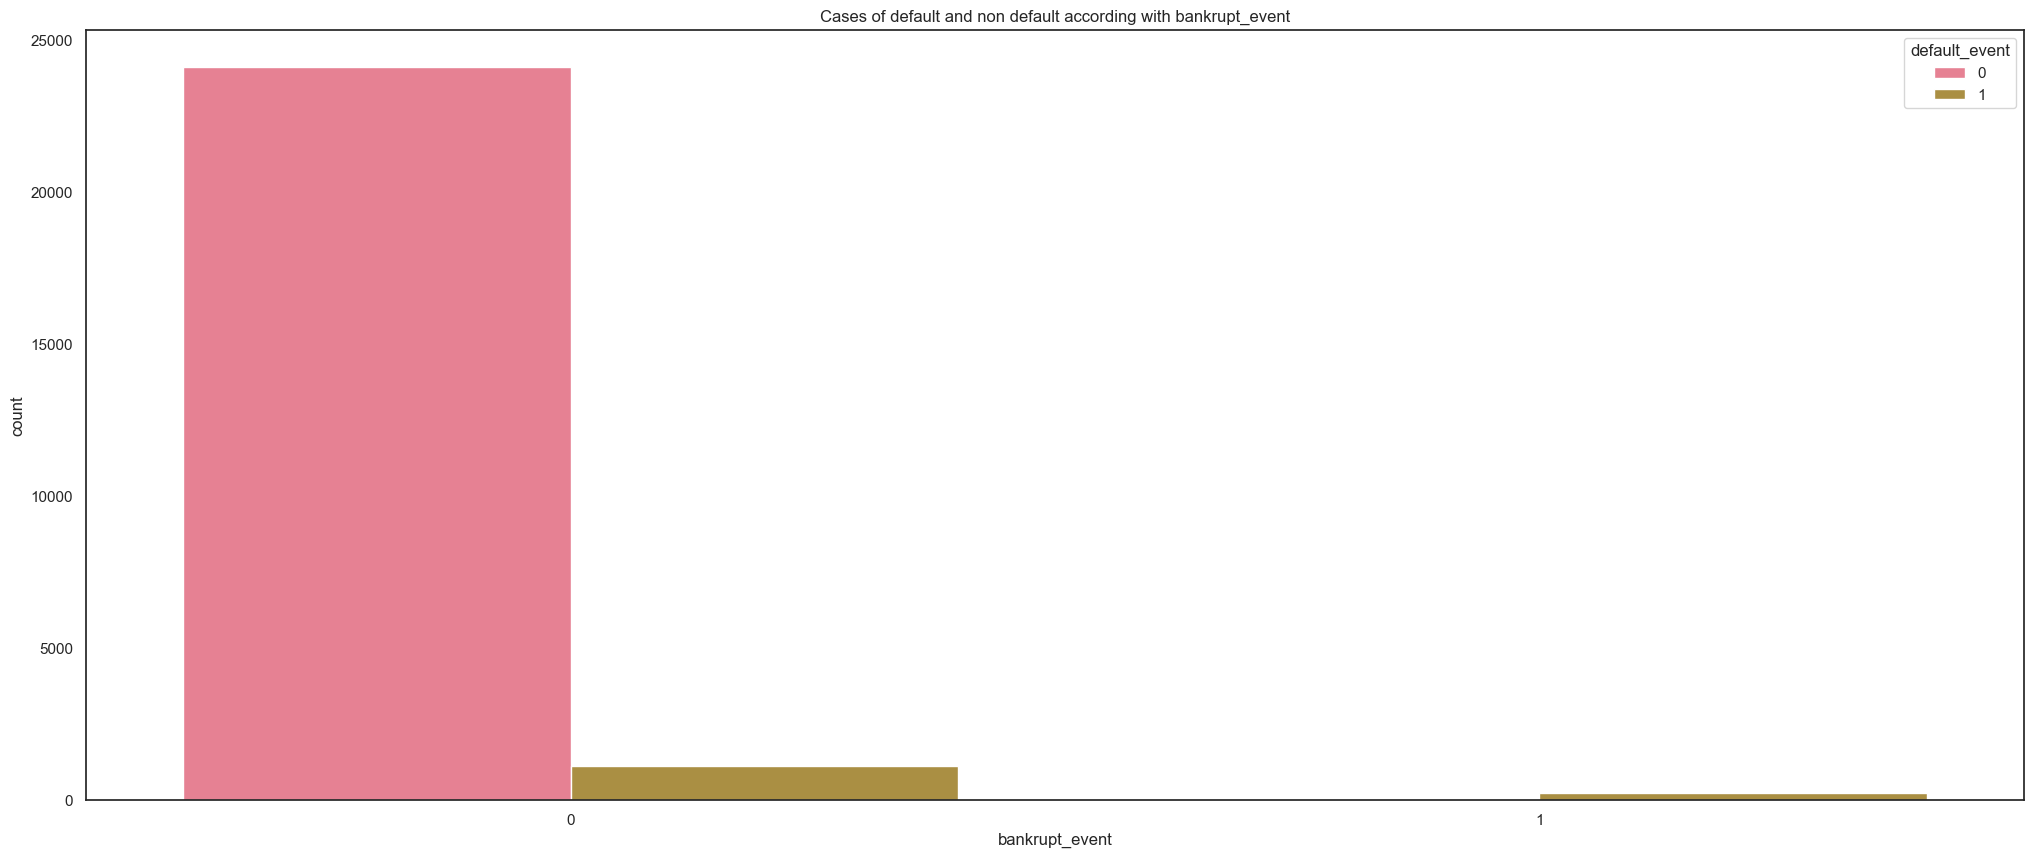

In [31]:
# Cases of default and non default , variable bankrupt_event
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.bankrupt_event)
plt.title('Cases of default and non default according with bankrupt_event')

## ok pl_flag, region, repayment_type

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with term_expiry_event')

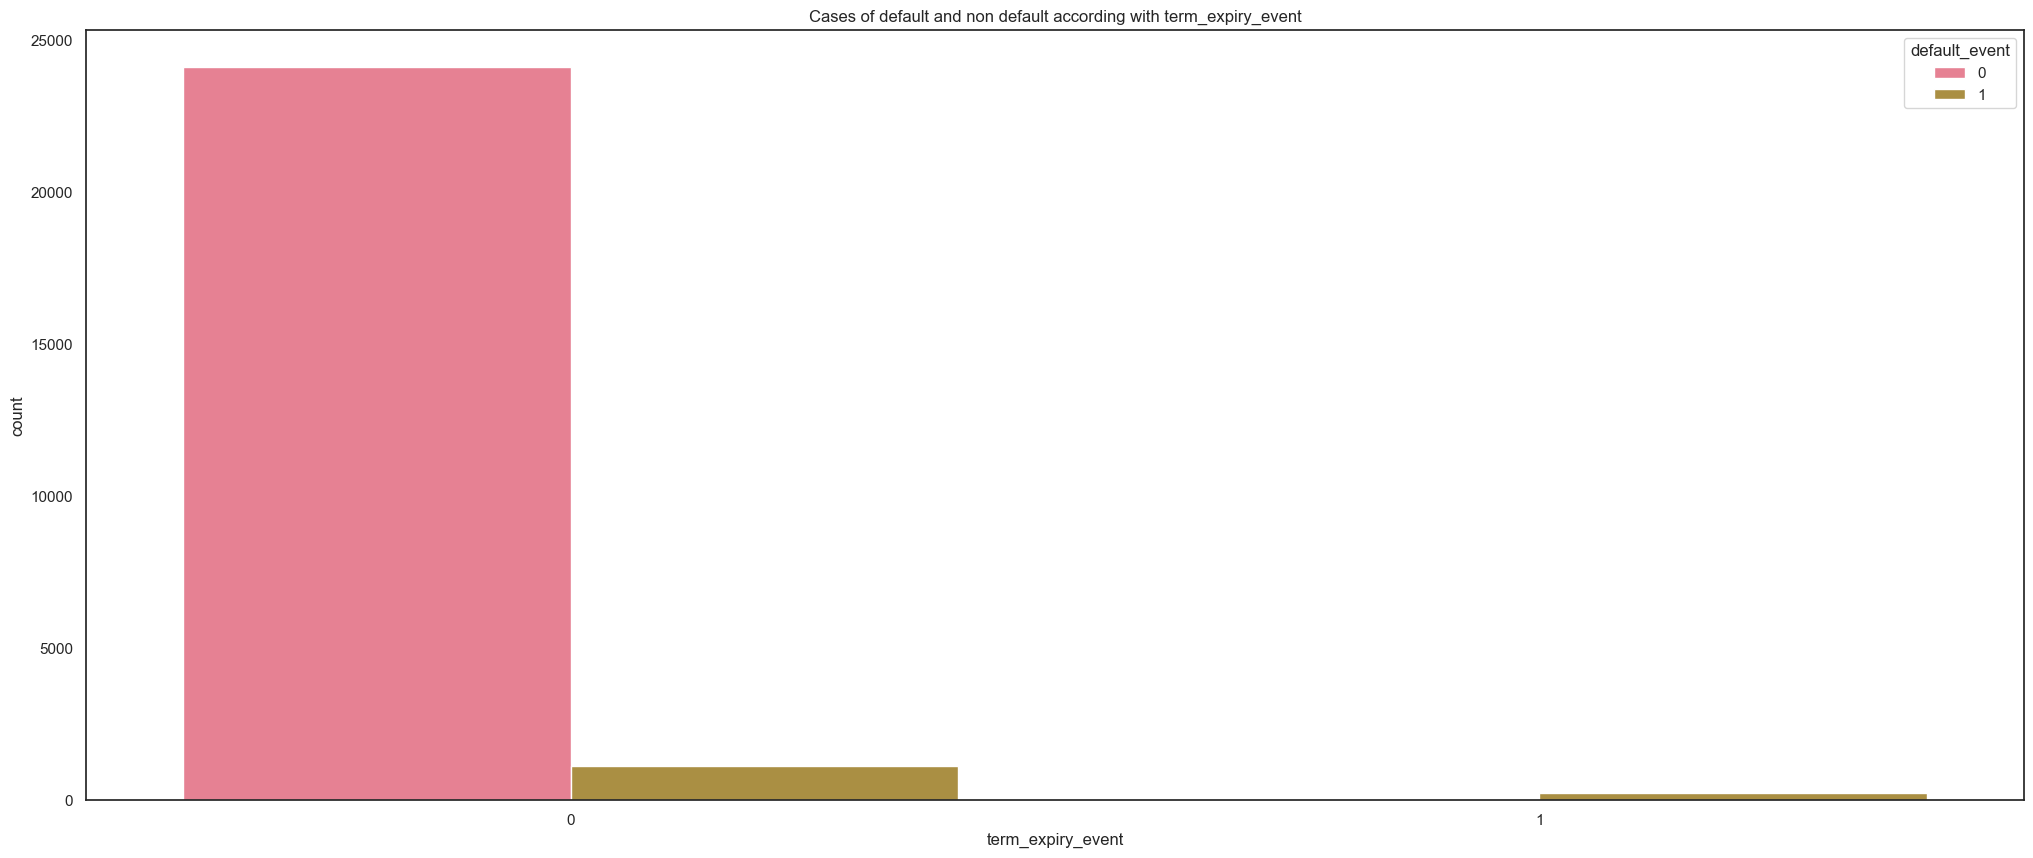

In [32]:
# Cases of default and non default , variable term_expiry_event
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.term_expiry_event)
plt.title('Cases of default and non default according with term_expiry_event')

## ok pl_flag, region, repayment_type

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with worst_arrears_status')

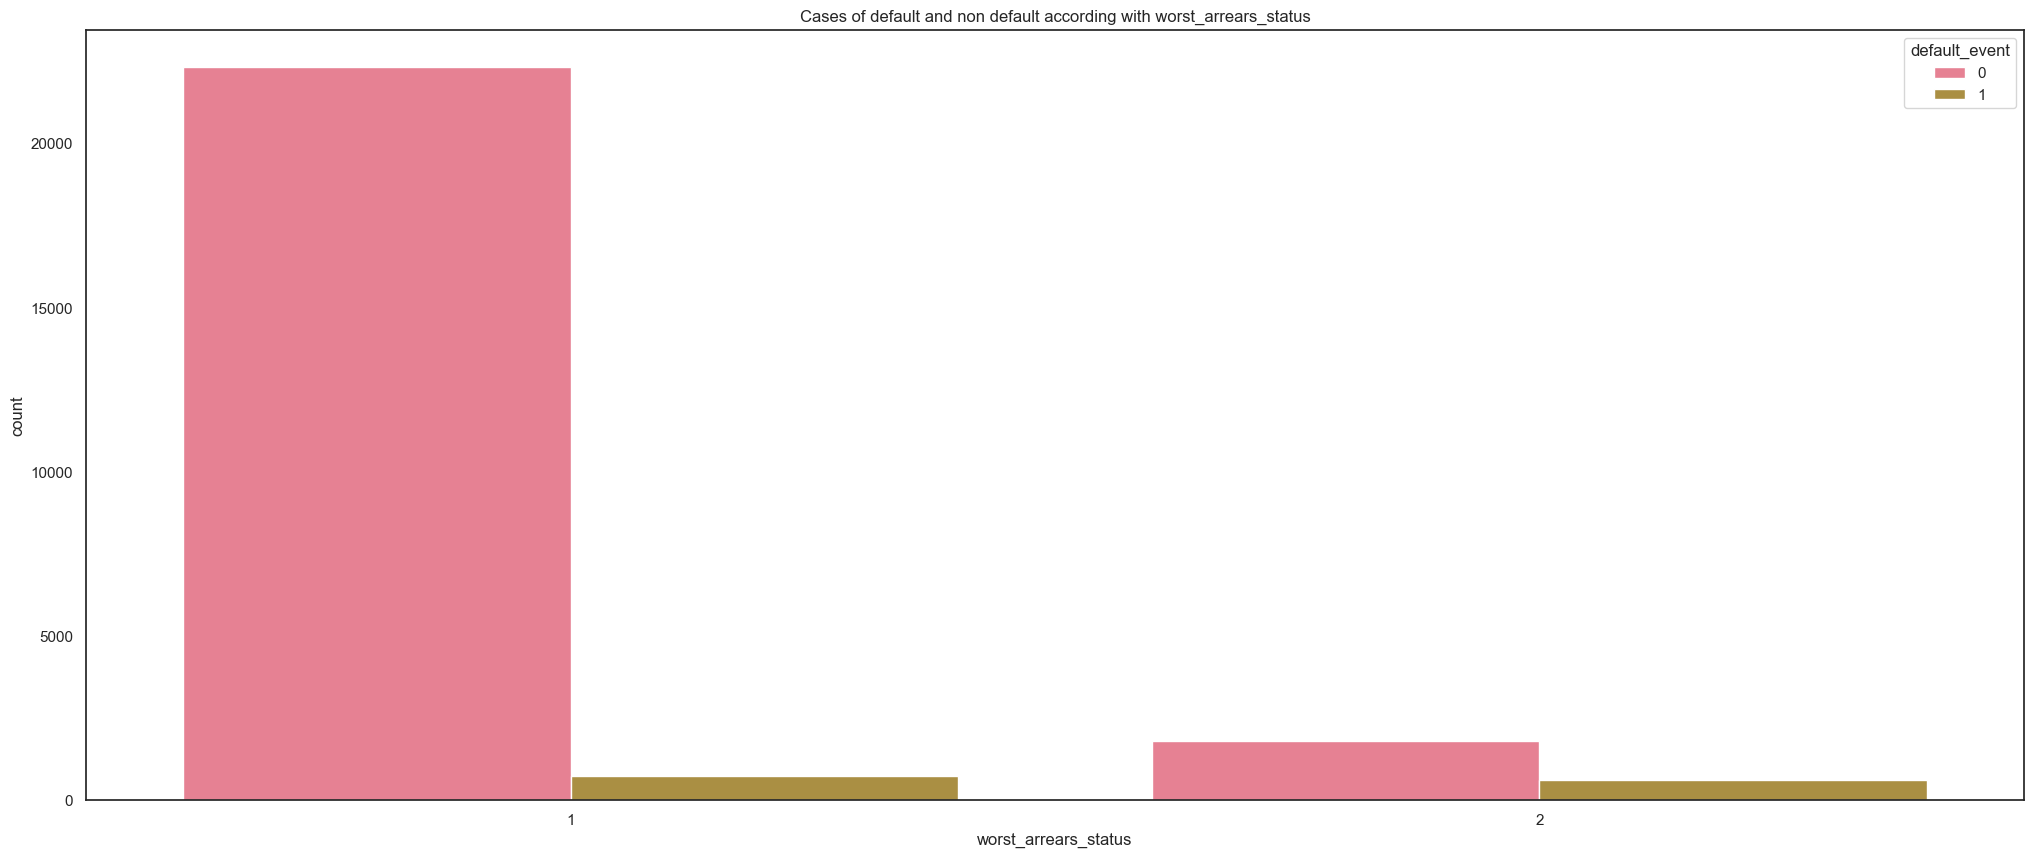

In [33]:
# Cases of default and non default , variable worst_arrears_status
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.worst_arrears_status)
plt.title('Cases of default and non default according with worst_arrears_status')

## ok pl_flag, region, repayment_type

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with avg_mia_6m')

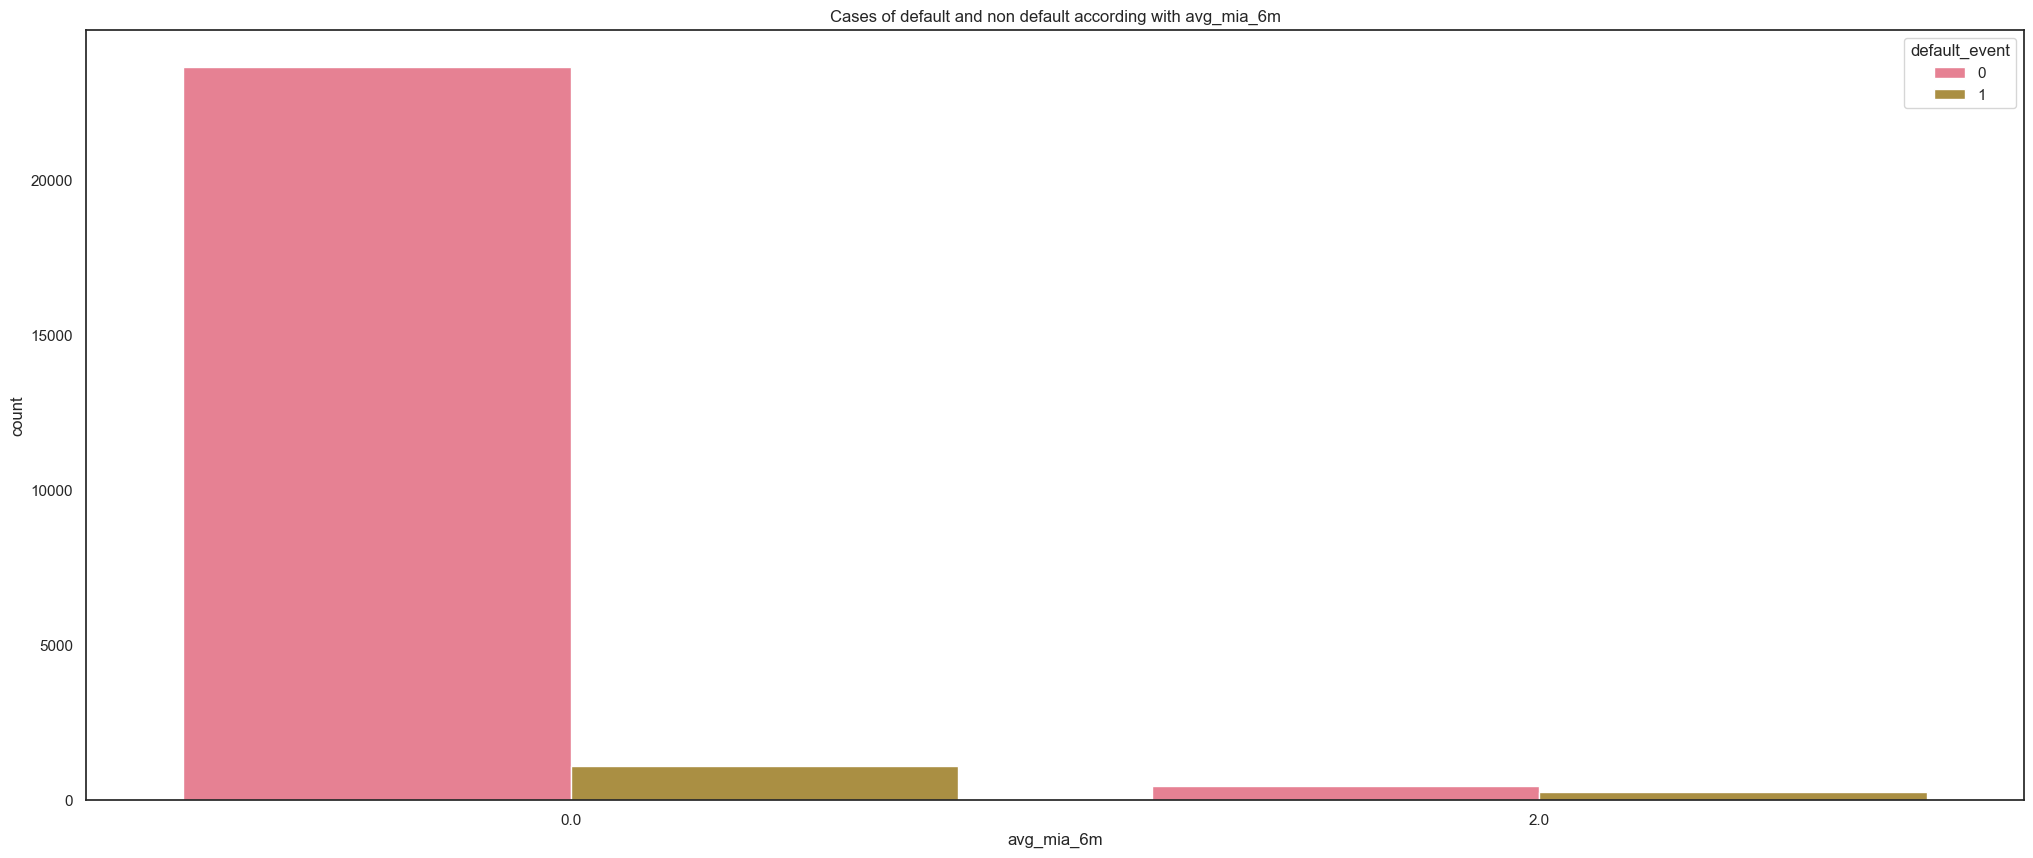

In [34]:
# Cases of default and non default , variable avg_mia_6m
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.avg_mia_6m)
plt.title('Cases of default and non default according with avg_mia_6m')

## ok pl_flag, region, repayment_type

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with max_mia_6m')

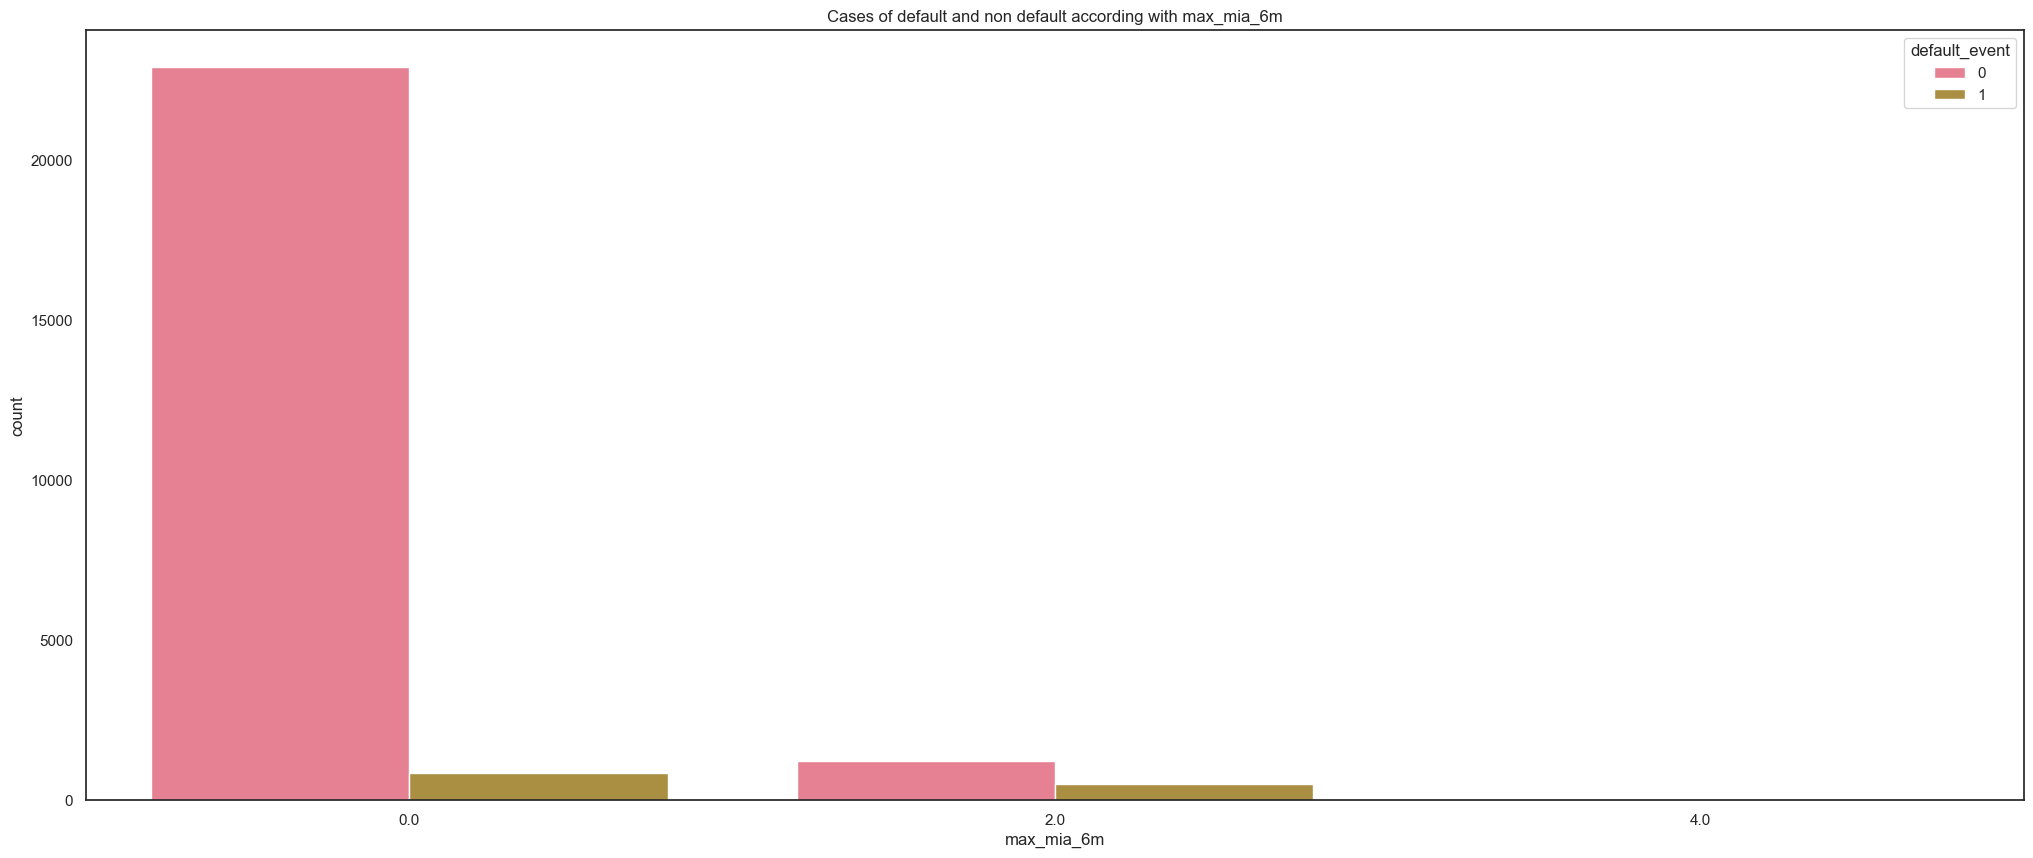

In [35]:
# Cases of default and non default , variable max_mia_6m
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.max_mia_6m)
plt.title('Cases of default and non default according with max_mia_6m')

## ok pl_flag, region, repayment_type

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with emp_length')

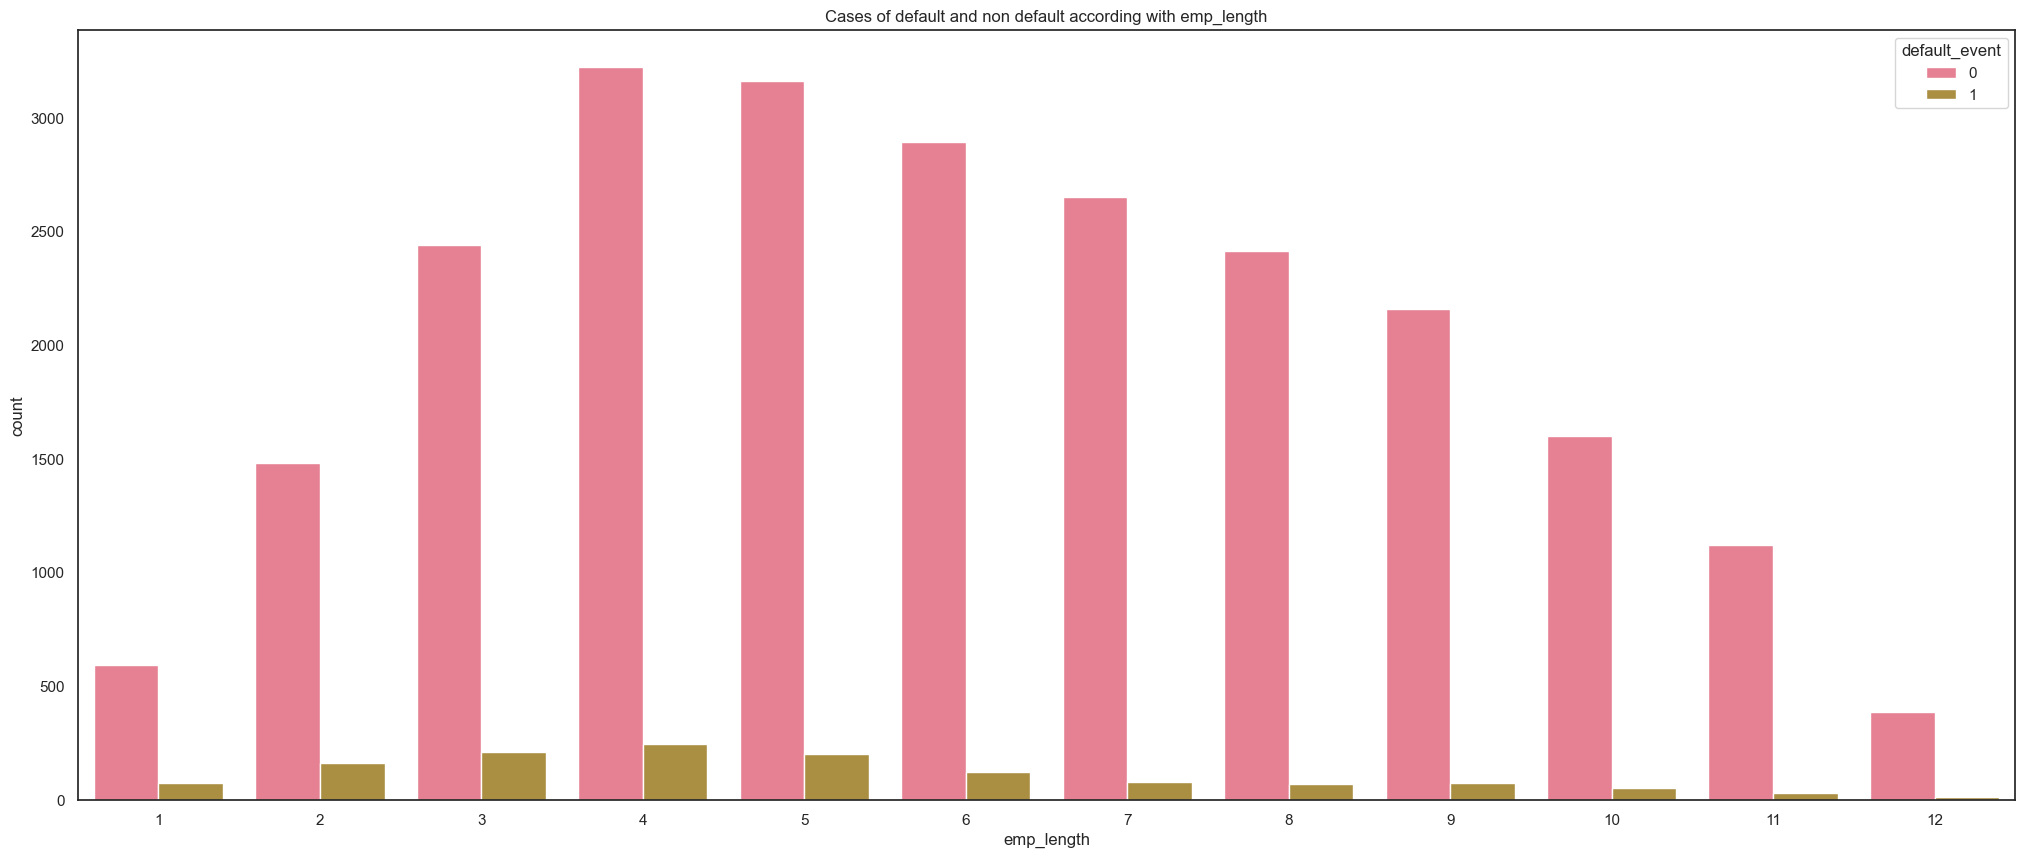

In [36]:
# Cases of default and non default , variable emp_length
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.emp_length)
plt.title('Cases of default and non default according with emp_length')

## ok pl_flag, region, repayment_type, emp_length

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

In [37]:
df2[var_con].describe(percentiles = [0.01,.45,.55,0.99]).T

count          mean           std  \
monthly_installment            25465.0    557.798681    310.878336   
loan_balance                   25465.0  98969.540408  67201.739437   
bureau_score                   25465.0    391.537679    110.119465   
time_since_bankrupt            25465.0      2.350756     11.329791   
time_since_ccj                 25465.0      4.040958     13.952894   
ccj_amount                     25465.0    638.874573  15777.212719   
min_months_since_bankrupt      25465.0      0.327194      4.232650   
ltv                            25465.0      0.579653      0.246780   
arrears_months                 25465.0      0.078958      0.335876   
mob                            25465.0    117.128451     15.204258   
remaining_mat                  25465.0    186.888906     77.331601   
loan_term                      25465.0     25.335166      6.128867   
max_arrears_12m                25465.0      0.197061      0.540765   
max_arrears_bal_6m             25465.0  -4137.668486  23594.157340   
avg_bal_6m                     25465.0  99784.615276  67151.743120   
avg_bureau_score_6m            25465.0    390.324681    108.675575   
cc_util                        25465.0      0.493165      0.183961   
annual_income                  25465.0  63755.667779  16707.410548   
months_since_recent_cc_delinq  25465.0      9.029845      3.882125   

                                       min           1%         45%  \
monthly_installment                 0.0100      15.3304    476.9080   
loan_balance                        0.2000     816.8904  79957.0840   
bureau_score                     -125.0000     135.0000    386.0000   
time_since_bankrupt                 0.0000       0.0000      0.0000   
time_since_ccj                      0.0000       0.0000      0.0000   
ccj_amount                          0.0000       0.0000      0.0000   
min_months_since_bankrupt           0.0000       0.0000      0.0000   
ltv                                 0.0001       0.0077      0.5915   
arrears_months                      0.0000       0.0000      0.0000   
mob                                 4.0000     100.0000    112.0000   
remaining_mat                       0.0000       8.0000    179.0000   
loan_term                           5.0000      10.0000     25.0000   
max_arrears_12m                     0.0000       0.0000      0.0000   
max_arrears_bal_6m            -745026.0000 -104649.7600      0.0000   
avg_bal_6m                          0.0000    1315.1200  80635.2000   
avg_bureau_score_6m               -70.0000     142.0000    384.0000   
cc_util                             0.1501       0.1647      0.4568   
annual_income                   20053.0000   25916.8400  61634.8000   
months_since_recent_cc_delinq       2.0000       2.0000      8.0000   

                                      50%         55%            99%  \
monthly_installment              502.8000    530.8640    1636.412400   
loan_balance                   85446.0800  91747.8040  345982.436800   
bureau_score                     404.0000    421.0000     584.360000   
time_since_bankrupt                0.0000      0.0000      66.000000   
time_since_ccj                     0.0000      0.0000      68.000000   
ccj_amount                         0.0000      0.0000   14977.880000   
min_months_since_bankrupt          0.0000      0.0000       0.000000   
ltv                                0.6284      0.6598       1.025000   
arrears_months                     0.0000      0.0000       1.969248   
mob                              113.0000    115.0000     160.000000   
remaining_mat                    184.0000    190.0000     319.000000   
loan_term                         25.0000     25.0000      35.000000   
max_arrears_12m                    0.0000      0.0000       2.660528   
max_arrears_bal_6m                 0.0000      0.0000    1584.000000   
avg_bal_6m                     86214.0000  92547.2000  348353.680000   
avg_bureau_score_6m              402.0000    418.0000     5

##### Visualmente podemos considerar pl_flag, region, repayment_type, emp_length como las variables categoricas para entrar dentro del análisis

array([[<Axes: title={'center': 'monthly_installment'}>,
        <Axes: title={'center': 'loan_balance'}>,
        <Axes: title={'center': 'bureau_score'}>,
        <Axes: title={'center': 'time_since_bankrupt'}>],
       [<Axes: title={'center': 'time_since_ccj'}>,
        <Axes: title={'center': 'ccj_amount'}>,
        <Axes: title={'center': 'min_months_since_bankrupt'}>,
        <Axes: title={'center': 'ltv'}>],
       [<Axes: title={'center': 'arrears_months'}>,
        <Axes: title={'center': 'mob'}>,
        <Axes: title={'center': 'remaining_mat'}>,
        <Axes: title={'center': 'loan_term'}>],
       [<Axes: title={'center': 'max_arrears_12m'}>,
        <Axes: title={'center': 'max_arrears_bal_6m'}>,
        <Axes: title={'center': 'avg_bal_6m'}>,
        <Axes: title={'center': 'avg_bureau_score_6m'}>],
       [<Axes: title={'center': 'cc_util'}>,
        <Axes: title={'center': 'annual_income'}>,
        <Axes: title={'center': 'months_since_recent_cc_delinq'}>,
        <A

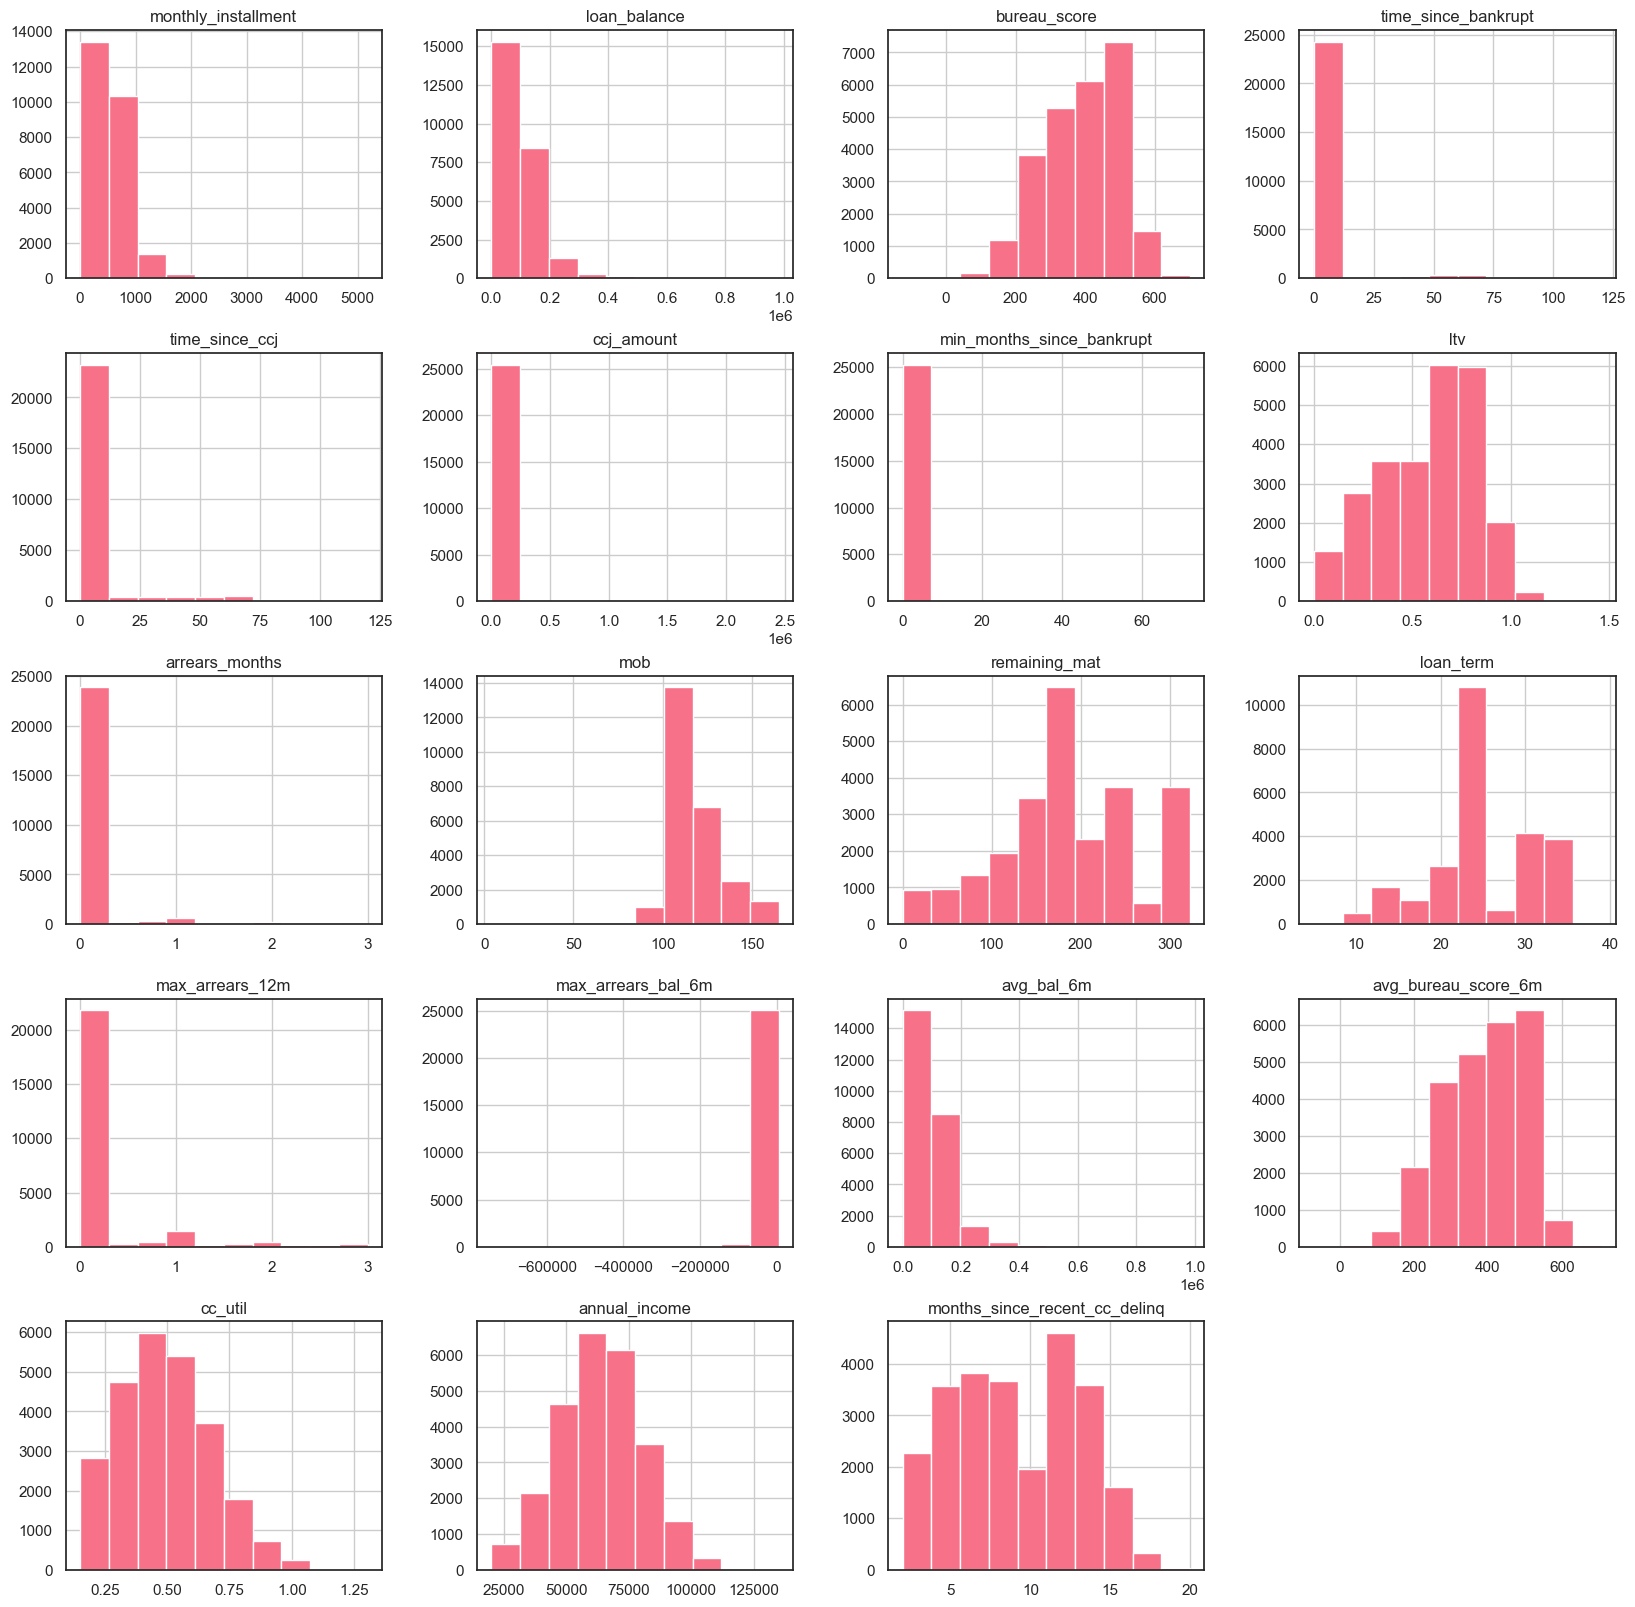

In [38]:
df2[var_con].hist(figsize = (20,20))

#### Eliminación de valores extremos (outliers)

In [39]:
ext = df2[var_con].describe(percentiles=[.001,.999] ).T[['0.1%','99.9%']].reset_index()

In [40]:
ext

index           0.1%          99.9%
0             monthly_installment       0.030000    2585.010080
1                    loan_balance       1.000000  561102.210240
2                    bureau_score      44.464000     661.000000
3             time_since_bankrupt       0.000000      78.000000
4                  time_since_ccj       0.000000      78.000000
5                      ccj_amount       0.000000   45049.888000
6       min_months_since_bankrupt       0.000000      66.000000
7                             ltv       0.000200       1.161845
8                  arrears_months       0.000000       2.887838
9                             mob      28.000000     164.000000
10                  remaining_mat       1.000000     320.000000
11                      loan_term       9.000000      36.000000
12                max_arrears_12m       0.000000       2.995454
13             max_arrears_bal_6m -310086.464000    3129.216000
14                     avg_bal_6m       2.000000  562312.176000
15            avg_bureau_score_6m      64.928000     647.072000
16                        cc_util       0.151593       1.082465
17                  annual_income   21405.656000  109127.144000
18  months_since_recent_cc_delinq       2.000000      19.000000

#### Process

In [41]:
for v, li, ls in ext.values:
    df2[f'ol_{v}'] = (( df2[v] < li ) | ( df2[v] > ls )).astype(int)
    

In [42]:
df2['ext'] = df2.filter(like='ol_').max(axis = 1)

In [43]:
df2['ext'].value_counts(True)*100

ext
0    97.950128
1     2.049872
Name: proportion, dtype: float64

In [44]:
df3 = df2.loc[df2['ext'] == 0].reset_index(drop = True).drop(['ext'],axis= 1)

In [45]:
df3.default_event.value_counts(normalize = True)*100


default_event
0    95.068757
1     4.931243
Name: proportion, dtype: float64

In [46]:
df2.default_event.value_counts(normalize = True)*100


default_event
0    94.753583
1     5.246417
Name: proportion, dtype: float64

#### Validación de Distribución Alterada
#### Validación con p-value

In [47]:

from scipy.stats import ks_2samp


In [48]:
# Validación de Distribución Alterada
# Si el valor KS > .1 se elimina la variable, porque se alteró 
pd.DataFrame( map( lambda v: (v , ks_2samp(df2[v] , df3[v] ).statistic ) , var_con  ), columns=['var','ks']  )

var        ks
0             monthly_installment  0.002810
1                    loan_balance  0.002702
2                    bureau_score  0.002208
3             time_since_bankrupt  0.001741
4                  time_since_ccj  0.001625
5                      ccj_amount  0.001338
6       min_months_since_bankrupt  0.001150
7                             ltv  0.001804
8                  arrears_months  0.002971
9                             mob  0.001146
10                  remaining_mat  0.002146
11                      loan_term  0.002729
12                max_arrears_12m  0.003560
13             max_arrears_bal_6m  0.003424
14                     avg_bal_6m  0.002679
15            avg_bureau_score_6m  0.002198
16                        cc_util  0.002623
17                  annual_income  0.001410
18  months_since_recent_cc_delinq  0.000400

In [49]:
# Validación de Distribución Alterada
# Si el valor KS > .1 se elimina la variable, porque se alteró 
# es mejor el criterio de P-value
pd.DataFrame( map( lambda v: (v , ks_2samp(df2[v] , df3[v] ).pvalue ) , var_con  ), columns=['var','p-value']  )

var   p-value
0             monthly_installment  0.999963
1                    loan_balance  0.999986
2                    bureau_score  1.000000
3             time_since_bankrupt  1.000000
4                  time_since_ccj  1.000000
5                      ccj_amount  1.000000
6       min_months_since_bankrupt  1.000000
7                             ltv  1.000000
8                  arrears_months  0.999874
9                             mob  1.000000
10                  remaining_mat  1.000000
11                      loan_term  0.999982
12                max_arrears_12m  0.997074
13             max_arrears_bal_6m  0.998365
14                     avg_bal_6m  0.999989
15            avg_bureau_score_6m  1.000000
16                        cc_util  0.999994
17                  annual_income  1.000000
18  months_since_recent_cc_delinq  1.000000

#### ¿Cómo se interpreta el valor p en la prueba de Kolmogorov-Smirnov?
#### Un valor p pequeño indica que hay evidencia significativa para rechazar la hipótesis nula de que las distribuciones son iguales.
#### El test estadístico de Kolmogorov–Smirnov para dos muestras está disponible en la función ks_2samp() de la librería scipy.stats. La hipótesis nula de este test considera que ambas muestras proceden de la misma distribución, por lo tanto, solo cuando el p-value estimado es muy pequeño (significativo), se puede considerar que hay evidencias en contra de que la distribución de ambas muestras es la misma.

#### https://cienciadedatos.net/documentos/pystats08-comparacion-distribuciones-test-kolmogorov-smirnov-python

array([[<Axes: title={'center': 'monthly_installment'}>,
        <Axes: title={'center': 'loan_balance'}>,
        <Axes: title={'center': 'bureau_score'}>,
        <Axes: title={'center': 'time_since_bankrupt'}>],
       [<Axes: title={'center': 'time_since_ccj'}>,
        <Axes: title={'center': 'ccj_amount'}>,
        <Axes: title={'center': 'min_months_since_bankrupt'}>,
        <Axes: title={'center': 'ltv'}>],
       [<Axes: title={'center': 'arrears_months'}>,
        <Axes: title={'center': 'mob'}>,
        <Axes: title={'center': 'remaining_mat'}>,
        <Axes: title={'center': 'loan_term'}>],
       [<Axes: title={'center': 'max_arrears_12m'}>,
        <Axes: title={'center': 'max_arrears_bal_6m'}>,
        <Axes: title={'center': 'avg_bal_6m'}>,
        <Axes: title={'center': 'avg_bureau_score_6m'}>],
       [<Axes: title={'center': 'cc_util'}>,
        <Axes: title={'center': 'annual_income'}>,
        <Axes: title={'center': 'months_since_recent_cc_delinq'}>,
        <A

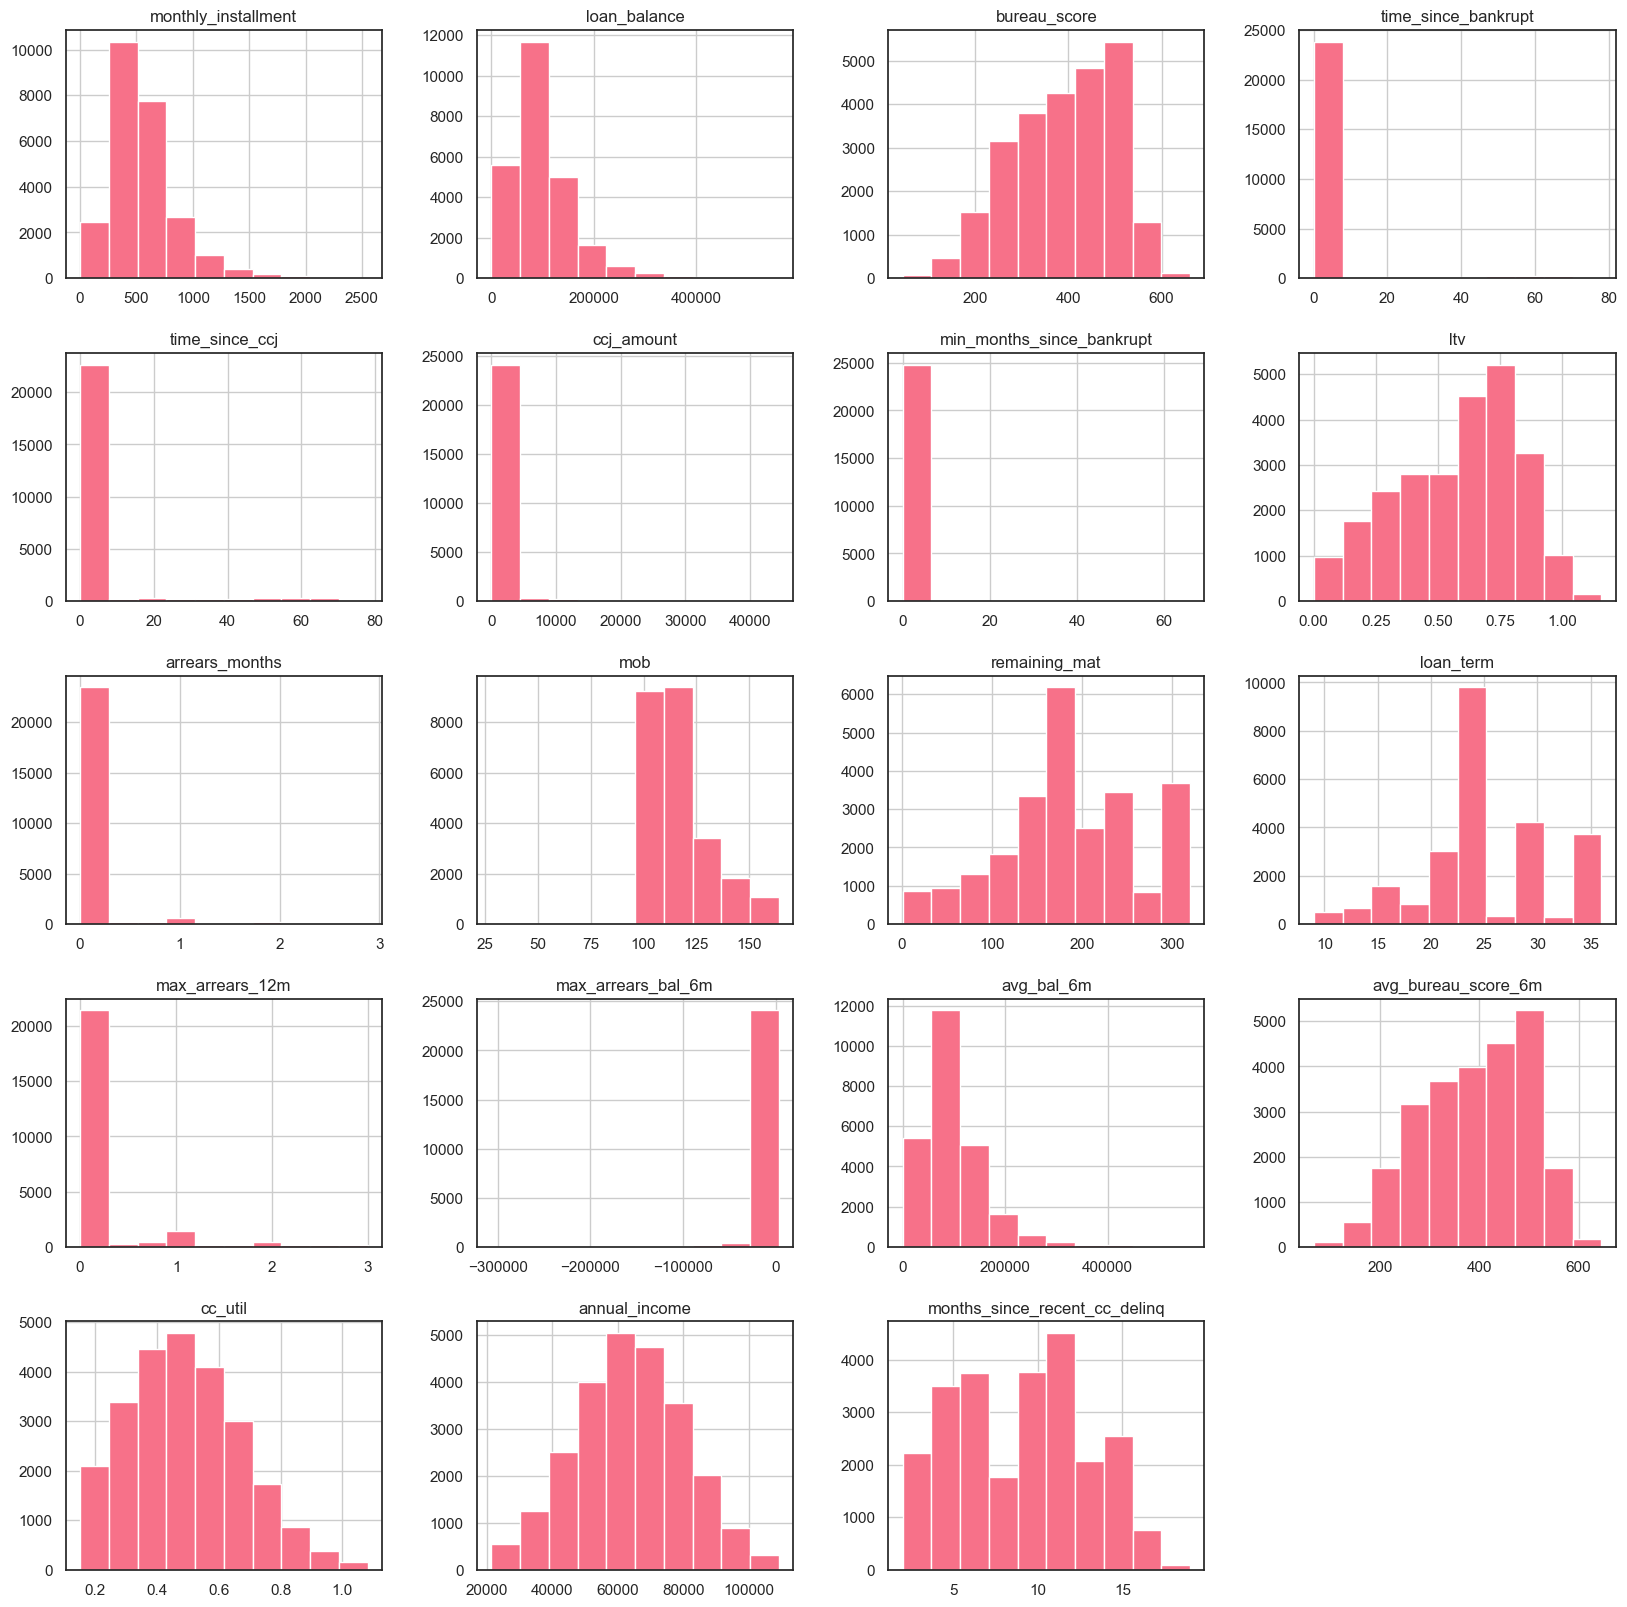

In [50]:
df3[var_con].hist(figsize = (20,20))

In [51]:
# Visualmente podemos considerar 
# 'monthly_installment','loan_balance','bureau_score',
# 'ltv','mob','remaining_mat','loan_term','avg_bal_6m','avg_bureau_score_6m',
# 'cc_util','annual_income','months_since_recent_cc_delinq'
# para entrar dentro del análisis

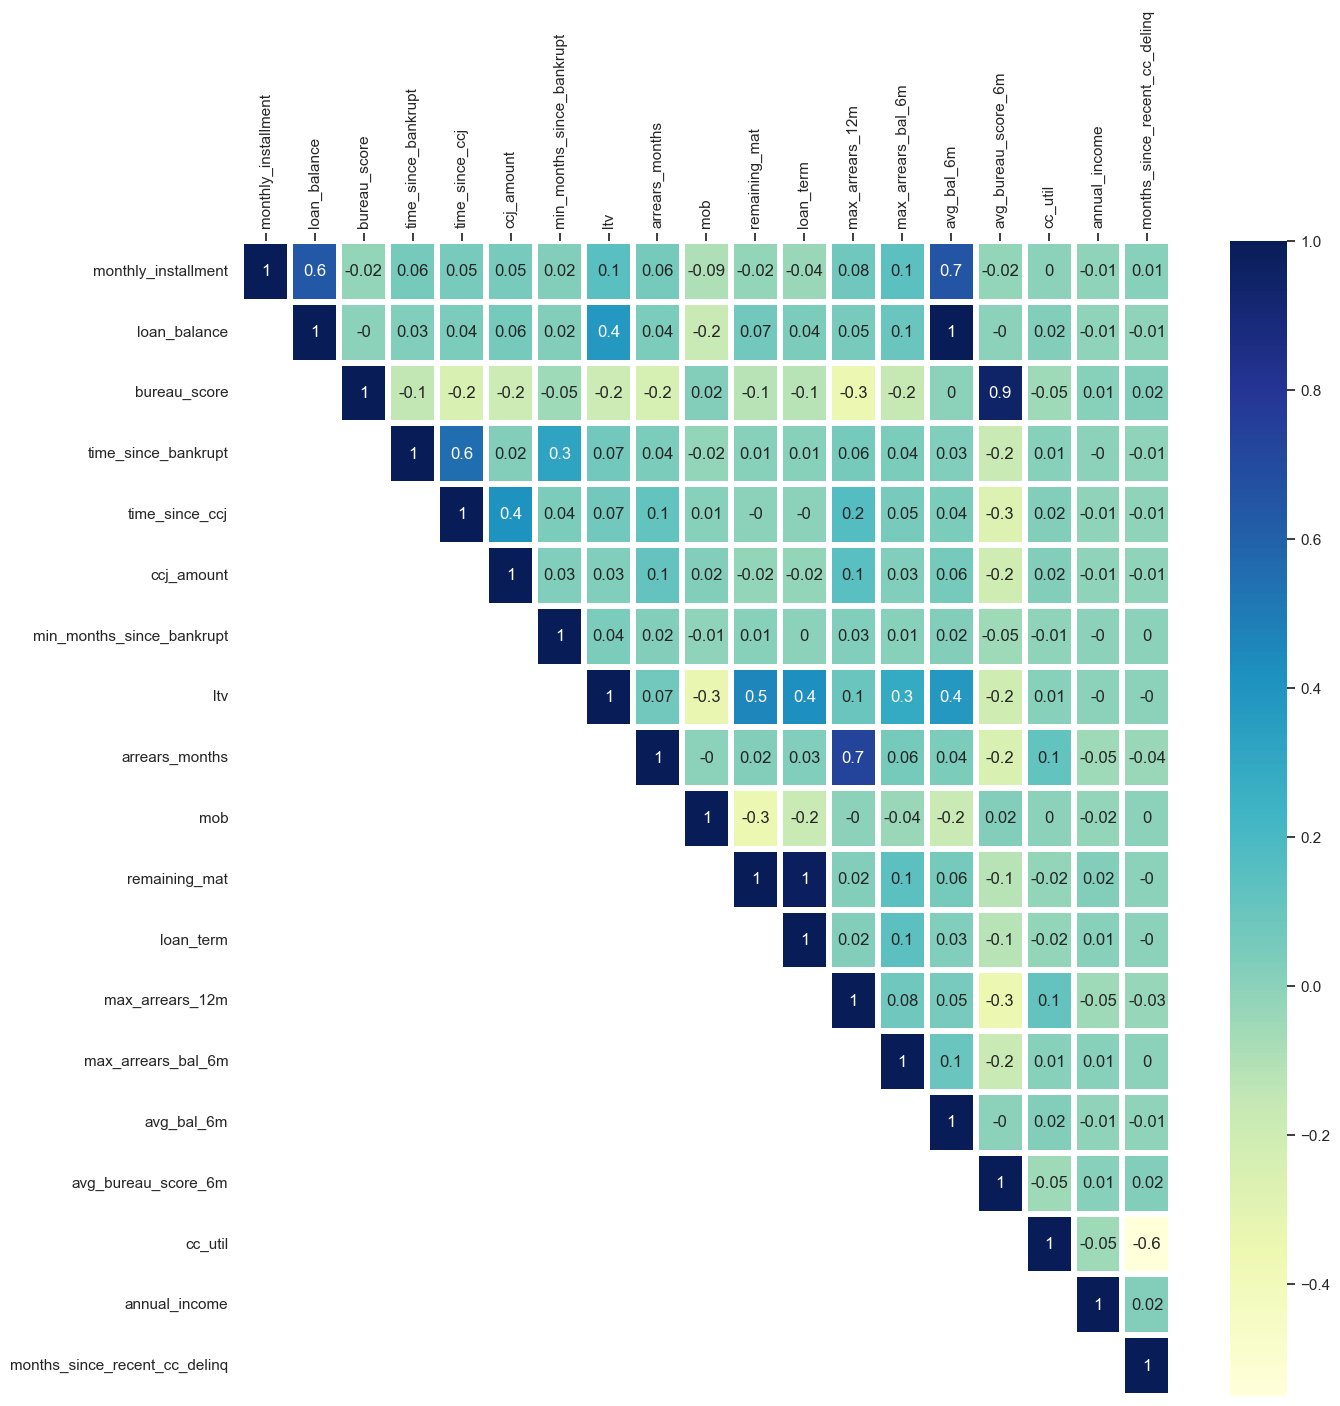

In [52]:
corr_df3_var_con = df3[var_con].corr()
mask = np.tri(corr_df3_var_con.shape[0],corr_df3_var_con.shape[1], k = -1)
plot_corr_up = plt.subplots(figsize = (15, 15))
plot_corr_up = sns.heatmap(round(corr_df3_var_con,2),mask = mask ,annot = True, cmap = 'YlGnBu', linewidths = 3, fmt = '.1g')
plot_corr_up.set(xlabel = "", ylabel = "")
plot_corr_up.xaxis.tick_top()
plot_corr_up.tick_params(axis = 'x', rotation = 90)

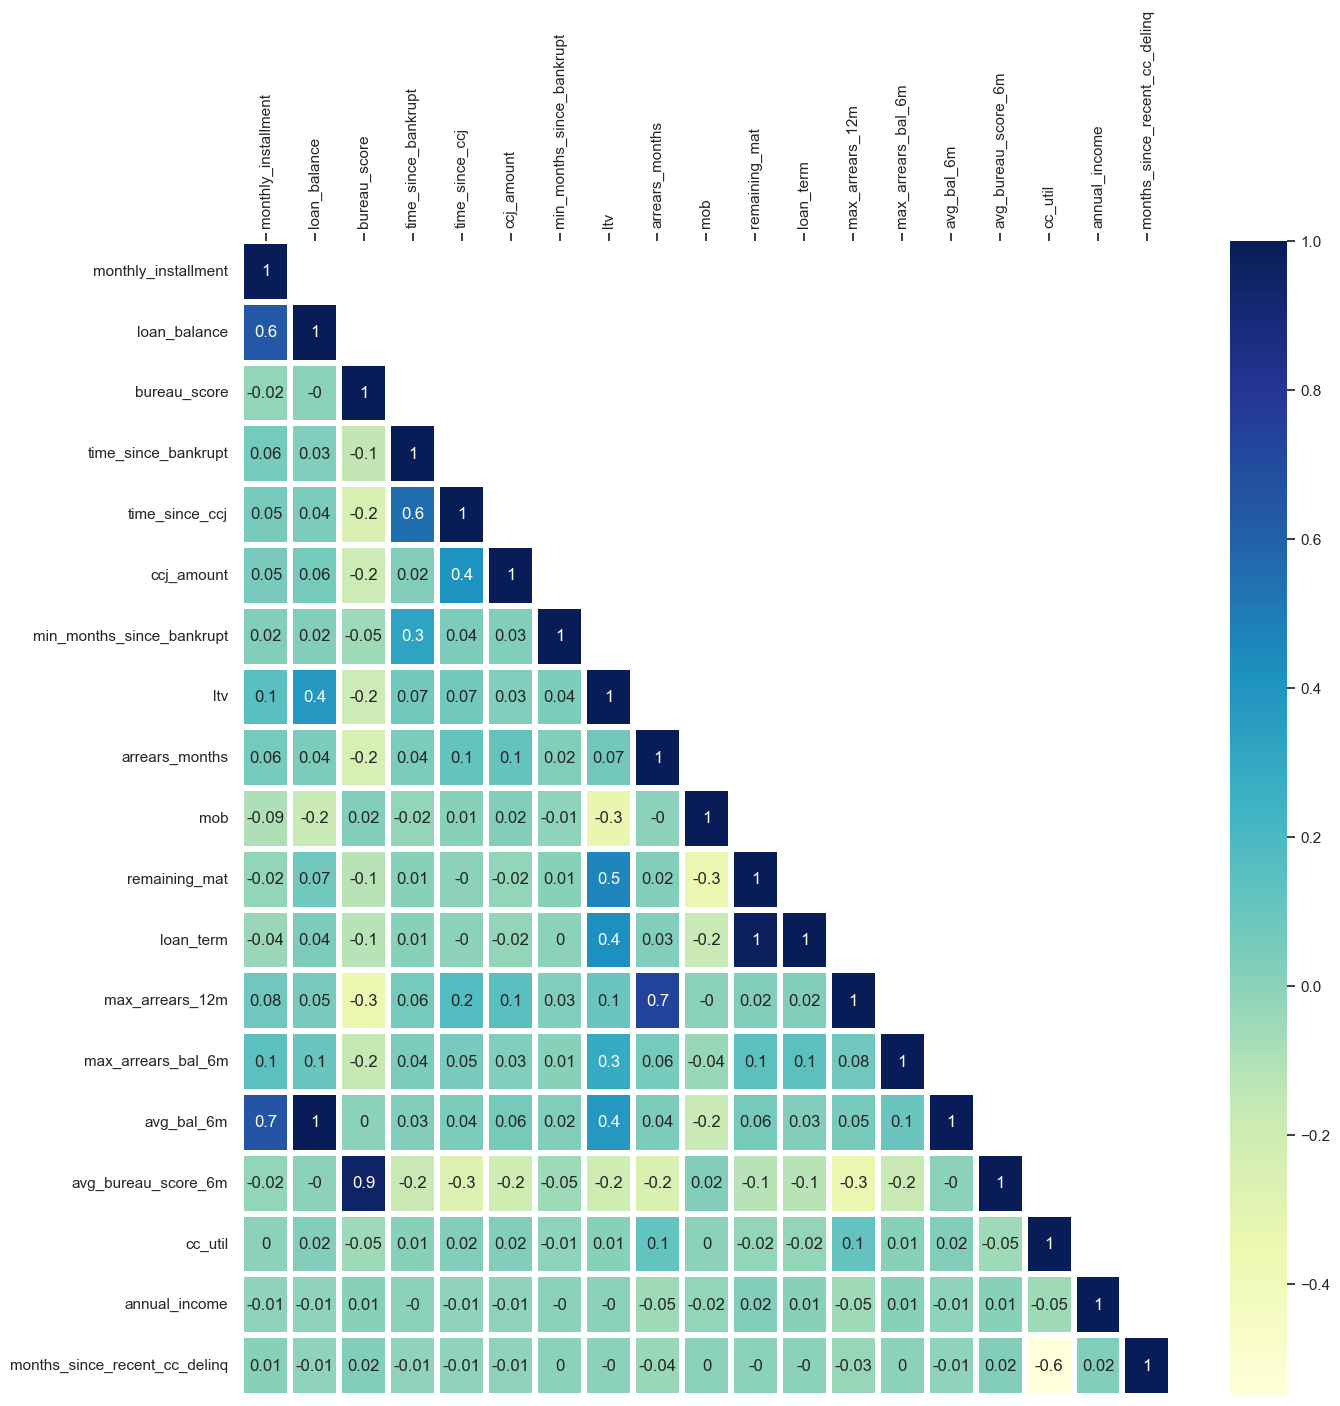

In [53]:
mask_lw = mask.T
plot_corr_lw = plt.subplots(figsize = (15, 15))
plot_corr_lw = sns.heatmap(round(corr_df3_var_con,2),mask = mask_lw ,annot = True, cmap = 'YlGnBu', linewidths = 3, fmt = '.1g')
plot_corr_lw.set(xlabel = "", ylabel = "")
plot_corr_lw.xaxis.tick_top()
plot_corr_lw.tick_params(axis = 'x', rotation = 90)

In [54]:
# Revisando la correlación, estás serían las posibles varieables a descartar
# annual income
# cc_util
# avg_bal_6m, está altamente correlacionada con monthly_atatement y loan _balance. Se elige loan_balance
# max_arrears_bal_6m
# loan_term
# remaining_mat
# min_months_since_bankrupt
# ccj_amount
# time_since_ccj

# En conclusion con la correlación y los histogramas podemos considerar 
# las siguientes variables para entrar dentro del análisis
# 'monthly_installment','loan_balance','bureau_score',
# 'ltv','mob','','','','avg_bureau_score_6m',
# '','annual_income','months_since_recent_cc_delinq'

#var_con2 = ['monthly_installment','loan_balance','bureau_score','ltv','mob', 
#            'avg_bureau_score_6m', 'annual_income', 'months_since_recent_cc_delinq']

#### 3.2 Identificación de variables unarias

In [55]:
# se sacan las variables : 
# var_cat no aplicables
# num_bankrupt
# num_bankrupt_iva
# num_iva
# arrears_status
# arrears_segment
# live_status
# repaid_status
# month
# arrears_event
# bannkrupt_event
# term_expiry_event
# avg_mia_6m
# max_mia_6m
# dentro de la lista de var_cat debido a que se consideran como variables unarias
# es decir; que la mayor parte de la información se concentra en 
# una categoría en particular

# las nuevas variables categoricas
var_cat = ['num_ccj','pl_flag','region','repayment_type','worst_arrears_status','emp_length']
 
# estás las acabo de mater pl_flag, region, repayment_type, emp_length

##### Discretización de variables, Optimal Binnig

In [56]:
from optbinning import BinningProcess, OptimalBinning

(CVXPY) Feb 17 07:23:57 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Feb 17 07:23:57 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')


In [57]:
#from sklearn.preprocessing import KBinsDiscretizer

In [58]:
var_con

['monthly_installment',
 'loan_balance',
 'bureau_score',
 'time_since_bankrupt',
 'time_since_ccj',
 'ccj_amount',
 'min_months_since_bankrupt',
 'ltv',
 'arrears_months',
 'mob',
 'remaining_mat',
 'loan_term',
 'max_arrears_12m',
 'max_arrears_bal_6m',
 'avg_bal_6m',
 'avg_bureau_score_6m',
 'cc_util',
 'annual_income',
 'months_since_recent_cc_delinq']

#### 5.0 Univariate Analysis

#### Function

In [59]:
# Getting IV value for numerical variables 
# genera cada una de las tablas con varios resultados, entre estos el IV: Information Value

iv_list_con = []

for val in var_con:

    x = df2[val].values
    y = df2['default_event'].values
    optb = OptimalBinning(name = val, dtype = 'numerical', solver = 'cp')
    optb.fit(x, y)
    binning_table = optb.binning_table
    iv_list_con.append(binning_table.build().loc['Totals', 'IV'])

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

#### Tables of IV for each continous variables

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

Frecuencias para la variable monthly_installment 



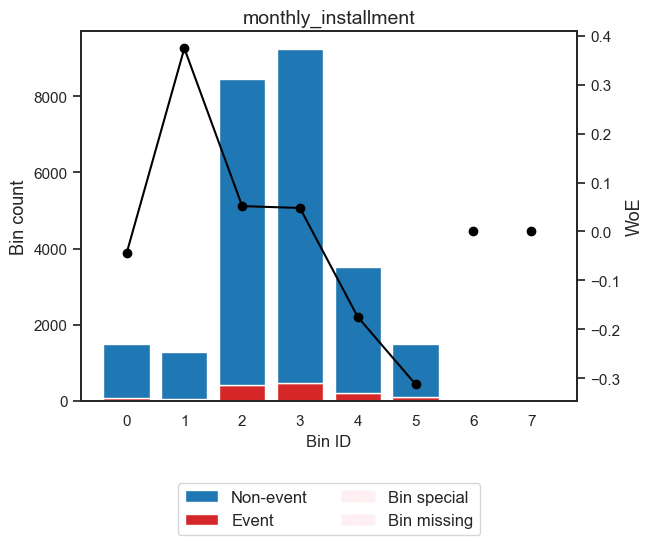

Bin  Count  Count (%)  Non-event  Event  Event rate  \
0          (-inf, 183.82)   1498   0.058826       1416     82    0.054740   
1        [183.82, 265.26)   1281   0.050304       1234     47    0.036690   
2        [265.26, 472.81)   8449   0.331789       8027    422    0.049947   
3        [472.81, 740.87)   9236   0.362694       8773    463    0.050130   
4       [740.87, 1075.07)   3508   0.137758       3291    217    0.061859   
5          [1075.07, inf)   1493   0.058629       1388    105    0.070328   
6                 Special      0   0.000000          0      0    0.000000   
7                 Missing      0   0.000000          0      0    0.000000   
Totals                     25465   1.000000      24129   1336    0.052464   

             WoE        IV        JS  
0      -0.044862  0.000121  0.000015  
1       0.374134  0.005972  0.000742  
2       0.051826  0.000871  0.000109  
3       0.047973  0.000817  0.000102  
4      -0.174685  0.004548  0.000568  
5      -0.312076  0.006575  0.000819  
6            0.0  0.000000  0.000000  
7            0.0  0.000000  0.000000  
Totals            0.018903  0.002355

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

Frecuencias para la variable loan_balance 



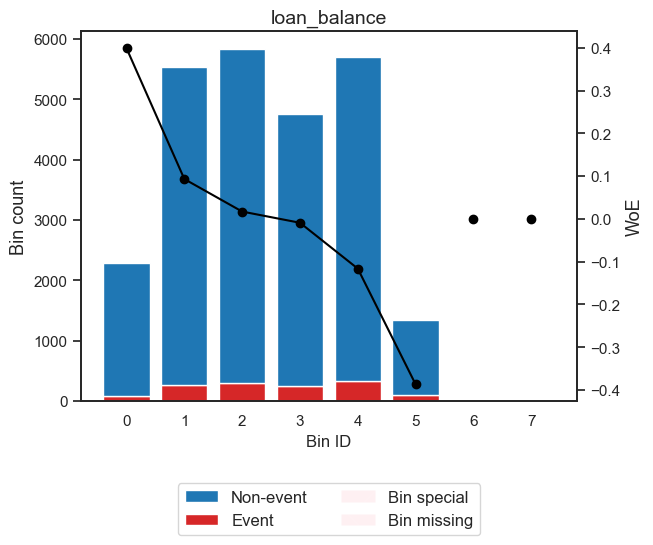

Bin  Count  Count (%)  Non-event  Event  \
0             (-inf, 31282.18)   2289   0.089888       2207     82   
1         [31282.18, 65302.21)   5539   0.217514       5273    266   
2         [65302.21, 90047.64)   5831   0.228981       5530    301   
3        [90047.64, 118370.91)   4762   0.187002       4510    252   
4       [118370.91, 214110.12)   5704   0.223994       5370    334   
5             [214110.12, inf)   1340   0.052621       1239    101   
6                      Special      0   0.000000          0      0   
7                      Missing      0   0.000000          0      0   
Totals                          25465   1.000000      24129   1336   

        Event rate       WoE        IV        JS  
0         0.035824  0.398936  0.012004  0.001491  
1         0.048023  0.093124  0.001810  0.000226  
2         0.051621  0.017098  0.000066  0.000008  
3         0.052919 -0.009111  0.000016  0.000002  
4         0.058555 -0.116292  0.003192  0.000399  
5         0.075373 -0.386795  0.009380  0.001165  
6         0.000000       0.0  0.000000  0.000000  
7         0.000000       0.0  0.000000  0.000000  
Totals    0.052464            0.026467  0.003291

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

Frecuencias para la variable bureau_score 



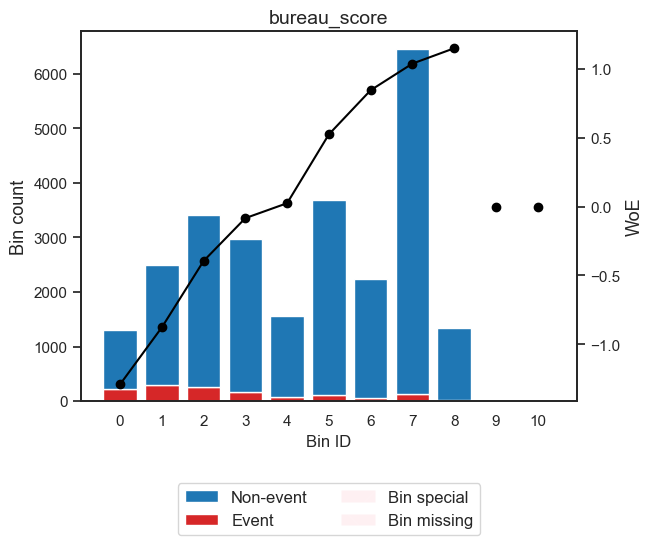

Bin  Count  Count (%)  Non-event  Event  Event rate  \
0         (-inf, 203.50)   1301   0.051090       1083    218    0.167563   
1       [203.50, 264.50)   2503   0.098292       2209    294    0.117459   
2       [264.50, 321.50)   3411   0.133949       3152    259    0.075931   
3       [321.50, 367.50)   2976   0.116866       2807    169    0.056788   
4       [367.50, 390.50)   1561   0.061300       1481     80    0.051249   
5       [390.50, 439.50)   3688   0.144826       3571    117    0.031725   
6       [439.50, 467.50)   2239   0.087925       2187     52    0.023225   
7       [467.50, 540.50)   6451   0.253328       6327    124    0.019222   
8          [540.50, inf)   1335   0.052425       1312     23    0.017228   
9                Special      0   0.000000          0      0    0.000000   
10               Missing      0   0.000000          0      0    0.000000   
Totals                    25465   1.000000      24129   1336    0.052464   

             WoE        IV        JS  
0      -1.290739  0.152681  0.017862  
1      -0.877019  0.112706  0.013653  
2       -0.39477  0.024962  0.003100  
3      -0.083762  0.000851  0.000106  
4       0.024712  0.000037  0.000005  
5       0.524693  0.031703  0.003918  
6       0.845308  0.043716  0.005307  
7       1.038566  0.175934  0.021054  
8       1.150079  0.042736  0.005066  
9            0.0  0.000000  0.000000  
10           0.0  0.000000  0.000000  
Totals            0.585326  0.070071



Frecuencias para la variable time_since_bankrupt 



c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

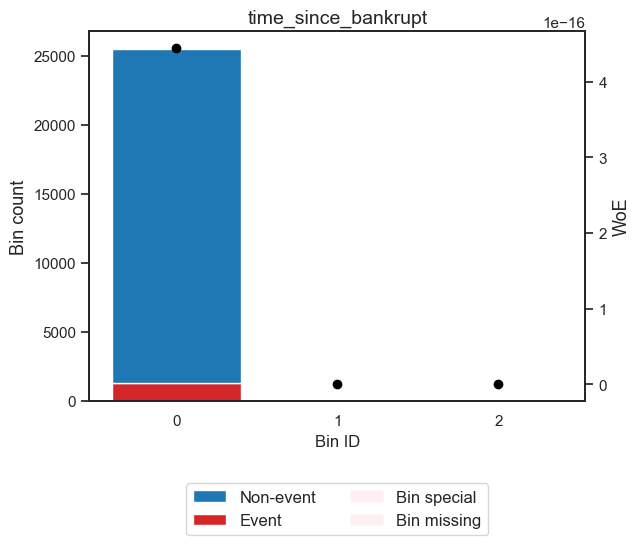

Bin  Count  Count (%)  Non-event  Event  Event rate  WoE   IV  \
0       (-inf, inf)  25465        1.0      24129   1336    0.052464  0.0  0.0   
1           Special      0        0.0          0      0    0.000000  0.0  0.0   
2           Missing      0        0.0          0      0    0.000000  0.0  0.0   
Totals               25465        1.0      24129   1336    0.052464       0.0   

         JS  
0       0.0  
1       0.0  
2       0.0  
Totals  0.0



Frecuencias para la variable time_since_ccj 



c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

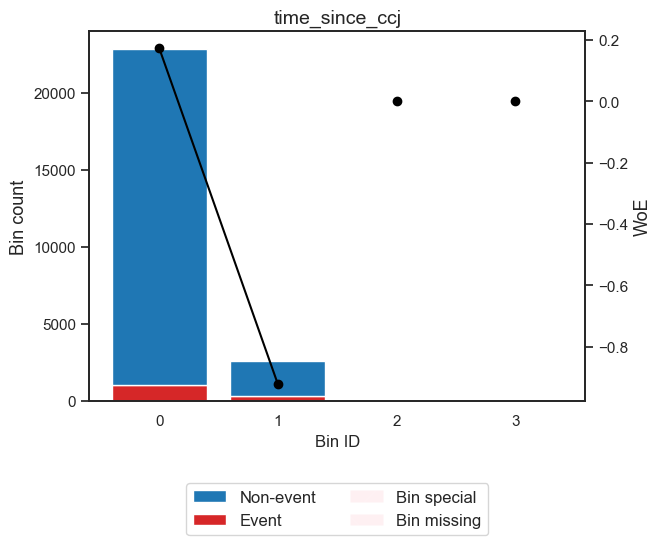

Bin  Count  Count (%)  Non-event  Event  Event rate  \
0       (-inf, 0.50)  22857   0.897585      21840   1017    0.044494   
1        [0.50, inf)   2608   0.102415       2289    319    0.122316   
2            Special      0   0.000000          0      0    0.000000   
3            Missing      0   0.000000          0      0    0.000000   
Totals                25465   1.000000      24129   1336    0.052464   

             WoE        IV        JS  
0       0.173152  0.024918  0.003111  
1      -0.923055  0.132834  0.016039  
2            0.0  0.000000  0.000000  
3            0.0  0.000000  0.000000  
Totals            0.157752  0.019150



Frecuencias para la variable ccj_amount 



c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

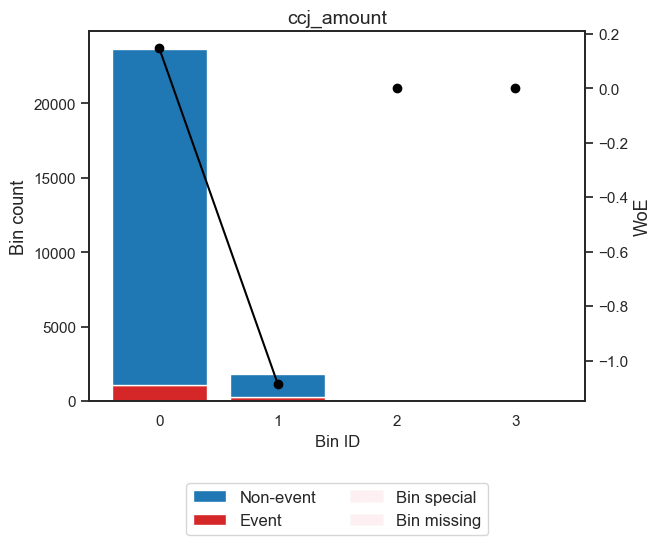

Bin  Count  Count (%)  Non-event  Event  Event rate  \
0       (-inf, 167.00)  23643   0.928451      22564   1079    0.045637   
1        [167.00, inf)   1822   0.071549       1565    257    0.141054   
2              Special      0   0.000000          0      0    0.000000   
3              Missing      0   0.000000          0      0    0.000000   
Totals                  25465   1.000000      24129   1336    0.052464   

             WoE        IV        JS  
0       0.146587  0.018691  0.002334  
1      -1.087169  0.138620  0.016522  
2            0.0  0.000000  0.000000  
3            0.0  0.000000  0.000000  
Totals            0.157311  0.018856



Frecuencias para la variable min_months_since_bankrupt 



c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

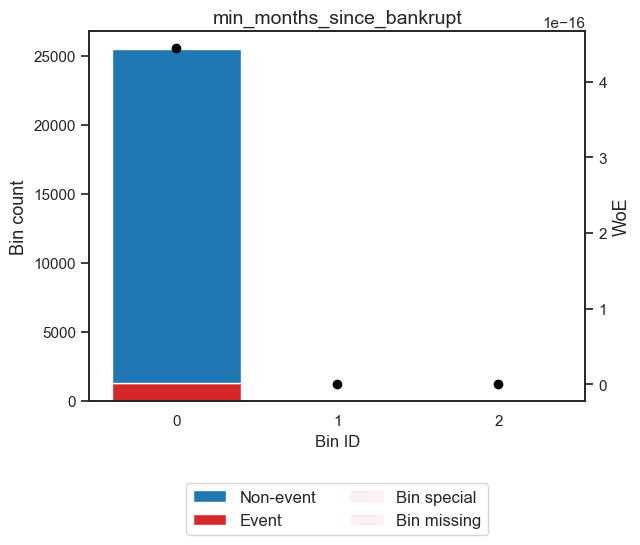

Bin  Count  Count (%)  Non-event  Event  Event rate  WoE   IV  \
0       (-inf, inf)  25465        1.0      24129   1336    0.052464  0.0  0.0   
1           Special      0        0.0          0      0    0.000000  0.0  0.0   
2           Missing      0        0.0          0      0    0.000000  0.0  0.0   
Totals               25465        1.0      24129   1336    0.052464       0.0   

         JS  
0       0.0  
1       0.0  
2       0.0  
Totals  0.0

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

Frecuencias para la variable ltv 



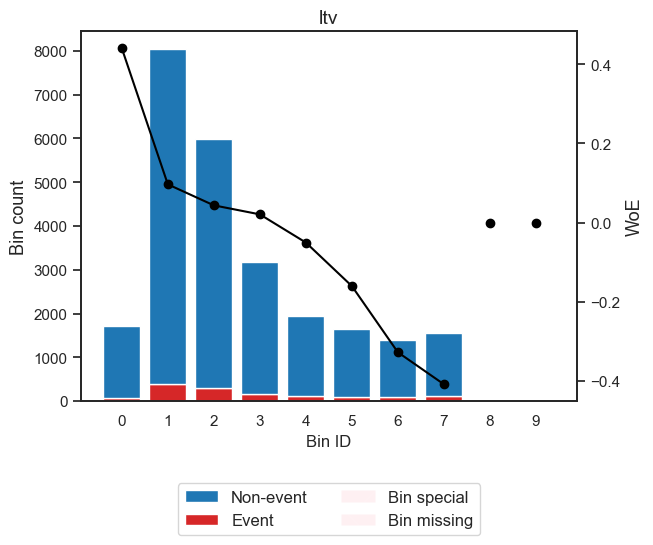

Bin  Count  Count (%)  Non-event  Event  Event rate  \
0       (-inf, 0.17)   1714   0.067308       1655     59    0.034422   
1       [0.17, 0.53)   8042   0.315806       7657    385    0.047874   
2       [0.53, 0.70)   5998   0.235539       5696    302    0.050350   
3       [0.70, 0.77)   3168   0.124406       3005    163    0.051452   
4       [0.77, 0.81)   1944   0.076340       1837    107    0.055041   
5       [0.81, 0.85)   1638   0.064324       1538    100    0.061050   
6       [0.85, 0.91)   1401   0.055017       1301    100    0.071378   
7        [0.91, inf)   1560   0.061261       1440    120    0.076923   
8            Special      0   0.000000          0      0    0.000000   
9            Missing      0   0.000000          0      0    0.000000   
Totals                25465   1.000000      24129   1336    0.052464   

             WoE        IV        JS  
0       0.440284  0.010755  0.001334  
1       0.096398  0.002811  0.000351  
2       0.043358  0.000434  0.000054  
3       0.020548  0.000052  0.000007  
4      -0.050674  0.000201  0.000025  
5      -0.160666  0.001785  0.000223  
6      -0.328016  0.006866  0.000854  
7      -0.408828  0.012323  0.001530  
8            0.0  0.000000  0.000000  
9            0.0  0.000000  0.000000  
Totals            0.035227  0.004378



Frecuencias para la variable arrears_months 



c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

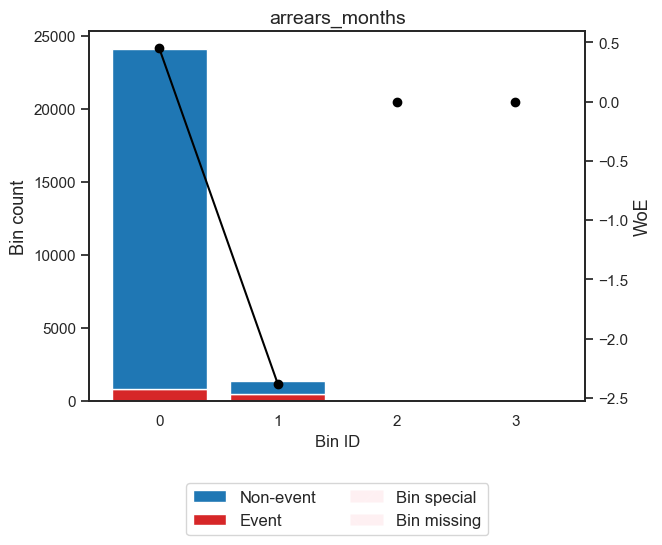

Bin  Count  Count (%)  Non-event  Event  Event rate  \
0       (-inf, 0.66)  24097   0.946279      23275    822    0.034112   
1        [0.66, inf)   1368   0.053721        854    514    0.375731   
2            Special      0   0.000000          0      0    0.000000   
3            Missing      0   0.000000          0      0    0.000000   
Totals                25465   1.000000      24129   1336    0.052464   

             WoE        IV        JS  
0        0.44966  0.157083  0.019472  
1      -2.386026  0.833528  0.084893  
2            0.0  0.000000  0.000000  
3            0.0  0.000000  0.000000  
Totals            0.990612  0.104364

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

Frecuencias para la variable mob 



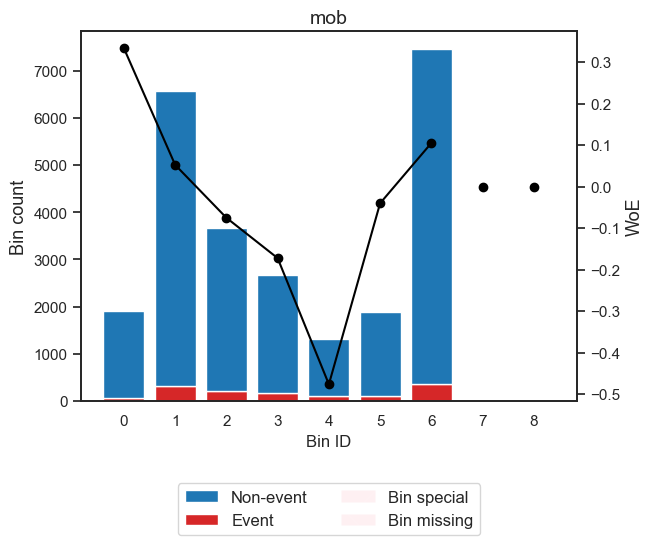

Bin  Count  Count (%)  Non-event  Event  Event rate  \
0         (-inf, 101.50)   1913   0.075123       1840     73    0.038160   
1       [101.50, 108.50)   6570   0.258001       6242    328    0.049924   
2       [108.50, 112.50)   3657   0.143609       3451    206    0.056330   
3       [112.50, 116.50)   2673   0.104968       2508    165    0.061728   
4       [116.50, 118.50)   1307   0.051325       1200    107    0.081867   
5       [118.50, 121.50)   1890   0.074220       1787    103    0.054497   
6          [121.50, inf)   7455   0.292755       7101    354    0.047485   
7                Special      0   0.000000          0      0    0.000000   
8                Missing      0   0.000000          0      0    0.000000   
Totals                    25465   1.000000      24129   1336    0.052464   

             WoE        IV        JS  
0       0.333327  0.007205  0.000897  
1       0.052308  0.000690  0.000086  
2      -0.075191  0.000840  0.000105  
3      -0.172439  0.003373  0.000421  
4      -0.476486  0.014465  0.001791  
5       -0.04017  0.000122  0.000015  
6        0.10496  0.003078  0.000385  
7            0.0  0.000000  0.000000  
8            0.0  0.000000  0.000000  
Totals            0.029772  0.003700

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

Frecuencias para la variable remaining_mat 



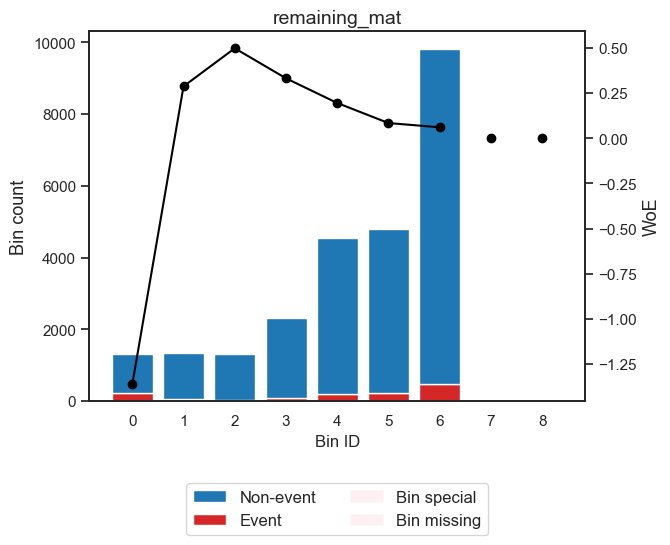

Bin  Count  Count (%)  Non-event  Event  Event rate  \
0          (-inf, 48.50)   1317   0.051718       1083    234    0.177677   
1         [48.50, 80.50)   1329   0.052189       1276     53    0.039880   
2        [80.50, 112.50)   1321   0.051875       1278     43    0.032551   
3       [112.50, 140.50)   2329   0.091459       2240     89    0.038214   
4       [140.50, 175.50)   4545   0.178480       4347    198    0.043564   
5       [175.50, 195.50)   4811   0.188926       4578    233    0.048431   
6          [195.50, inf)   9813   0.385352       9327    486    0.049526   
7                Special      0   0.000000          0      0    0.000000   
8                Missing      0   0.000000          0      0    0.000000   
Totals                    25465   1.000000      24129   1336    0.052464   

             WoE        IV        JS  
0      -1.361565  0.177366  0.020603  
1       0.287459  0.003798  0.000473  
2       0.498117  0.010351  0.001281  
3        0.33186  0.008701  0.001083  
4        0.19524  0.006239  0.000779  
5       0.084245  0.001291  0.000161  
6       0.060726  0.001383  0.000173  
7            0.0  0.000000  0.000000  
8            0.0  0.000000  0.000000  
Totals            0.209128  0.024552



Frecuencias para la variable loan_term 



c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

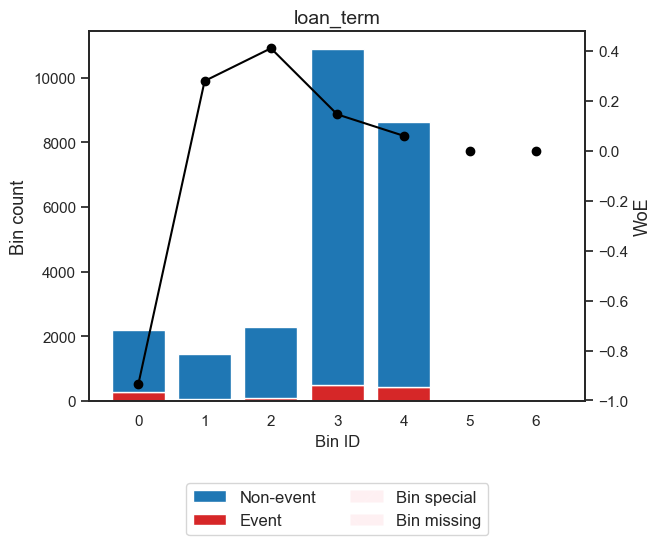

Bin  Count  Count (%)  Non-event  Event  Event rate  \
0        (-inf, 15.50)   2200   0.086393       1928    272    0.123636   
1       [15.50, 19.50)   1469   0.057687       1410     59    0.040163   
2       [19.50, 21.50)   2288   0.089849       2207     81    0.035402   
3       [21.50, 26.50)  10887   0.427528      10390    497    0.045651   
4         [26.50, inf)   8621   0.338543       8194    427    0.049530   
5              Special      0   0.000000          0      0    0.000000   
6              Missing      0   0.000000          0      0    0.000000   
Totals                  25465   1.000000      24129   1336    0.052464   

             WoE        IV        JS  
0      -0.935298  0.115686  0.013956  
1       0.280073  0.003998  0.000498  
2       0.411206  0.012681  0.001574  
3       0.146275  0.008571  0.001070  
4       0.060639  0.001212  0.000151  
5            0.0  0.000000  0.000000  
6            0.0  0.000000  0.000000  
Totals            0.142147  0.017250



Frecuencias para la variable max_arrears_12m 



c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

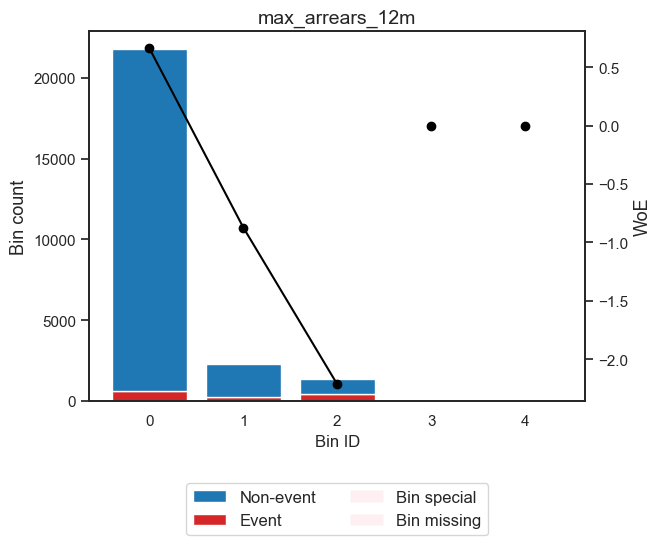

Bin  Count  Count (%)  Non-event  Event  Event rate  \
0       (-inf, 0.30)  21780   0.855292      21175    605    0.027778   
1       [0.30, 1.31)   2317   0.090988       2046    271    0.116962   
2        [1.31, inf)   1368   0.053721        908    460    0.336257   
3            Special      0   0.000000          0      0    0.000000   
4            Missing      0   0.000000          0      0    0.000000   
Totals                25465   1.000000      24129   1336    0.052464   

             WoE        IV        JS  
0       0.661614  0.281007  0.034499  
1      -0.872211  0.102965  0.012478  
2      -2.213716  0.678903  0.070911  
3            0.0  0.000000  0.000000  
4            0.0  0.000000  0.000000  
Totals            1.062875  0.117887



Frecuencias para la variable max_arrears_bal_6m 



c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

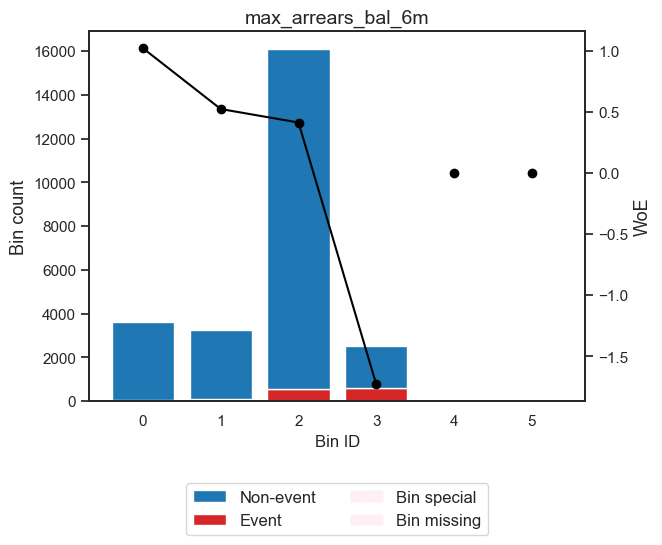

Bin  Count  Count (%)  Non-event  Event  Event rate  \
0          (-inf, -1113.00)   3635   0.142745       3564     71    0.019532   
1       [-1113.00, -137.00)   3246   0.127469       3143    103    0.031731   
2         [-137.00, 293.00)  16089   0.631808      15521    568    0.035304   
3             [293.00, inf)   2495   0.097978       1901    594    0.238076   
4                   Special      0   0.000000          0      0    0.000000   
5                   Missing      0   0.000000          0      0    0.000000   
Totals                       25465   1.000000      24129   1336    0.052464   

             WoE        IV        JS  
0       1.022225  0.096664  0.011583  
1        0.52447  0.027882  0.003446  
2       0.414093  0.090314  0.011209  
3      -1.730478  0.633054  0.070534  
4            0.0  0.000000  0.000000  
5            0.0  0.000000  0.000000  
Totals            0.847914  0.096772

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

Frecuencias para la variable avg_bal_6m 



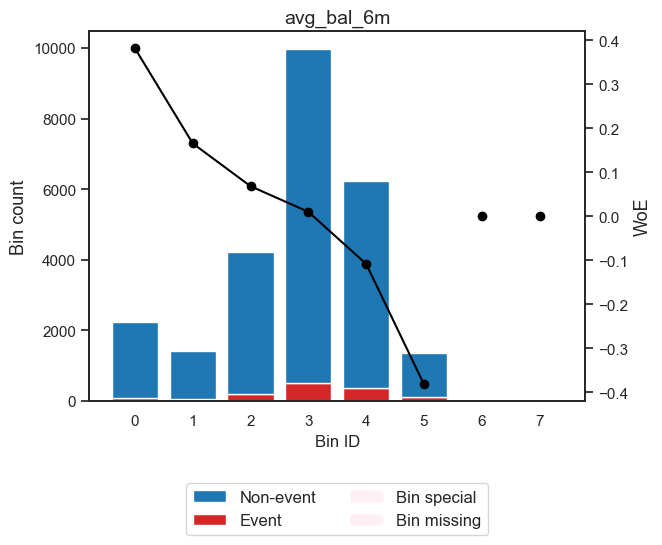

Bin  Count  Count (%)  Non-event  Event  \
0             (-inf, 31913.00)   2251   0.088396       2169     82   
1         [31913.00, 44803.00)   1428   0.056077       1364     64   
2         [44803.00, 66279.00)   4210   0.165325       4003    207   
3        [66279.00, 114735.00)   9969   0.391478       9451    518   
4       [114735.00, 213862.00)   6247   0.245317       5884    363   
5             [213862.00, inf)   1360   0.053407       1258    102   
6                      Special      0   0.000000          0      0   
7                      Missing      0   0.000000          0      0   
Totals                          25465   1.000000      24129   1336   

        Event rate       WoE        IV        JS  
0         0.036428  0.381568  0.010880  0.001352  
1         0.044818  0.165559  0.001428  0.000178  
2         0.049169  0.068346  0.000749  0.000094  
3         0.051961  0.010166  0.000040  0.000005  
4         0.058108 -0.108145  0.003012  0.000376  
5         0.075000 -0.381429  0.009235  0.001147  
6         0.000000       0.0  0.000000  0.000000  
7         0.000000       0.0  0.000000  0.000000  
Totals    0.052464            0.025344  0.003152

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

Frecuencias para la variable avg_bureau_score_6m 



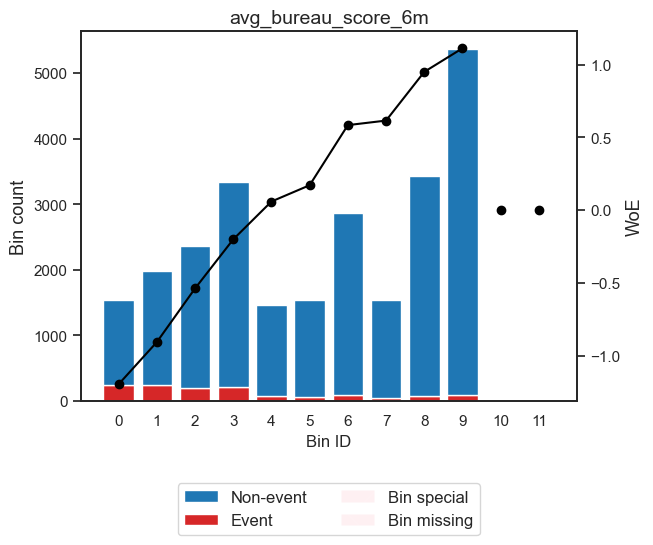

Bin  Count  Count (%)  Non-event  Event  Event rate  \
0         (-inf, 215.00)   1543   0.060593       1304    239    0.154893   
1       [215.00, 259.00)   1981   0.077793       1742    239    0.120646   
2       [259.00, 299.00)   2365   0.092873       2160    205    0.086681   
3       [299.00, 351.00)   3342   0.131239       3130    212    0.063435   
4       [351.00, 373.00)   1471   0.057766       1398     73    0.049626   
5       [373.00, 395.00)   1547   0.060750       1478     69    0.044602   
6       [395.00, 433.00)   2870   0.112704       2784     86    0.029965   
7       [433.00, 453.00)   1548   0.060789       1503     45    0.029070   
8       [453.00, 493.00)   3433   0.134812       3361     72    0.020973   
9          [493.00, inf)   5365   0.210681       5269     96    0.017894   
10               Special      0   0.000000          0      0    0.000000   
11               Missing      0   0.000000          0      0    0.000000   
Totals                    25465   1.000000      24129   1336    0.052464   

             WoE        IV        JS  
0      -1.197006  0.149445  0.017640  
1      -0.907409  0.096818  0.011703  
2      -0.538881  0.034448  0.004255  
3      -0.201532  0.005837  0.000728  
4       0.058604  0.000193  0.000024  
5       0.170604  0.001639  0.000205  
6       0.583562  0.029767  0.003669  
7       0.614822  0.017589  0.002165  
8       0.949593  0.081096  0.009773  
9       1.111513  0.162850  0.019369  
10           0.0  0.000000  0.000000  
11           0.0  0.000000  0.000000  
Totals            0.579681  0.069530



Frecuencias para la variable cc_util 



c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

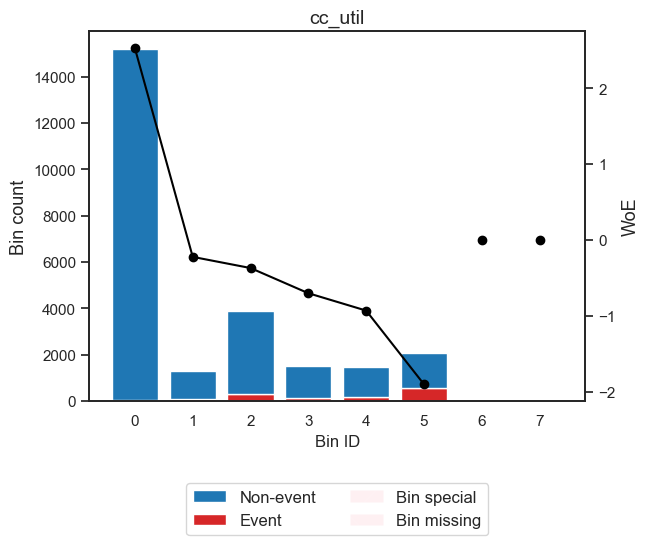

Bin  Count  Count (%)  Non-event  Event  Event rate  \
0       (-inf, 0.53)  15194   0.596662      15127     67    0.004410   
1       [0.53, 0.55)   1298   0.050972       1214     84    0.064715   
2       [0.55, 0.65)   3908   0.153466       3618    290    0.074207   
3       [0.65, 0.70)   1513   0.059415       1361    152    0.100463   
4       [0.70, 0.76)   1478   0.058040       1296    182    0.123139   
5        [0.76, inf)   2074   0.081445       1513    561    0.270492   
6            Special      0   0.000000          0      0    0.000000   
7            Missing      0   0.000000          0      0    0.000000   
Totals                25465   1.000000      24129   1336    0.052464   

             WoE        IV        JS  
0        2.52581  1.456817  0.145269  
1      -0.222875  0.002800  0.000349  
2      -0.369939  0.024831  0.003086  
3       -0.70164  0.040251  0.004931  
4      -0.930703  0.076798  0.009268  
5      -1.901606  0.679264  0.074057  
6            0.0  0.000000  0.000000  
7            0.0  0.000000  0.000000  
Totals            2.280761  0.236960

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

Frecuencias para la variable annual_income 



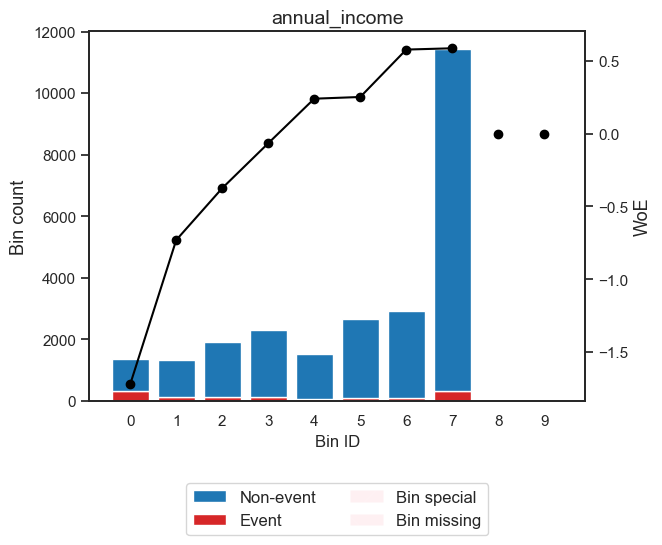

Bin  Count  Count (%)  Non-event  Event  Event rate  \
0           (-inf, 36358.00)   1366   0.053642       1043    323    0.236457   
1       [36358.00, 42542.00)   1318   0.051757       1182    136    0.103187   
2       [42542.00, 48211.50)   1931   0.075830       1787    144    0.074573   
3       [48211.50, 53430.50)   2308   0.090634       2179    129    0.055893   
4       [53430.50, 56407.50)   1532   0.060161       1468     64    0.041775   
5       [56407.50, 61051.00)   2663   0.104575       2553    110    0.041307   
6       [61051.00, 65944.50)   2916   0.114510       2828     88    0.030178   
7            [65944.50, inf)  11431   0.448891      11089    342    0.029919   
8                    Special      0   0.000000          0      0    0.000000   
9                    Missing      0   0.000000          0      0    0.000000   
Totals                        25465   1.000000      24129   1336    0.052464   

             WoE        IV        JS  
0       -1.72153  0.341793  0.038124  
1      -0.731426  0.038626  0.004723  
2      -0.375254  0.012655  0.001573  
3      -0.066925  0.000418  0.000052  
4       0.239039  0.003092  0.000386  
5        0.25081  0.005887  0.000734  
6       0.576254  0.029582  0.003647  
7       0.585164  0.119130  0.014682  
8            0.0  0.000000  0.000000  
9            0.0  0.000000  0.000000  
Totals            0.551184  0.063922



Frecuencias para la variable months_since_recent_cc_delinq 



c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

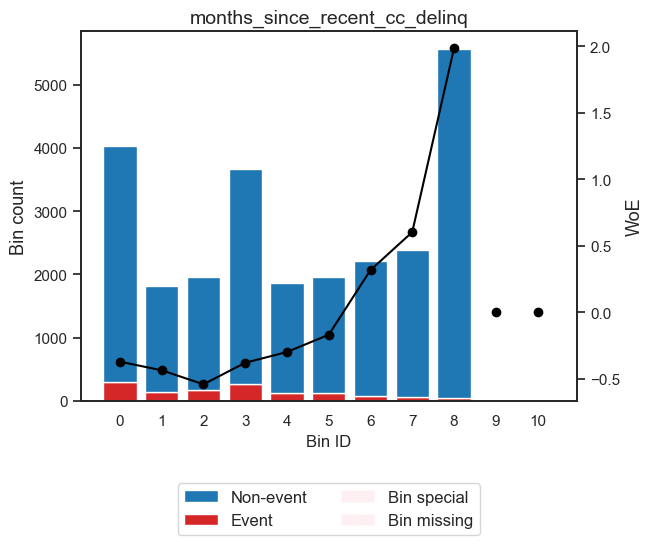

Bin  Count  Count (%)  Non-event  Event  Event rate  \
0         (-inf, 4.50)   4024   0.158021       3725    299    0.074304   
1         [4.50, 5.50)   1825   0.071667       1681    144    0.078904   
2         [5.50, 6.50)   1957   0.076851       1787    170    0.086868   
3         [6.50, 8.50)   3660   0.143727       3386    274    0.074863   
4         [8.50, 9.50)   1872   0.073513       1742    130    0.069444   
5        [9.50, 10.50)   1967   0.077243       1846    121    0.061515   
6       [10.50, 11.50)   2219   0.087139       2133     86    0.038756   
7       [11.50, 12.50)   2380   0.093462       2310     70    0.029412   
8         [12.50, inf)   5561   0.218378       5519     42    0.007553   
9              Special      0   0.000000          0      0    0.000000   
10             Missing      0   0.000000          0      0    0.000000   
Totals                  25465   1.000000      24129   1336    0.052464   

             WoE        IV        JS  
0      -0.371356  0.025781  0.003204  
1      -0.436404  0.016634  0.002063  
2      -0.541239  0.028786  0.003555  
3      -0.379458  0.024574  0.003053  
4       -0.29848  0.007495  0.000933  
5      -0.168748  0.002373  0.000296  
6       0.317203  0.007622  0.000949  
7       0.602773  0.026124  0.003217  
8       1.984548  0.391535  0.042220  
9            0.0  0.000000  0.000000  
10           0.0  0.000000  0.000000  
Totals            0.530925  0.059491

In [60]:
for val in var_con:

    x = df2[val].values
    y = df2['default_event'].values
    optb = OptimalBinning(name = val, dtype = 'numerical', solver = 'cp')
    optb.fit(x, y)
    vcon_table = optb.binning_table.build()
    vacon_grap = optb.binning_table
    print(f"Frecuencias para la variable {val} \n")
    vacon_grap.plot(metric = 'woe')
    display(vcon_table)
    print("\n")

#### Table of IV of continous variables

In [61]:
iv_dict = {'Variable': var_con, 'IV': iv_list_con}
iv_df_con = pd.DataFrame.from_dict(iv_dict)
iv_df_con = iv_df_con.sort_values(by = 'IV', ascending = False)
iv_df_con

Variable        IV
16                        cc_util  2.280761
12                max_arrears_12m  1.062875
8                  arrears_months  0.990612
13             max_arrears_bal_6m  0.847914
2                    bureau_score  0.585326
15            avg_bureau_score_6m  0.579681
17                  annual_income  0.551184
18  months_since_recent_cc_delinq  0.530925
10                  remaining_mat  0.209128
4                  time_since_ccj  0.157752
5                      ccj_amount  0.157311
11                      loan_term  0.142147
7                             ltv  0.035227
9                             mob  0.029772
1                    loan_balance  0.026467
14                     avg_bal_6m  0.025344
0             monthly_installment  0.018903
6       min_months_since_bankrupt  0.000000
3             time_since_bankrupt  0.000000

In [62]:
var_cat

['num_ccj',
 'pl_flag',
 'region',
 'repayment_type',
 'worst_arrears_status',
 'emp_length']

#### Function for categorical variables

In [63]:
# Getting IV value for numerical variables 
# genera cada una de las tablas con varios resultados, entre estos el IV: Information Value

iv_list_cat = []

for val in var_cat:

    x = df3[val].values
    y = df3['default_event'].values
    optb = OptimalBinning(name = val, dtype = 'categorical', solver = 'cp')
    optb.fit(x, y)
    binning_table = optb.binning_table
    iv_list_cat.append(binning_table.build().loc['Totals', 'IV'])

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

#### Tables of IV of each categorical variables

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

Frecuencias para la variable num_ccj 



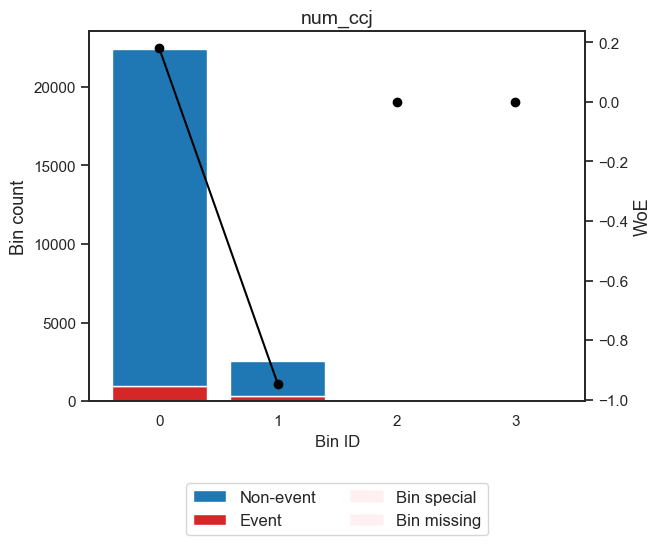

Bin  Count  Count (%)  Non-event  \
0                          [8.0, 17.0, 0.0]  22411   0.898489      21480   
1       [2.0, 1.0, 3.0, 5.0, 7.0, 4.0, 6.0]   2532   0.101511       2233   
2                                   Special      0   0.000000          0   
3                                   Missing      0   0.000000          0   
Totals                                       24943   1.000000      23713   

        Event  Event rate       WoE        IV        JS  
0         931    0.041542  0.179609  0.026748  0.003339  
1         299    0.118088 -0.948352  0.141230  0.017021  
2           0    0.000000       0.0  0.000000  0.000000  
3           0    0.000000       0.0  0.000000  0.000000  
Totals   1230    0.049312            0.167978  0.020360



Frecuencias para la variable pl_flag 



c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

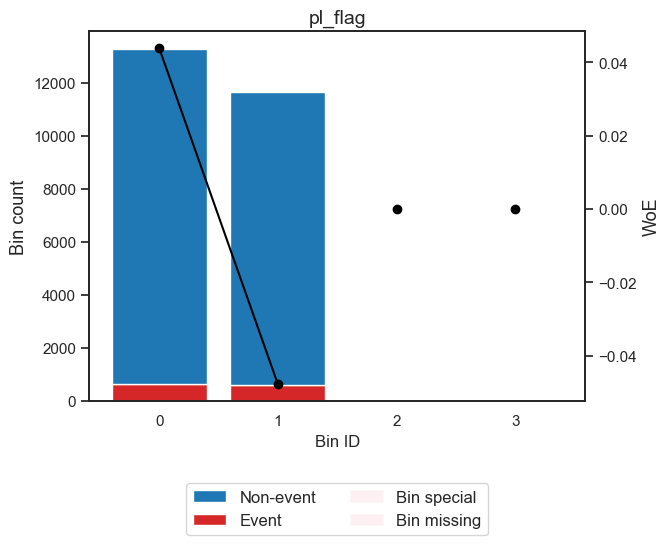

Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
0           [0]  13277   0.532294      12649    628    0.047300  0.043784   
1           [1]  11666   0.467706      11064    602    0.051603 -0.047815   
2       Special      0   0.000000          0      0    0.000000       0.0   
3       Missing      0   0.000000          0      0    0.000000       0.0   
Totals           24943   1.000000      23713   1230    0.049312             

              IV        JS  
0       0.001001  0.000125  
1       0.001093  0.000137  
2       0.000000  0.000000  
3       0.000000  0.000000  
Totals  0.002093  0.000262



Frecuencias para la variable region 



c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

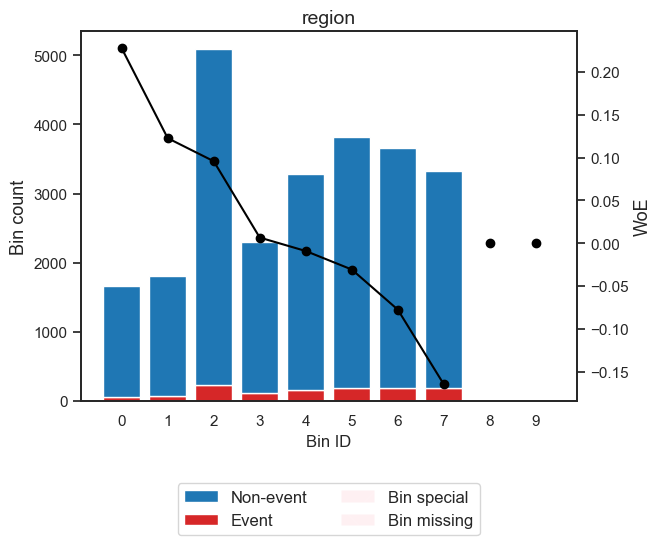

Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
0            [r_b]   1664   0.066712       1598     66    0.039663  0.227844   
1            [r_l]   1801   0.072205       1722     79    0.043865  0.122785   
2       [r_d, r_f]   5088   0.203985       4859    229    0.045008  0.095857   
3            [r_g]   2306   0.092451       2193    113    0.049003  0.006629   
4            [r_i]   3277   0.131380       3114    163    0.049741 -0.009096   
5            [r_c]   3821   0.153189       3627    194    0.050772 -0.030706   
6       [r_e, r_m]   3655   0.146534       3461    194    0.053078 -0.077555   
7       [r_h, r_a]   3331   0.133544       3139    192    0.057640 -0.164845   
8          Special      0   0.000000          0      0    0.000000       0.0   
9          Missing      0   0.000000          0      0    0.000000       0.0   
Totals              24943   1.000000      23713   1230    0.049312             

              IV            JS  
0       0.003128  3.902126e-04  
1       0.001030  1.287010e-04  
2       0.001795  2.243366e-04  
3       0.000004  5.062635e-07  
4       0.000011  1.364356e-06  
5       0.000146  1.830598e-05  
6       0.000913  1.140724e-04  
7       0.003911  4.882730e-04  
8       0.000000  0.000000e+00  
9       0.000000  0.000000e+00  
Totals  0.010939  1.365772e-03



Frecuencias para la variable repayment_type 



c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

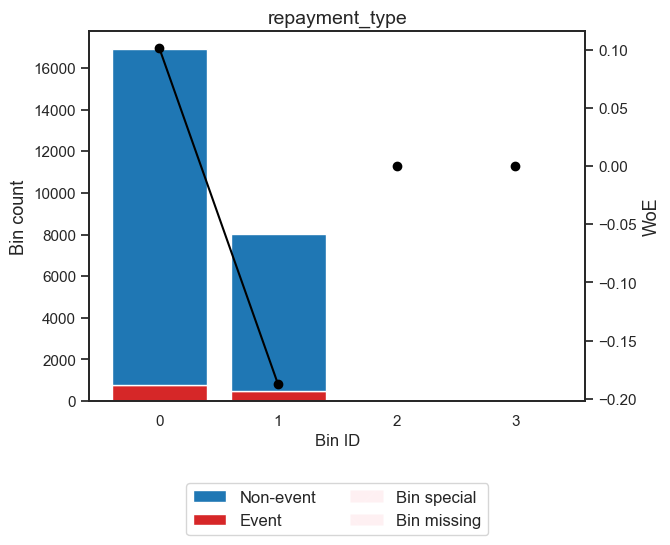

Bin  Count  Count (%)  Non-event  Event  Event rate      WoE  \
0       [Non-IO]  16911   0.677986      16154    757    0.044764  0.10155   
1           [IO]   8032   0.322014       7559    473    0.058889 -0.18761   
2        Special      0   0.000000          0      0    0.000000      0.0   
3        Missing      0   0.000000          0      0    0.000000      0.0   
Totals            24943   1.000000      23713   1230    0.049312            

              IV        JS  
0       0.006680  0.000835  
1       0.012341  0.001540  
2       0.000000  0.000000  
3       0.000000  0.000000  
Totals  0.019022  0.002375



Frecuencias para la variable worst_arrears_status 



c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

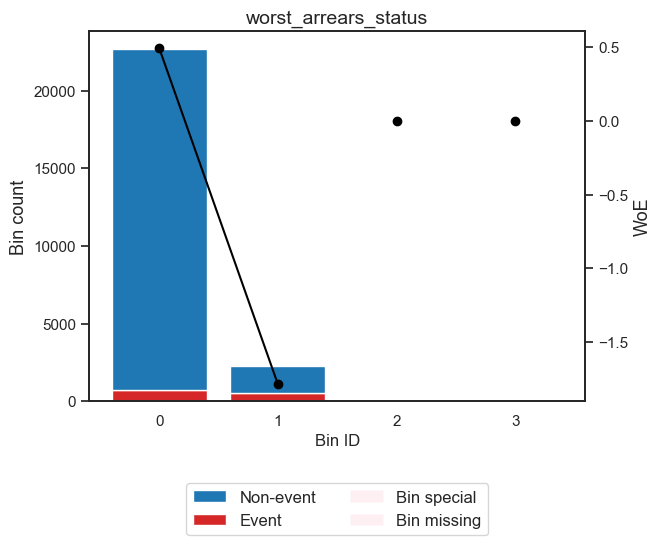

Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
0           [1]  22688   0.909594      21992    696    0.030677  0.494075   
1           [2]   2255   0.090406       1721    534    0.236807 -1.788744   
2       Special      0   0.000000          0      0    0.000000       0.0   
3       Missing      0   0.000000          0      0    0.000000       0.0   
Totals           24943   1.000000      23713   1230    0.049312             

              IV        JS  
0       0.178643  0.022106  
1       0.646756  0.071541  
2       0.000000  0.000000  
3       0.000000  0.000000  
Totals  0.825399  0.093647



Frecuencias para la variable emp_length 



c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

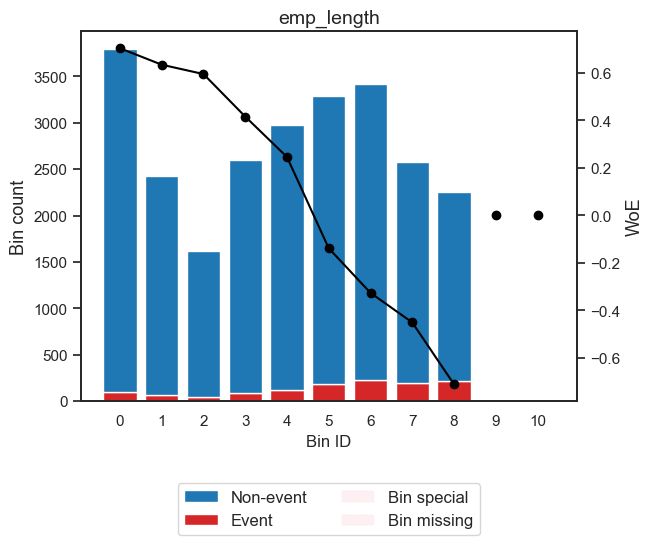

Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
0       [7, 11]   3794   0.152107       3699     95    0.025040  0.702932   
1           [8]   2427   0.097302       2362     65    0.026782  0.633867   
2          [10]   1617   0.064828       1572     45    0.027829  0.594432   
3       [9, 12]   2598   0.104157       2512     86    0.033102  0.415478   
4           [6]   2974   0.119232       2858    116    0.039005  0.245278   
5           [5]   3290   0.131901       3105    185    0.056231 -0.138596   
6           [4]   3415   0.136912       3186    229    0.067057  -0.32621   
7           [3]   2577   0.103316       2383    194    0.075281 -0.450752   
8        [2, 1]   2251   0.090246       2036    215    0.095513 -0.710905   
9       Special      0   0.000000          0      0    0.000000       0.0   
10      Missing      0   0.000000          0      0    0.000000       0.0   
Totals           24943   1.000000      23713   1230    0.049312             

              IV        JS  
0       0.055359  0.006781  
1       0.029641  0.003644  
2       0.017659  0.002175  
3       0.014963  0.001857  
4       0.006430  0.000802  
5       0.002698  0.000337  
6       0.016905  0.002104  
7       0.025797  0.003198  
8       0.063226  0.007741  
9       0.000000  0.000000  
10      0.000000  0.000000  
Totals  0.232678  0.028639

In [64]:
for val in var_cat:

    x = df3[val].values
    y = df3['default_event'].values
    optb = OptimalBinning(name = val, dtype = 'categorical', solver = 'cp')
    optb.fit(x, y)
    vcat_table = optb.binning_table.build()
    vcat_grap = optb.binning_table
    print(f"Frecuencias para la variable {val} \n")
    vcat_grap.plot(metric = 'woe')
    display(vcat_table)
    print("\n")

In [65]:
iv_vcat_table = []

for val in var_cat:

    x = df2[val].values
    y = df2['default_event'].values
    optb = OptimalBinning(name = val, dtype = 'categorical', solver = 'cp')
    optb.fit(x, y)
    iv_vcat_table = optb.binning_table.build()
    print(f"Frecuencias para la variable {val} \n")
    display(iv_vcat_table)
    print("\n")


Frecuencias para la variable num_ccj 



c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

Bin  Count  Count (%)  Non-event  \
0                          [8.0, 17.0, 0.0]  22838   0.896839      21826   
1       [2.0, 1.0, 3.0, 6.0, 4.0, 5.0, 7.0]   2627   0.103161       2303   
2                                   Special      0   0.000000          0   
3                                   Missing      0   0.000000          0   
Totals                                       25465   1.000000      24129   

        Event  Event rate       WoE        IV        JS  
0        1012    0.044312  0.177439  0.026096  0.003258  
1         324    0.123335  -0.93251  0.137144  0.016548  
2           0    0.000000       0.0  0.000000  0.000000  
3           0    0.000000       0.0  0.000000  0.000000  
Totals   1336    0.052464            0.163240  0.019805

Frecuencias para la variable pl_flag 



c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
0           [0]  13652   0.536108      12962    690    0.050542  0.039351   
1           [1]  11813   0.463892      11167    646    0.054686 -0.043816   
2       Special      0   0.000000          0      0    0.000000       0.0   
3       Missing      0   0.000000          0      0    0.000000       0.0   
Totals           25465   1.000000      24129   1336    0.052464             

              IV        JS  
0       0.000816  0.000102  
1       0.000908  0.000114  
2       0.000000  0.000000  
3       0.000000  0.000000  
Totals  0.001724  0.000215

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

Frecuencias para la variable region 



c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
0            [r_b]   1703   0.066876       1629     74    0.043453  0.197922   
1            [r_d]   4111   0.161437       3915    196    0.047677  0.100722   
2       [r_l, r_f]   2981   0.117063       2835    146    0.048977  0.072456   
3            [r_g]   2356   0.092519       2234    122    0.051783  0.013794   
4            [r_c]   3880   0.152366       3674    206    0.053093 -0.012574   
5            [r_i]   3327   0.130650       3149    178    0.053502 -0.020678   
6            [r_e]   2852   0.111997       2693    159    0.055750 -0.064227   
7            [r_h]   2205   0.086589       2081    124    0.056236 -0.073412   
8       [r_m, r_a]   2050   0.080503       1919    131    0.063902 -0.209372   
9          Special      0   0.000000          0      0    0.000000       0.0   
10         Missing      0   0.000000          0      0    0.000000       0.0   
Totals              25465   1.000000      24129   1336    0.052464             

              IV        JS  
0       0.002399  0.000299  
1       0.001566  0.000196  
2       0.000595  0.000074  
3       0.000017  0.000002  
4       0.000024  0.000003  
5       0.000056  0.000007  
6       0.000476  0.000059  
7       0.000482  0.000060  
8       0.003878  0.000484  
9       0.000000  0.000000  
10      0.000000  0.000000  
Totals  0.009494  0.001185

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

Frecuencias para la variable repayment_type 



Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
0       [Non-IO]  17219   0.676183      16395    824    0.047854  0.096827   
1           [IO]   8246   0.323817       7734    512    0.062091 -0.178678   
2        Special      0   0.000000          0      0    0.000000       0.0   
3        Missing      0   0.000000          0      0    0.000000       0.0   
Totals            25465   1.000000      24129   1336    0.052464             

              IV        JS  
0       0.006072  0.000759  
1       0.011204  0.001399  
2       0.000000  0.000000  
3       0.000000  0.000000  
Totals  0.017276  0.002157



Frecuencias para la variable worst_arrears_status 



c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
0           [1]  23079   0.906303      22340    739    0.032020  0.515102   
1           [2]   2386   0.093697       1789    597    0.250210 -1.796239   
2       Special      0   0.000000          0      0    0.000000       0.0   
3       Missing      0   0.000000          0      0    0.000000       0.0   
Totals           25465   1.000000      24129   1336    0.052464             

              IV        JS  
0       0.191985  0.023736  
1       0.669482  0.073985  
2       0.000000  0.000000  
3       0.000000  0.000000  
Totals  0.861467  0.097722

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut



Frecuencias para la variable emp_length 



c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
0       [11, 7]   3882   0.152445       3773    109    0.028078  0.650543   
1           [8]   2484   0.097546       2412     72    0.028986  0.617811   
2          [10]   1653   0.064913       1601     52    0.031458  0.533406   
3           [9]   2233   0.087689       2160     73    0.032691   0.49367   
4       [12, 6]   3417   0.134184       3280    137    0.040094  0.281883   
5           [5]   3363   0.132064       3162    201    0.059768 -0.138079   
6           [4]   3469   0.136226       3224    245    0.070626 -0.316614   
7           [3]   2649   0.104025       2440    209    0.078898 -0.436315   
8        [2, 1]   2315   0.090909       2077    238    0.102808 -0.727325   
9       Special      0   0.000000          0      0    0.000000       0.0   
10      Missing      0   0.000000          0      0    0.000000       0.0   
Totals           25465   1.000000      24129   1336    0.052464             

              IV        JS  
0       0.048648  0.005976  
1       0.028463  0.003502  
2       0.014631  0.001808  
3       0.017218  0.002131  
4       0.009412  0.001173  
5       0.002679  0.000335  
6       0.015757  0.001961  
7       0.024134  0.002993  
8       0.066961  0.008190  
9       0.000000  0.000000  
10      0.000000  0.000000  
Totals  0.227905  0.028069

#### Table of IV for categorial variables

In [66]:
iv_dict2 = {'Variable': var_cat, 'IV': iv_list_cat}
iv_df_cat = pd.DataFrame.from_dict(iv_dict2)
iv_df_cat = iv_df_cat.sort_values(by = 'IV', ascending=False)
iv_df_cat

Variable        IV
4  worst_arrears_status  0.825399
5            emp_length  0.232678
0               num_ccj  0.167978
3        repayment_type  0.019022
2                region  0.010939
1               pl_flag  0.002093

##### Union of IV of categorigal and continous variables

In [67]:
iv_tot = pd.concat([iv_df_con,iv_df_cat])

In [68]:
iv_tot['rankeo'] = iv_tot.apply(lambda x: 0 if x['IV'] == 0 or x['IV'] == -1
                                else 1 if x['IV'] > 0 and x['IV'] <= 0.02  # 1st condition
                                else  2 if x['IV'] > 0.02 and x['IV'] <= 0.1 # 2nd condition
                                else 3 if x['IV'] > 0.1 and x['IV'] <= 0.3 # 3rd condition
                                else 4 if x['IV'] > 0.3 and x['IV'] <= 0.5 # 4rd condition
                                else 5 if x['IV'] > 0.5 # 5rd condition 
                                else np.nan,axis = 1)

##### ratings of information value (iv)
#####  less than 0.02, not useful for prediction
##### between 0.02 to 0.1, weak predictive power
##### between 0.1 to 0.3, medium predictive power
##### between 0.3 to 0.5, strong predictive power
##### rather than 0.5, supisious predictive power

In [69]:
iv_tot.sort_values(by = 'IV',ascending = False)

Variable        IV  rankeo
16                        cc_util  2.280761       5
12                max_arrears_12m  1.062875       5
8                  arrears_months  0.990612       5
13             max_arrears_bal_6m  0.847914       5
4            worst_arrears_status  0.825399       5
2                    bureau_score  0.585326       5
15            avg_bureau_score_6m  0.579681       5
17                  annual_income  0.551184       5
18  months_since_recent_cc_delinq  0.530925       5
5                      emp_length  0.232678       3
10                  remaining_mat  0.209128       3
0                         num_ccj  0.167978       3
4                  time_since_ccj  0.157752       3
5                      ccj_amount  0.157311       3
11                      loan_term  0.142147       3
7                             ltv  0.035227       2
9                             mob  0.029772       2
1                    loan_balance  0.026467       2
14                     avg_bal_6m  0.025344       2
3                  repayment_type  0.019022       1
0             monthly_installment  0.018903       1
2                          region  0.010939       1
1                         pl_flag  0.002093       1
6       min_months_since_bankrupt  0.000000       0
3             time_since_bankrupt  0.000000       0

In [70]:
# var_best = iv_tot['Variable'].loc[iv_tot.loc[:, 'rankeo'] >= 3].tolist() 

In [71]:
iv_tot['rankeo2'] = iv_tot.apply(lambda x: 0 if x['IV'] == 0 or x['IV'] == -1
                                else 1 if x['IV'] > 0.1 and x['IV'] <= 0.6
                                else 0 if x['IV'] > 0.6   # 1st condition
                                else np.nan,axis = 1)

In [72]:
var_best = iv_tot['Variable'].loc[iv_tot.loc[:, 'rankeo2'] == 1].tolist() 

In [73]:
var_best

['bureau_score',
 'avg_bureau_score_6m',
 'annual_income',
 'months_since_recent_cc_delinq',
 'remaining_mat',
 'time_since_ccj',
 'ccj_amount',
 'loan_term',
 'emp_length',
 'num_ccj']

In [74]:
var_best.remove('avg_bureau_score_6m')

#### Partición de los datos

In [75]:
# creación del split
# from sklearn.model_selection import train_test_split

# X = df3[var_best] # var_best
# Y = df2[tgt + ['id']].copy()
# Y = df3[tgt]

#Xt, Xv, Yt, Yv = train_test_split(X, Y, test_size = .2)
# Xt, Xv, Yt, Yv = train_test_split(X, Y, test_size = 0.3, stratify = Y)

#Xt = Xt.merge( Yt , on = um, how = 'inner').reset_index(drop = True)

In [76]:
df3.head()

id  vintage_year  monthly_installment  loan_balance  bureau_score  \
0  6670001          2005               746.70     131304.44         541.0   
1  9131199          2006               887.40     115486.51         441.0   
2  4963167          2004              1008.50     128381.73         282.0   
3  3918582          2005               458.23      35482.96         461.0   
4  5949777          2006               431.20      77086.31         466.0   

   num_bankrupt_iva  time_since_bankrupt  num_ccj  time_since_ccj  ccj_amount  \
0               0.0                  0.0      0.0             0.0         0.0   
1               0.0                  0.0      0.0             0.0         0.0   
2               0.0                  0.0      1.0            36.0       459.0   
3               0.0                  0.0      0.0             0.0         0.0   
4               0.0                  0.0      0.0             0.0         0.0   

   ...  ol_mob  ol_remaining_mat  ol_loan_term  ol_max_arrears_12m  \
0  ...       0                 0             0                   0   
1  ...       0                 0             0                   0   
2  ...       0                 0             0                   0   
3  ...       0                 0             0                   0   
4  ...       0                 0             0                   0   

  ol_max_arrears_bal_6m  ol_avg_bal_6m  ol_avg_bureau_score_6m ol_cc_util  \
0                     0              0                       0          0   
1                     0              0                       0          0   
2                     0              0                       0          0   
3                     0              0                       0          0   
4                     0              0                       0          0   

  ol_annual_income ol_months_since_recent_cc_delinq  
0                0                                0  
1                0                                0  
2                0                                0  
3                0                                0  
4                0                                0  

[5 rows x 64 columns]

In [77]:
# creación del split
from sklearn.model_selection import StratifiedKFold
X = df3[var_best] # var_best
Y = df3[tgt]


skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
  
for train_index, validate_index in skf.split(X, Y):
    Xt = X.loc[train_index, :]
    Xv = X.loc[validate_index, :]
    Yt = Y.loc[train_index, :]
    Yv = Y.loc[validate_index, :]

In [78]:
# Xt.shape, Xv.shape, Yt.shape, Yv.shape
# ((17460, 9), (7483, 9), (17460, 1), (7483, 1))

In [79]:
Xt.shape, Xv.shape, Yt.shape, Yv.shape

((22449, 9), (2494, 9), (22449, 1), (2494, 1))

In [80]:
Xt.columns,Y.columns

(Index(['bureau_score', 'annual_income', 'months_since_recent_cc_delinq',
        'remaining_mat', 'time_since_ccj', 'ccj_amount', 'loan_term',
        'emp_length', 'num_ccj'],
       dtype='object'),
 Index(['default_event'], dtype='object'))

In [81]:
Xv.columns,Yv.columns

(Index(['bureau_score', 'annual_income', 'months_since_recent_cc_delinq',
        'remaining_mat', 'time_since_ccj', 'ccj_amount', 'loan_term',
        'emp_length', 'num_ccj'],
       dtype='object'),
 Index(['default_event'], dtype='object'))

#### Transformación WoE

#### Codificación WoE

In [82]:
binning_process = BinningProcess(var_best)

In [83]:
# replacing values of variables with the bins
Xt_bin = binning_process.fit_transform(Xt,Yt.default_event,metric = 'bins', show_digits = 4)
Xv_bin = binning_process.fit_transform(Xv,Yv.default_event,metric = 'bins', show_digits = 4)

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

In [84]:
# replacing values of variables with the woe
Xt_woe = binning_process.fit_transform(Xt,Yt.default_event,metric = 'woe')
Xv_woe = binning_process.fit_transform(Xv,Yv.default_event,metric = 'woe')

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ut

In [85]:
Xt_bin.set_index(Yt.index, inplace = True)
Xv_bin.set_index(Yv.index, inplace = True)

In [86]:
Xt_woe.set_index(Yt.index, inplace = True)
Xv_woe.set_index(Yv.index, inplace = True)

In [87]:
Xt_woe.head()

bureau_score  annual_income  months_since_recent_cc_delinq  remaining_mat  \
0      1.291256       0.644223                       0.292200       0.050693   
3      0.995906       0.232454                      -0.537717       0.311061   
4      0.995906       0.644223                      -0.353407       0.050693   
5      0.995906       0.574949                       1.977709       0.210766   
6      0.995906       0.644223                      -0.471388       0.081467   

   time_since_ccj  ccj_amount  loan_term  emp_length   num_ccj  
0        0.166446    0.138091   0.066105   -0.455716  0.171623  
3        0.166446    0.138091   0.259052    0.620722  0.171623  
4        0.166446    0.138091   0.066105    0.523400  0.171623  
5        0.166446    0.138091   0.137630    0.523400  0.171623  
6        0.166446    0.138091   0.137630   -0.150984  0.171623

In [88]:
Xt_woe.head()

bureau_score  annual_income  months_since_recent_cc_delinq  remaining_mat  \
0      1.291256       0.644223                       0.292200       0.050693   
3      0.995906       0.232454                      -0.537717       0.311061   
4      0.995906       0.644223                      -0.353407       0.050693   
5      0.995906       0.574949                       1.977709       0.210766   
6      0.995906       0.644223                      -0.471388       0.081467   

   time_since_ccj  ccj_amount  loan_term  emp_length   num_ccj  
0        0.166446    0.138091   0.066105   -0.455716  0.171623  
3        0.166446    0.138091   0.259052    0.620722  0.171623  
4        0.166446    0.138091   0.066105    0.523400  0.171623  
5        0.166446    0.138091   0.137630    0.523400  0.171623  
6        0.166446    0.138091   0.137630   -0.150984  0.171623

In [89]:
var_best

['bureau_score',
 'annual_income',
 'months_since_recent_cc_delinq',
 'remaining_mat',
 'time_since_ccj',
 'ccj_amount',
 'loan_term',
 'emp_length',
 'num_ccj']

#### Use Feacture Selection

In [90]:
from sklearn.feature_selection import SequentialFeatureSelector

In [91]:
from sklearn import linear_model

In [92]:
# Perform stepwise regression
sfs = SequentialFeatureSelector(linear_model.LogisticRegression(),
                                n_features_to_select = 4,
                                direction = 'forward',
                                scoring = 'accuracy',
                                cv = None)

In [93]:
Yt_tgt = Yt[tgt]
Yv_tgt = Yv[tgt]

In [94]:
selected_features = sfs.fit(Xt_woe, Yt.values.ravel())

In [95]:
features = selected_features.get_support()

In [96]:
# solo se puede hacer si la con la tabla que tengas las mismas columnas 
features = Xt_woe[var_best].columns[features].tolist()

In [97]:
features

['bureau_score',
 'annual_income',
 'months_since_recent_cc_delinq',
 'ccj_amount']

#### Modelo

In [98]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [99]:
mlog_reg = LogisticRegression()

In [100]:
mlog_reg.fit( Xt_woe[features] , Yt)

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

#### Recordar que la tabla de WOES sigue siendo el vector de características para realizar el modelo

In [101]:
pd.DataFrame(mlog_reg.predict_proba(Xv_woe[features]))

0         1
0     0.982610  0.017390
1     0.478516  0.521484
2     0.985175  0.014825
3     0.965926  0.034074
4     0.988212  0.011788
...        ...       ...
2489  0.883725  0.116275
2490  0.998301  0.001699
2491  0.962351  0.037649
2492  0.944450  0.055550
2493  0.998498  0.001502

[2494 rows x 2 columns]

#### Evaluación

In [102]:
from scikitplot.metrics import plot_roc
from sklearn.metrics import classification_report

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

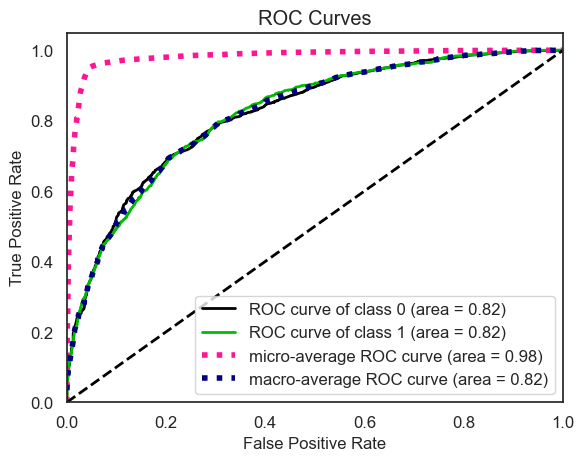

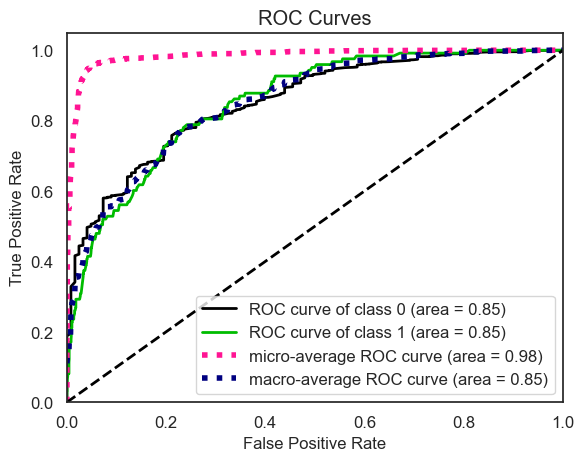

In [103]:
plot_roc( y_true = Yt , y_probas = mlog_reg.predict_proba( Xt_woe[features] ) )
plot_roc( y_true = Yv , y_probas = mlog_reg.predict_proba( Xv_woe[features] ) )

In [104]:
# es el mean accuracy
mlog_reg.score(Xt_woe[features],Yt)

0.9523364069669028

In [105]:
# Realizamos la evaluación de nuestro modelo:
print('Entrenamiento: \n')
predictions_t = mlog_reg.predict(Xt_woe[features])
print(classification_report(Yt, predictions_t))
print('Matriz: \n')
print(confusion_matrix(Yt, predictions_t))
print('Validación: \n')
predictions_v = mlog_reg.predict(Xv_woe[features])
print(classification_report(Yv, predictions_v))
print('Matriz: \n')
print(confusion_matrix(Yv, predictions_v))

Entrenamiento: 

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     21342
           1       0.66      0.07      0.12      1107

    accuracy                           0.95     22449
   macro avg       0.81      0.53      0.55     22449
weighted avg       0.94      0.95      0.93     22449

Matriz: 

[[21303    39]
 [ 1031    76]]
Validación: 

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2371
           1       0.69      0.07      0.13       123

    accuracy                           0.95      2494
   macro avg       0.82      0.54      0.55      2494
weighted avg       0.94      0.95      0.93      2494

Matriz: 

[[2367    4]
 [ 114    9]]


In [106]:
Xt2 = Xt_woe[features]
Xv2 = Xv_woe[features]

In [107]:
coeficients = pd.DataFrame(zip(Xv[features].columns, np.transpose(mlog_reg.coef_)), columns = ['features', 'coef']) 

In [108]:
coeficients['coef'] = coeficients['coef'].astype(float)
coeficients['features'] = coeficients['features'].astype(str)

In [109]:
coeficients.head()

features      coef
0                   bureau_score -0.948615
1                  annual_income -1.001324
2  months_since_recent_cc_delinq -0.983515
3                     ccj_amount -0.377966

In [110]:
features

['bureau_score',
 'annual_income',
 'months_since_recent_cc_delinq',
 'ccj_amount']

In [111]:
# valor de los coeficientes
v_bureau_score = coeficients.loc[coeficients.features == 'bureau_score', 'coef']
v_annual_income = coeficients.loc[coeficients.features == 'annual_income', 'coef']
v_months_since_recent_cc_delinq = coeficients.loc[coeficients.features == 'months_since_recent_cc_delinq', 'coef']
v_ccj_amount = coeficients.loc[coeficients.features == 'ccj_amount', 'coef']

In [112]:
Xt2['cf_bureau_score'] = pd.Series([v_bureau_score.values for x in range(max(Xt2.index))])
Xt2['cf_annual_income'] = pd.Series([v_annual_income.values for x in range(max(Xt2.index))])
Xt2['cf_months_since_recent_cc_delinq'] = pd.Series([v_months_since_recent_cc_delinq.values for x in range(max(Xt2.index))])
Xt2['cf_ccj_amount'] = pd.Series([v_ccj_amount.values for x in range(max(Xt2.index))]) 

C:\Users\Daniel\AppData\Local\Temp\ipykernel_10408\2582470984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xt2['cf_bureau_score'] = pd.Series([v_bureau_score.values for x in range(max(Xt2.index))])
C:\Users\Daniel\AppData\Local\Temp\ipykernel_10408\2582470984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xt2['cf_annual_income'] = pd.Series([v_annual_income.values for x in range(max(Xt2.index))])
C:\Users\Daniel\AppData\Local\Temp\ipykernel_10408\2582470984.py:3: SettingWithCopyWarning: 
A value

In [113]:
Xt2['cf_bureau_score'] = Xt2['cf_bureau_score'].astype(float)
Xt2['cf_annual_income'] = Xt2['cf_annual_income'].astype(float)
Xt2['cf_months_since_recent_cc_delinq'] = Xt2['cf_months_since_recent_cc_delinq'].astype(float)
Xt2['cf_ccj_amount'] = Xt2['cf_ccj_amount'].astype(float)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_10408\3192689667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xt2['cf_bureau_score'] = Xt2['cf_bureau_score'].astype(float)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_10408\3192689667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xt2['cf_annual_income'] = Xt2['cf_annual_income'].astype(float)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_10408\3192689667.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [114]:
Xt2.head(10)

bureau_score  annual_income  months_since_recent_cc_delinq  ccj_amount  \
0       1.291256       0.644223                       0.292200    0.138091   
3       0.995906       0.232454                      -0.537717    0.138091   
4       0.995906       0.644223                      -0.353407    0.138091   
5       0.995906       0.574949                       1.977709    0.138091   
6       0.995906       0.644223                      -0.471388    0.138091   
7      -0.398109      -1.721575                       1.977709    0.138091   
8      -0.065837       0.232454                      -0.215606    0.138091   
9      -0.065837       0.644223                       1.977709    0.138091   
10      0.995906       0.644223                      -0.372433    0.138091   
12      0.995906       0.232454                      -0.400699    0.138091   

    cf_bureau_score  cf_annual_income  cf_months_since_recent_cc_delinq  \
0         -0.948615         -1.001324                         -0.983515   
3         -0.948615         -1.001324                         -0.983515   
4         -0.948615         -1.001324                         -0.983515   
5         -0.948615         -1.001324                         -0.983515   
6         -0.948615         -1.001324                         -0.983515   
7         -0.948615         -1.001324                         -0.983515   
8         -0.948615         -1.001324                         -0.983515   
9         -0.948615         -1.001324                         -0.983515   
10        -0.948615         -1.001324                         -0.983515   
12        -0.948615         -1.001324                         -0.983515   

    cf_ccj_amount  
0       -0.377966  
3       -0.377966  
4       -0.377966  
5       -0.377966  
6       -0.377966  
7       -0.377966  
8       -0.377966  
9       -0.377966  
10      -0.377966  
12      -0.377966

In [115]:
Xt2.columns

Index(['bureau_score', 'annual_income', 'months_since_recent_cc_delinq',
       'ccj_amount', 'cf_bureau_score', 'cf_annual_income',
       'cf_months_since_recent_cc_delinq', 'cf_ccj_amount'],
      dtype='object')

#### Función para calculo de probabilidad

In [116]:
#def logit2prob(mlog_reg,x):
#  log_odds = mlog_reg.coef_ * x + mlog_reg.intercept_
#  odds = np.exp(log_odds)
#  probability = odds / (1 + odds)
#  return(probability)

In [117]:
Xt2['log_odds'] = Xt2['bureau_score'] * Xt2['cf_bureau_score'] + \
    Xt2['annual_income'] * Xt2['cf_annual_income'] +\
        Xt2['months_since_recent_cc_delinq'] * Xt2['cf_months_since_recent_cc_delinq'] +\
            Xt2['ccj_amount'] * Xt2['cf_ccj_amount'] +  mlog_reg.intercept_

In [118]:
Xt2['odds'] = np.exp(Xt2['log_odds'])

In [119]:
# calculo de probabilidad , es igual al predict proba para el evento 1
Xt2['probability'] = Xt2['odds'] / (1 + Xt2['odds'])

#### Elegimos la columna de 1 porque estamos evaluando el evento de incumplimiento

In [120]:
# elegimos el 1 porque estamos evaluando el evento de incumplimiento
Xt2['PD'] = mlog_reg.predict_proba(Xt2[features])[:,1]

#### Función para el score

In [121]:
# New scale with anchor set at 660 points and log-odds doubling each 40 points and 72:1 odds ratio.
def scaled_score(logit,odds,offset = 500,pdo = 20):
    b = pdo/np.log(2)
    a = offset - b* np.log(odds)
    
    return round(a + b*(np.log((1 - logit)/logit)))

In [122]:
Xt2['score'] = scaled_score(Xt2['PD'],odds = 72,offset = 660,pdo = 40)

In [123]:
Xt2['score2'] = scaled_score(Xt2['PD'],odds = 72,offset = 660,pdo = 40)

In [124]:
Xt2.head()

bureau_score  annual_income  months_since_recent_cc_delinq  ccj_amount  \
0      1.291256       0.644223                       0.292200    0.138091   
3      0.995906       0.232454                      -0.537717    0.138091   
4      0.995906       0.644223                      -0.353407    0.138091   
5      0.995906       0.574949                       1.977709    0.138091   
6      0.995906       0.644223                      -0.471388    0.138091   

   cf_bureau_score  cf_annual_income  cf_months_since_recent_cc_delinq  \
0        -0.948615         -1.001324                         -0.983515   
3        -0.948615         -1.001324                         -0.983515   
4        -0.948615         -1.001324                         -0.983515   
5        -0.948615         -1.001324                         -0.983515   
6        -0.948615         -1.001324                         -0.983515   

   cf_ccj_amount  log_odds      odds  probability        PD  score  score2  
0      -0.377966 -5.166095  0.005707     0.005674  0.005674  711.0   711.0  
3      -0.377966 -3.657370  0.025800     0.025151  0.025151  624.0   624.0  
4      -0.377966 -4.250957  0.014251     0.014050  0.014050  659.0   659.0  
5      -0.377966 -6.474280  0.001543     0.001540  0.001540  787.0   787.0  
6      -0.377966 -4.134920  0.016004     0.015752  0.015752  652.0   652.0

<Axes: >

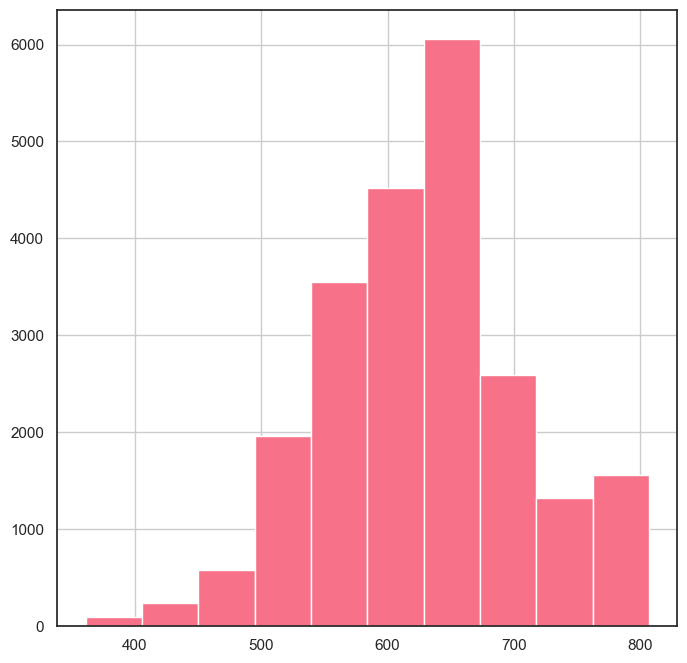

In [125]:
Xt2['score'].hist(figsize = (8,8))

In [126]:
Xv2.columns

Index(['bureau_score', 'annual_income', 'months_since_recent_cc_delinq',
       'ccj_amount'],
      dtype='object')

In [127]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

In [128]:
rest_v = mlog_reg.predict(Xv2)

In [129]:
rest_v

array([0, 1, 0, ..., 0, 0, 0])

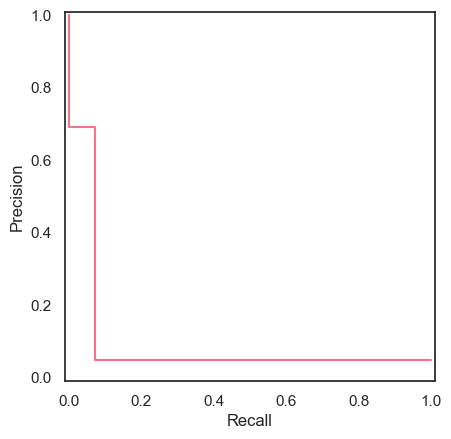

In [130]:
precision, recall, threshold = precision_recall_curve(Yv_tgt, rest_v)
prd = PrecisionRecallDisplay(precision, recall)
prd.plot()
#Yv[tgt]

In [131]:
Xv2['PD'] = mlog_reg.predict_proba(Xv2[features])[:,1]

C:\Users\Daniel\AppData\Local\Temp\ipykernel_10408\272656267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xv2['PD'] = mlog_reg.predict_proba(Xv2[features])[:,1]


In [132]:
Xv2['score'] = scaled_score(Xv2['PD'],odds = 72,offset = 660,pdo = 40)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_10408\2445453220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xv2['score'] = scaled_score(Xv2['PD'],odds = 72,offset = 660,pdo = 40)


In [133]:
Xv2.head()

bureau_score  annual_income  months_since_recent_cc_delinq  ccj_amount  \
1        0.806186       0.653723                      -0.436236    0.231458   
2       -0.300178      -1.446900                      -0.812302   -1.349445   
11       0.762787       0.653723                      -0.229493    0.231458   
101     -0.237587       0.750616                      -0.229493    0.231458   
110      0.290630       0.653723                       0.462117    0.231458   

           PD  score  
1    0.017390  646.0  
2    0.521484  408.0  
11   0.014825  655.0  
101  0.034074  606.0  
110  0.011788  669.0

In [134]:
import seaborn as sns

<Axes: xlabel='score', ylabel='Density'>

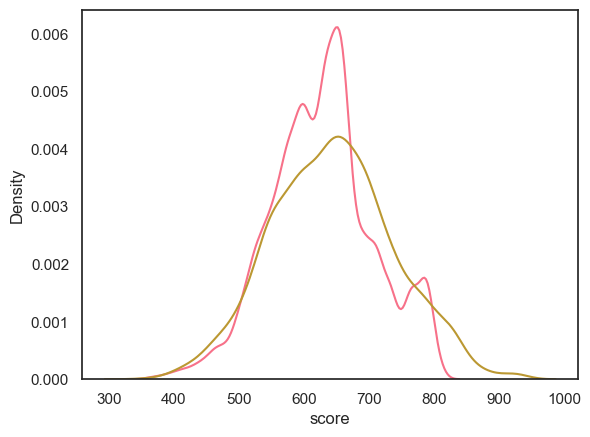

In [135]:
sns.kdeplot(Xt2['score'])
sns.kdeplot(Xv2['score'])

In [136]:
Xt2.head()

bureau_score  annual_income  months_since_recent_cc_delinq  ccj_amount  \
0      1.291256       0.644223                       0.292200    0.138091   
3      0.995906       0.232454                      -0.537717    0.138091   
4      0.995906       0.644223                      -0.353407    0.138091   
5      0.995906       0.574949                       1.977709    0.138091   
6      0.995906       0.644223                      -0.471388    0.138091   

   cf_bureau_score  cf_annual_income  cf_months_since_recent_cc_delinq  \
0        -0.948615         -1.001324                         -0.983515   
3        -0.948615         -1.001324                         -0.983515   
4        -0.948615         -1.001324                         -0.983515   
5        -0.948615         -1.001324                         -0.983515   
6        -0.948615         -1.001324                         -0.983515   

   cf_ccj_amount  log_odds      odds  probability        PD  score  score2  
0      -0.377966 -5.166095  0.005707     0.005674  0.005674  711.0   711.0  
3      -0.377966 -3.657370  0.025800     0.025151  0.025151  624.0   624.0  
4      -0.377966 -4.250957  0.014251     0.014050  0.014050  659.0   659.0  
5      -0.377966 -6.474280  0.001543     0.001540  0.001540  787.0   787.0  
6      -0.377966 -4.134920  0.016004     0.015752  0.015752  652.0   652.0

#### PD Calibration

##### comparas la PD con los WOE's vs la PD con el score generado

In [137]:
mlog_reg2 = LogisticRegression()

In [138]:
# PD con el score
pd_model = mlog_reg2.fit(pd.DataFrame(Xt2['score']), Yt)

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [139]:
# PD con el score X train
Xt2['p_default'] = pd_model.predict_proba(pd.DataFrame(Xt2['score']))[:,1]

In [140]:
Xv2['p_default'] = pd_model.predict_proba(pd.DataFrame(Xv2['score']))[:,1]

C:\Users\Daniel\AppData\Local\Temp\ipykernel_10408\278308665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xv2['p_default'] = pd_model.predict_proba(pd.DataFrame(Xv2['score']))[:,1]


In [141]:
Xt2.head()

bureau_score  annual_income  months_since_recent_cc_delinq  ccj_amount  \
0      1.291256       0.644223                       0.292200    0.138091   
3      0.995906       0.232454                      -0.537717    0.138091   
4      0.995906       0.644223                      -0.353407    0.138091   
5      0.995906       0.574949                       1.977709    0.138091   
6      0.995906       0.644223                      -0.471388    0.138091   

   cf_bureau_score  cf_annual_income  cf_months_since_recent_cc_delinq  \
0        -0.948615         -1.001324                         -0.983515   
3        -0.948615         -1.001324                         -0.983515   
4        -0.948615         -1.001324                         -0.983515   
5        -0.948615         -1.001324                         -0.983515   
6        -0.948615         -1.001324                         -0.983515   

   cf_ccj_amount  log_odds      odds  probability        PD  score  score2  \
0      -0.377966 -5.166095  0.005707     0.005674  0.005674  711.0   711.0   
3      -0.377966 -3.657370  0.025800     0.025151  0.025151  624.0   624.0   
4      -0.377966 -4.250957  0.014251     0.014050  0.014050  659.0   659.0   
5      -0.377966 -6.474280  0.001543     0.001540  0.001540  787.0   787.0   
6      -0.377966 -4.134920  0.016004     0.015752  0.015752  652.0   652.0   

   p_default  
0   0.005690  
3   0.025237  
4   0.013911  
5   0.001529  
6   0.015679

In [142]:
Xv2.head()

bureau_score  annual_income  months_since_recent_cc_delinq  ccj_amount  \
1        0.806186       0.653723                      -0.436236    0.231458   
2       -0.300178      -1.446900                      -0.812302   -1.349445   
11       0.762787       0.653723                      -0.229493    0.231458   
101     -0.237587       0.750616                      -0.229493    0.231458   
110      0.290630       0.653723                       0.462117    0.231458   

           PD  score  p_default  
1    0.017390  646.0   0.017369  
2    0.521484  408.0   0.523369  
11   0.014825  655.0   0.014895  
101  0.034074  606.0   0.034171  
110  0.011788  669.0   0.011721

In [143]:
variables = Xv2.columns
variables

Index(['bureau_score', 'annual_income', 'months_since_recent_cc_delinq',
       'ccj_amount', 'PD', 'score', 'p_default'],
      dtype='object')

In [144]:
Xt3 = Xt2[variables]

In [145]:
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import auc

In [146]:
fper, tper, thresholds = roc(Yt,Xt2['PD'])

# error en el calculo del campo de probability, row 24942

In [147]:
AUC = auc(fper,tper)
AUC

0.8207210366858925

In [148]:
gini = 2 *AUC -1
gini

0.6414420733717849

#### ROC

In [149]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

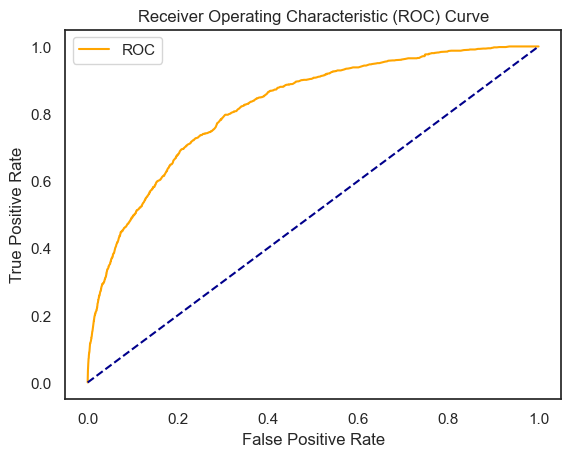

In [150]:
plot_roc_cur(fper,tper)

#### Compativo de PD actual vs Fitted (score band)

In [151]:
score_cuts=[0,517,576,605,632,667,716,746,773,1000]

In [152]:
# Merging train and test set
df_train = pd.merge(Xt3,Yt,on = Yt.index)
df_test = pd.merge(Xv2,Yv,on = Yv.index)
df_whole = pd.concat([df_train,df_test])

In [153]:
df_train.shape, df_train.columns

((22449, 9),
 Index(['key_0', 'bureau_score', 'annual_income',
        'months_since_recent_cc_delinq', 'ccj_amount', 'PD', 'score',
        'p_default', 'default_event'],
       dtype='object'))

In [154]:
df_test.shape, df_test.columns

((2494, 9),
 Index(['key_0', 'bureau_score', 'annual_income',
        'months_since_recent_cc_delinq', 'ccj_amount', 'PD', 'score',
        'p_default', 'default_event'],
       dtype='object'))

In [155]:
df_whole.head()

key_0  bureau_score  annual_income  months_since_recent_cc_delinq  \
0      0      1.291256       0.644223                       0.292200   
1      3      0.995906       0.232454                      -0.537717   
2      4      0.995906       0.644223                      -0.353407   
3      5      0.995906       0.574949                       1.977709   
4      6      0.995906       0.644223                      -0.471388   

   ccj_amount        PD  score  p_default  default_event  
0    0.138091  0.005674  711.0   0.005690              0  
1    0.138091  0.025151  624.0   0.025237              0  
2    0.138091  0.014050  659.0   0.013911              0  
3    0.138091  0.001540  787.0   0.001529              0  
4    0.138091  0.015752  652.0   0.015679              0

In [156]:
df_whole['score_band'] = pd.cut(x = df_whole['score'], bins = score_cuts)

In [157]:
df_whole.head()

key_0  bureau_score  annual_income  months_since_recent_cc_delinq  \
0      0      1.291256       0.644223                       0.292200   
1      3      0.995906       0.232454                      -0.537717   
2      4      0.995906       0.644223                      -0.353407   
3      5      0.995906       0.574949                       1.977709   
4      6      0.995906       0.644223                      -0.471388   

   ccj_amount        PD  score  p_default  default_event   score_band  
0    0.138091  0.005674  711.0   0.005690              0   (667, 716]  
1    0.138091  0.025151  624.0   0.025237              0   (605, 632]  
2    0.138091  0.014050  659.0   0.013911              0   (632, 667]  
3    0.138091  0.001540  787.0   0.001529              0  (773, 1000]  
4    0.138091  0.015752  652.0   0.015679              0   (632, 667]

##### Solo usa en la sig tabla la PD calclada con el score

In [158]:
data_pd = df_whole.groupby('score_band')[['default_event', 'p_default']].mean()

In [159]:
# resetting the index
data_pd.reset_index(inplace = True)

In [160]:
data_pd

score_band  default_event  p_default
0     (0, 517]       0.261227   0.262591
1   (517, 576]       0.090889   0.088315
2   (576, 605]       0.044352   0.043735
3   (605, 632]       0.027227   0.027229
4   (632, 667]       0.014148   0.016404
5   (667, 716]       0.008954   0.008103
6   (716, 746]       0.005709   0.003908
7   (746, 773]       0.002991   0.002356
8  (773, 1000]       0.000000   0.001405

In [161]:
print(data_pd.dtypes)

score_band       category
default_event     float64
p_default         float64
dtype: object


In [162]:
data_pd['score_band'] = data_pd['score_band'].astype(str)


#### Plot Actual vs fitted PD

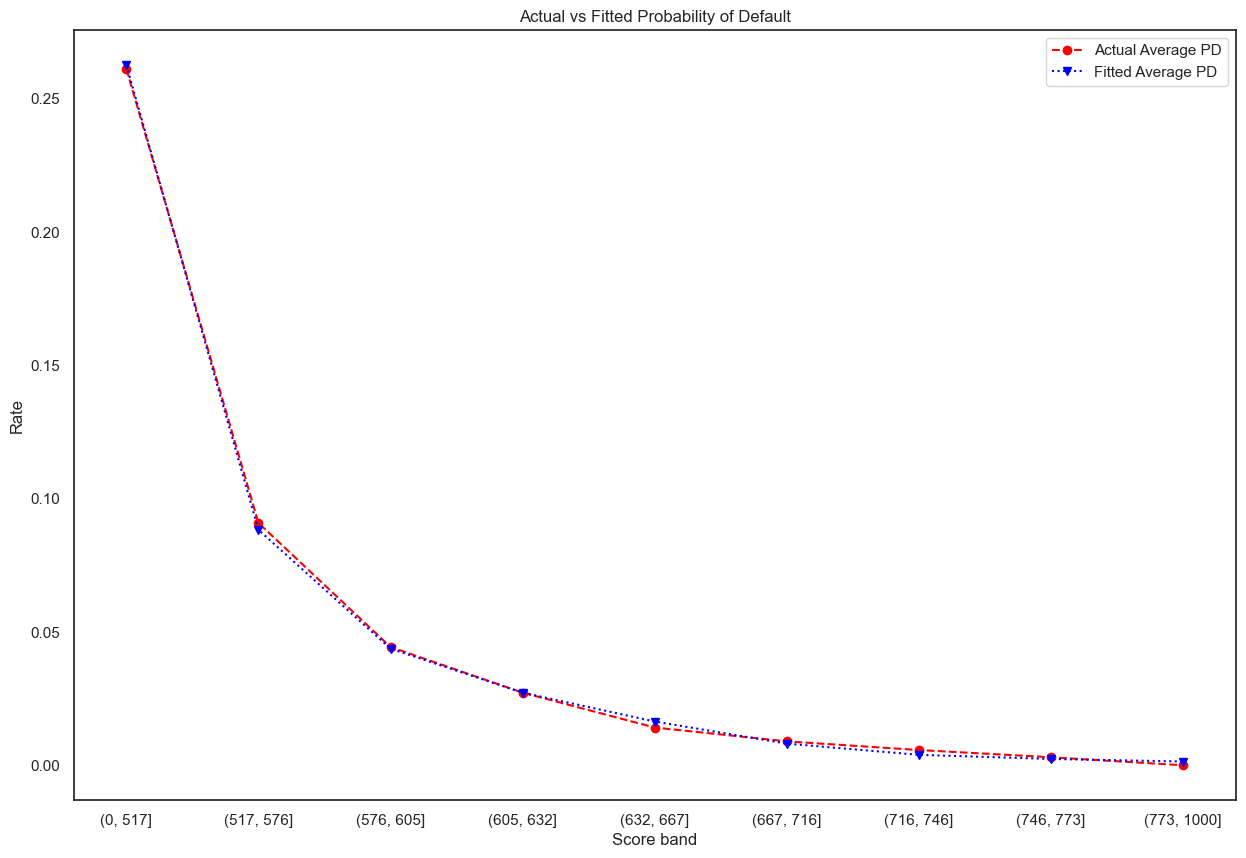

In [163]:
plt.figure(figsize = (15,10))
plt.plot(data_pd['score_band'], data_pd['default_event'],label = 'Actual Average PD', color = 'r',marker = 'o',linestyle = '--')
plt.plot(data_pd['score_band'], data_pd['p_default'],label = "Fitted Average PD",color = 'b',marker = 'v',linestyle = ':')
plt.title("Actual vs Fitted Probability of Default")
plt.xlabel("Score band")
plt.ylabel("Rate")
plt.legend()
plt.show()

### RMSE

In [164]:
from sklearn.metrics import mean_squared_error as MSE
MSE(data_pd['default_event'],data_pd['p_default'])**0.5

0.0015017456919240463

In [ ]:
# 0.0015017456919240463

In [ ]:
# A model with high precision and recall will return very few results, but most of the predictions are correct.
# However, a model with low precision and high recall return many results, but most of the predictions will be incorrect. 
# An Ideal model will have high precision and high recall and will return many results with all correctly predicted, 
# while a baseline model will have very low precision.

In [ ]:
# entender esta grafica
# precision, recall, threshold = precision_recall_curve(Yv_tgt, rest_v)
# prd = PrecisionRecallDisplay(precision, recall)
# prd.plot()

# investigar bien que hace el binningprocess.fit_transform vs optimalbinnig.fit_transform
# Xt2_woe = OptimalBinning.fit_transform(Xt, Yt.default_event, metric = 'woe')
# porque hubiera pensado que iba a dar los mismos woes de las tablas anteriores
# investigar funciones aparte para el calculo de iv y woe

# leer este papaer PD CON REGRESION LOGISTICA
# https://medium.com/@polanitzer/logistic-regression-in-python-predict-the-probability-of-default-of-an-individual-8a0091da3775
# seguir el ejemplo del PD-Modelling_oneypd.ipynb at master · rishuraj27_PD-Modelling

# técnicas para balancear data set (fue bueno, StratifiedKfold hay que estudiarlo)

# hacer ejercicio sin variables sobrepredictivas (no funciono)
# repasar metricas del class report (el f1 score debería ser la metrica más relevante)

